In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set()

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
pd.set_option('display.max_colwidth',2000)
pd.reset_option('display.max_colwidth')

# PINIR Website: Data Analysis

In [7]:
# Organism : Scientific Name (Common Name)(Synonym)
# Example  : Erythranthe guttata (Yellow monkey flower) (Mimulus guttatus)

# Species  : Scientific Name
# Example  : Erythranthe guttata
# Genus    : Erythranthe
    
# Plant    : Scientific Name (Common Name)(Synonym)
# Example  : Erythranthe guttata (Yellow monkey flower) (Mimulus guttatus)


In [111]:
## (1) PIs Data Analysis
### (1.1) Species Distribution (PIs distribution across species)
### (1.2) Genus Distribution (PIs distribution across genus)
### (1.3) Cysteine content Distribution
### (1.4) Amino Acid Composition

## (2) Domains (IRDs) Data Analysis
### (2.1) Domain Distribution
### (2.2) Species wise distribution of Domains
### (2.3) Genus wise distribution of Domains
### (2.4) Domain Architectures
### (2.5) Disulphide Bonds Ditsribution
### (2.6) Cysteine content Distribution
### (2.7) Amino Acid (AA) Composition

## (3) Reactive Loops (RCL) Data Analysis
### (3.1) RCL Distribution
### (3.2) Specie wise distribution of RCL
### (3.3) Specie wise distribution of RCL in Top 10 Species.
### (3.4) Genus wise distribution of RCL
### (3.5) RCL distribution across Capsicum, Nicotiana, and Solanum
### (3.6) Domains distribution across Top10 RCL
### (3.7) Distribution of AA at P1, P2, and P1` position in PIN-II PI database.

## (4) Linker Data Analysis
### (4.1) Linker Distribution
### (4.2) Type-I Linker Distribution
### (4.3) Type- II Linker Distribution
### (4.4) Specie wise distribution of Linkers
### (4.5) Specie wise distribution of Linker in Top 10 Species.
### (4.6) Genus wise distribution of Linker
### (4.7) Domains distribution across Top10 Linker

## (5) Target Protease Data Analysis
### (5.1) Target Specificity (Target Protease Distribution)
### (5.2) Specie wise distribution of Target Protease
### (5.3) Specie wise distribution of Target Protease in Top 10 Species.
### (5.4) Genus wise distribution of Target Protease
### (5.5) Target Protease distribution across Capsicum, Nicotiana, and Solanum
### (5.6) Domains distribution across Target Protease

## (1) PIs Data Analysis

In [7]:
# Here we perform different analysis on Pin-II PI sequences

### (1.1) Species Distribution (PIs distribution across species)

In [ ]:
# Species Distribution shows us the distribution of Pin-II PIs in various species.
# For this from tables PI_General_Features and Taxonomy, the relation between PI's and their Species can be retrived. From
# this relation we can calculate how many PI's belong to one particular specie

In [112]:
pi_features=pd.read_csv('19_Sequence_Organism_IsoelectricPoint_Amino_Composition.csv')

In [9]:
pi_features.columns

Index(['UniprotID', 'Protein names', 'GeneNames', 'OrganismID', 'Organism',
       'Genus', 'Species', 'Solanaceae', 'Function [CC]', 'Sequence', 'Length',
       'Mass', 'average_pI', 'pH_5.5_charge', 'pH_7.4_charge', 'pH_8.0_charge',
       'A', 'A_per', 'C', 'C_per', 'D', 'D_per', 'E', 'E_per', 'F', 'F_per',
       'G', 'G_per', 'H', 'H_per', 'I', 'I_per', 'K', 'K_per', 'L', 'L_per',
       'M', 'M_per', 'N', 'N_per', 'O', 'O_per', 'P', 'P_per', 'Q', 'Q_per',
       'R', 'R_per', 'S', 'S_per', 'T', 'T_per', 'U', 'U_per', 'V', 'V_per',
       'W', 'W_per', 'X', 'X_per', 'Y', 'Y_per', 'Z', 'Z_per'],
      dtype='object')

In [114]:
pi_taxonID=pi_features[['UniprotID','OrganismID']]

In [115]:
pi_taxonID.count()

UniprotID     415
OrganismID    415
dtype: int64

In [116]:
taxonomy=pd.read_csv('5(b)_Taxonomy_Used.csv')

In [7]:
taxonomy.columns

Index(['Taxon', 'Mnemonic', 'Scientific name', 'Common name', 'Synonym',
       'Other Names', 'Reviewed', 'Rank', 'Lineage', 'Parent', 'Virus hosts',
       'Organism', 'Genus', 'Species', 'Solanaceae'],
      dtype='object')

In [117]:
taxonomy=taxonomy[['Taxon','Scientific name', 'Common name','Organism', 'Genus','Solanaceae']]

In [119]:
taxonomy.head()

Taxon          Scientific name         Common name  \
0    52838          Musa balbisiana              Banana   
1    38414       Eragrostis curvula  weeping love grass   
2    15368  Brachypodium distachyon  Purple false brome   
3  1088818    Apostasia shenzhenica                 NaN   
4   906689     Dendrobium catenatum                 NaN   

                                            Organism         Genus  Solanaceae  
0                           Musa balbisiana (Banana)          Musa           0  
1            Eragrostis curvula (weeping love grass)    Eragrostis           0  
2  Brachypodium distachyon (Purple false brome) (...  Brachypodium           0  
3                              Apostasia shenzhenica     Apostasia           0  
4                               Dendrobium catenatum    Dendrobium           0

In [18]:
pi_taxonomy=pd.merge(pi_taxonID,taaxonomy,left_on='OrganismID',right_on='Taxon',how='left')

In [21]:
pi_taxonomy.UniprotID.count()

415

In [22]:
pi_taxonomy.columns

Index(['UniprotID', 'OrganismID', 'Taxon', 'Scientific name', 'Common name',
       'Organism', 'Genus', 'Solanaceae'],
      dtype='object')

In [23]:
pi_taxonomy.head(2)

UniprotID  OrganismID  Taxon       Scientific name Common name  \
0    P05119        4081   4081  Solanum lycopersicum      Tomato   
1    P84813        4113   4113     Solanum tuberosum      Potato   

                                            Organism    Genus  Solanaceae  
0  Solanum lycopersicum (Tomato) (Lycopersicon es...  Solanum           1  
1                         Solanum tuberosum (Potato)  Solanum           1

In [26]:
pi_species=pi_taxonomy[['UniprotID','Scientific name','Solanaceae']]

In [120]:
#pi_species

In [ ]:
# Now we will group the number of PIs, Species (Scientific name) wise and within each species how many our Solanaceae and 
# non-Solanaceae

In [121]:
#pi_species.groupby('Scientific name').Solanaceae.value_counts()

In [30]:
#pi_species.groupby('Scientific name').Solanaceae.value_counts().to_csv('Website/G1(1)_SpeciesDistribution.csv')

In [38]:
species_distribution=pd.read_csv('Website/G1(1)_SpeciesDistribution.csv')

In [39]:
#species_distribution

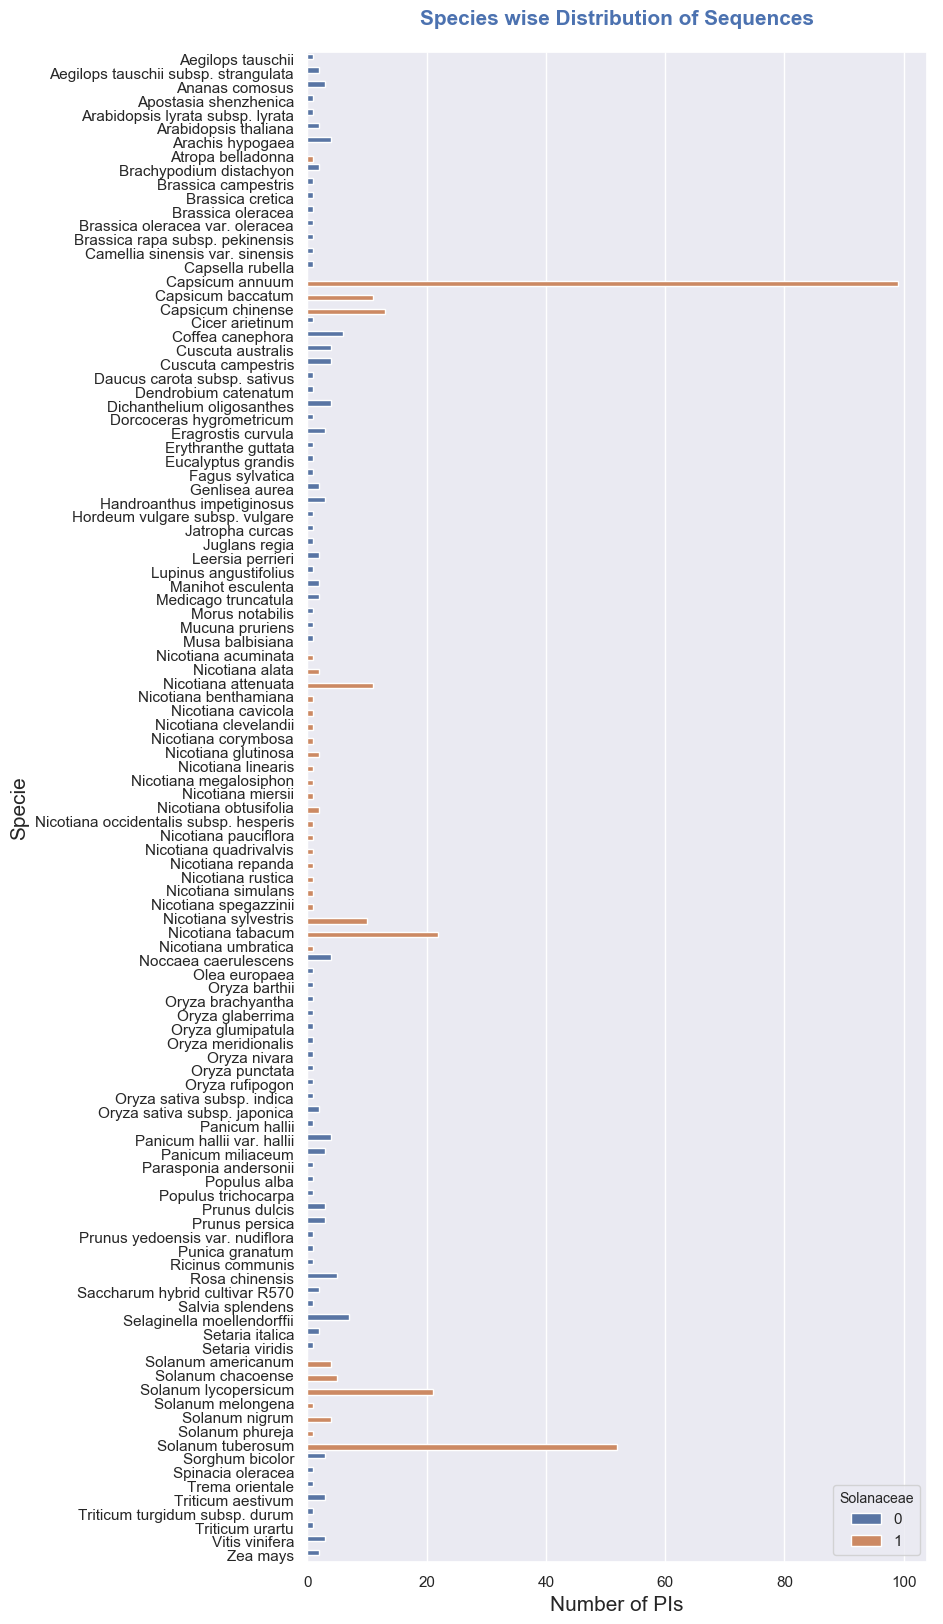

In [42]:
plt.figure(figsize=(8,20),dpi=100)
plt.title('Species wise Distribution of Sequences',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Sequences',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})
g=sns.barplot(x='Number of PIs',y='Specie',hue='Solanaceae',data=species_distribution)
#g.legend_.remove()

### (1.2) Genus Distribution (PIs distribution across genus)

In [45]:
# Genus Distribution shows us the distribution of Pin-II PIs in various Genus.
# For this from tables PI_General_Features and Taxonomy, the relation between PI's and their Genus can be retrieved. From
# this relation we can calculate how many PI's belong to one particular Genus

In [47]:
pi_genus=pi_taxonomy[['UniprotID','Genus','Solanaceae']]

In [50]:
#pi_genus.groupby('Genus').Solanaceae.value_counts().to_csv('Website/G1(2)_GenusDistribution.csv')

In [61]:
genus_distribution=pd.read_csv('Website/G1(2)_GenusDistribution.csv')

In [62]:
genus_distribution.head()

Genus  Solanaceae  Number of PIs
0     Aegilops           0              3
1       Ananas           0              3
2    Apostasia           0              1
3  Arabidopsis           0              3
4      Arachis           0              4

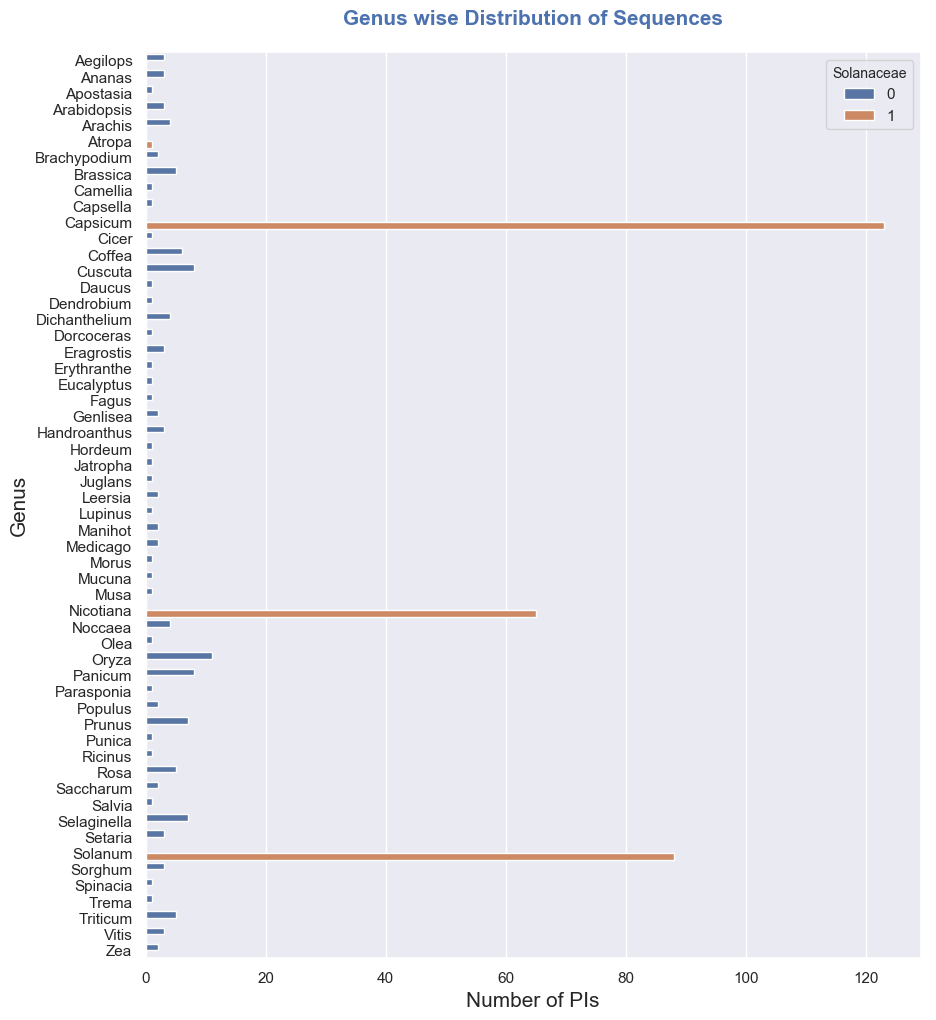

In [64]:
plt.figure(figsize=(10,12),dpi=100)
plt.title('Genus wise Distribution of Sequences',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Sequences',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})
g=sns.barplot(x='Number of PIs',y='Genus',hue='Solanaceae',data=genus_distribution)
#g.legend_.remove()

### (1.3) Cysteine content Distribution

In [65]:
# It shows how many PIs have a particular number of Cysteine in their sequences. The informtion can be retrieved from the
# sequence amino composition table

In [66]:
seq_amino_comp=pd.read_csv('17_Sequence_Amino_Composition.csv')

In [67]:
seq_cys_comp=seq_amino_comp[['UniprotID','C','C_per' ]]

In [68]:
seq_cys_comp.count()

UniprotID    415
C            415
C_per        415
dtype: int64

In [69]:
cysCountInSequences=seq_cys_comp.C.value_counts()

In [72]:
#cysCountInSequences.to_csv('Website/G1(3)_CysteineCountInSequences.csv')

In [78]:
cysCountInSequences=pd.read_csv('Website/G1(3)_CysteineCountInSequences.csv')

In [122]:
#cysCountInSequences

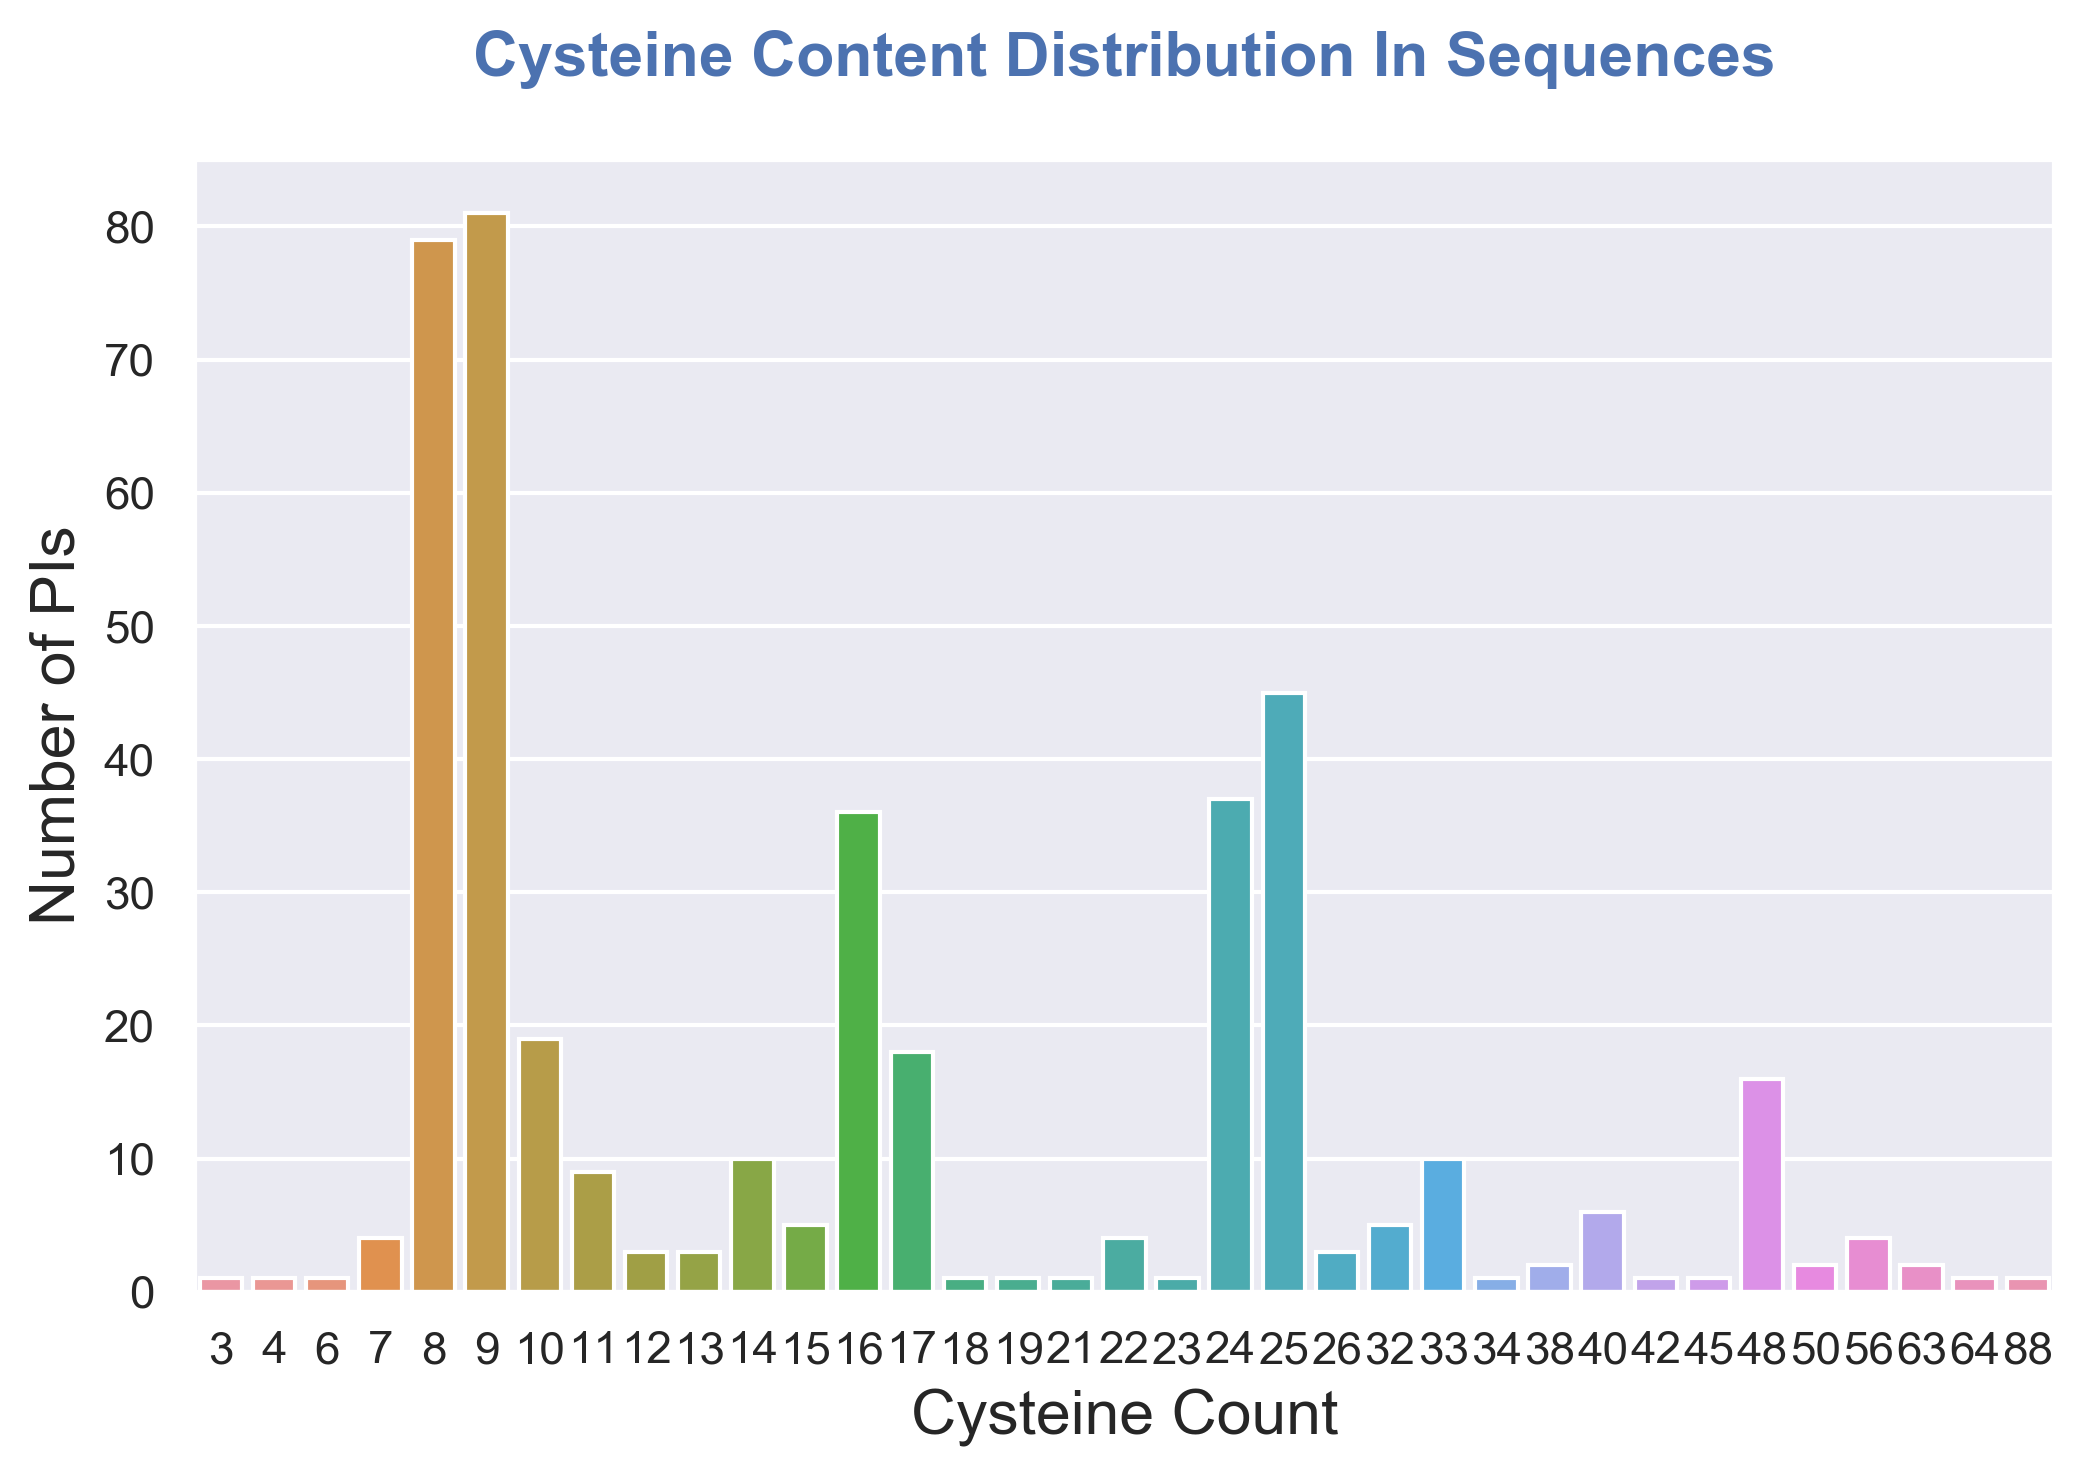

In [80]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Cysteine Content Distribution In Sequences',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Cysteine Count',fontdict={'fontsize':15})
plt.ylabel('Number of Sequences',fontdict={'fontsize':15})
sns.barplot(x='Cysteine Count',y='Number of PIs',data=cysCountInSequences)

### (1.4) Amino Acid Composition

In [81]:
# To show the distribution of Amino Acids in the composition of PIs sequences. We find the avearge of percentage of Amino Acid
# in each sequence.

In [82]:
seq_amino_comp.columns

Index(['Unnamed: 0', 'UniprotID', 'Sequence', 'Length', 'A', 'A_per', 'C',
       'C_per', 'D', 'D_per', 'E', 'E_per', 'F', 'F_per', 'G', 'G_per', 'H',
       'H_per', 'I', 'I_per', 'K', 'K_per', 'L', 'L_per', 'M', 'M_per', 'N',
       'N_per', 'O', 'O_per', 'P', 'P_per', 'Q', 'Q_per', 'R', 'R_per', 'S',
       'S_per', 'T', 'T_per', 'U', 'U_per', 'V', 'V_per', 'W', 'W_per', 'X',
       'X_per', 'Y', 'Y_per', 'Z', 'Z_per'],
      dtype='object')

In [83]:
seq_amino_percentage=seq_amino_comp[['A_per','C_per','D_per','E_per','F_per','G_per','H_per','I_per','K_per','L_per','M_per',
       'N_per','O_per','P_per','Q_per','R_per','S_per','T_per','U_per','V_per','W_per','X_per','Y_per','Z_per']]

In [123]:
#seq_amino_percentage

In [124]:
#seq_amino_percentage.agg([np.mean],axis=0).transpose()

In [86]:
#seq_amino_percentage.agg([np.mean],axis=0).transpose().to_csv('Website/G1(4)Average_aa_percentageDistribution.csv')

In [89]:
seq_amino_avgPercentage=pd.read_csv('Website/G1(4)_Average_aa_percentageDistribution.csv')

In [125]:
#seq_amino_avgPercentage

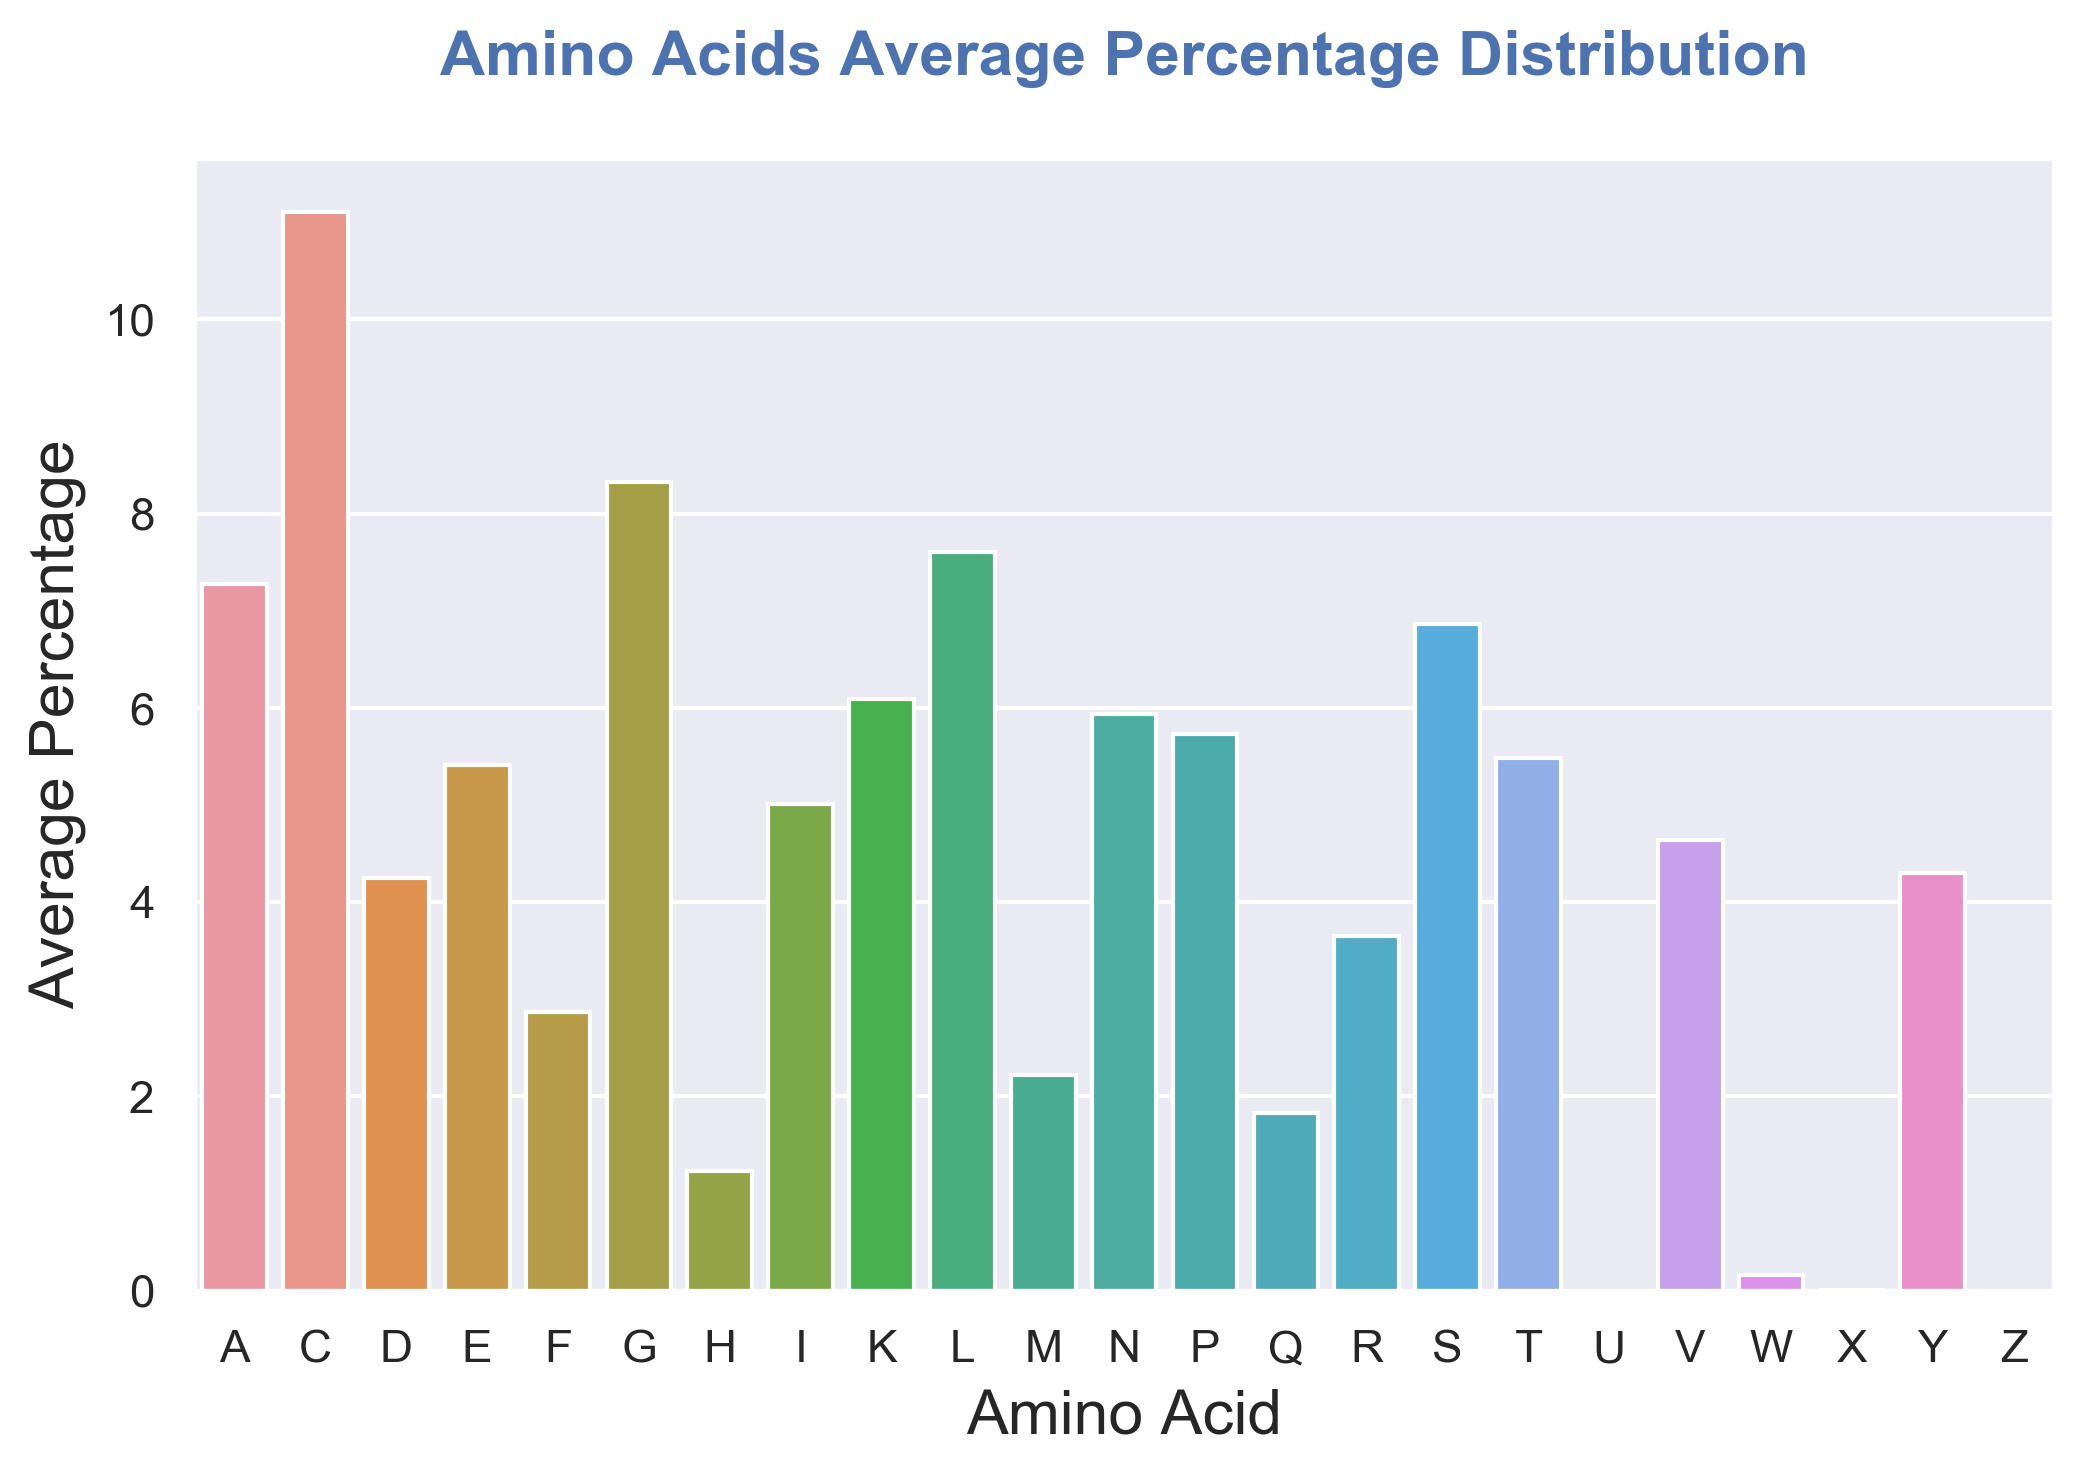

In [91]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Amino Acids Average Percentage Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Amino Acids',fontdict={'fontsize':15})
plt.ylabel('Average Percentage',fontdict={'fontsize':15})
sns.barplot(x='Amino Acid',y='Average Percentage',data=seq_amino_avgPercentage)

## (2) Domains (IRDs) Data Analysis

In [219]:
# Here we perform different data analysis related to the IRDs i.e. Domains

### (2.1) Domain Distribution

In [220]:
# This anlaysis shows the number of times a Domain has been found in the PIN-II PI database. This information can be retreived 
# finding Domain Frequency in Sequence_Domains relation.

In [9]:
seq_domain_rcl_linker=pd.read_csv('14_Sequences_Domains_RCL_Linker_Organisms.csv')

In [14]:
seq_domain=seq_domain_rcl_linker[['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID','DomainType']]

In [96]:
seq_domain.count()

UniprotID     1298
OrganismID    1298
Organism      1298
Genus         1298
Species       1298
Solanaceae    1298
DomainID      1298
DomainType    1295
dtype: int64

In [100]:
domFrequency=seq_domain.DomainID.value_counts()

In [104]:
#domFrequency.to_csv('Website/G2(1)_DomainsDistribution.csv')

In [105]:
domFrequency=pd.read_csv('Graphs/G11_Domain_Occurrences.csv')

In [107]:
domFrequency.sort_values(by='Occurrences',ascending=False,inplace=True)

In [108]:
top40Domains=domFrequency.head(40)

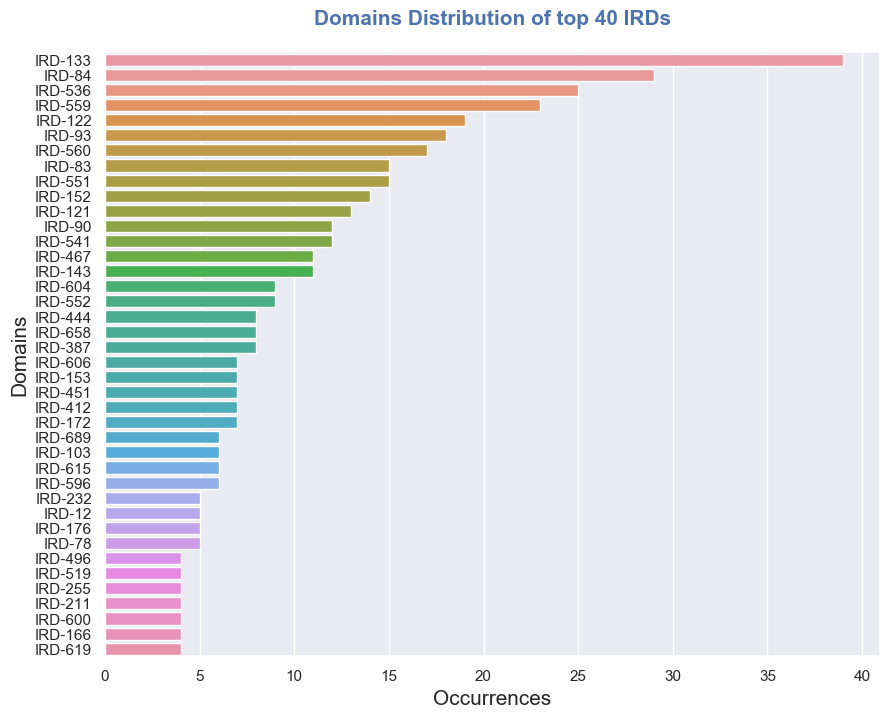

In [109]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Domains Distribution of top 40 IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Occurrences',fontdict={'fontsize':15})
plt.ylabel('Domains',fontdict={'fontsize':15})
sns.barplot(x='Occurrences',y='Domains',data=top40Domains)

### (2.2) Species wise distribution of Domains

In [111]:
# It identifies number of Domains found in species. This information can be extracted from tables PI_General_Features, Taxonomy
# and Sequence_Domains. 

In [114]:
seq_domain.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species', 'Solanaceae',
       'DomainID', 'DomainType'],
      dtype='object')

In [10]:
taxonomy.columns

Index(['Taxon', 'Scientific name', 'Common name', 'Organism', 'Genus',
       'Solanaceae'],
      dtype='object')

In [11]:
taxon_species=taxonomy[['Taxon', 'Scientific name']]

In [126]:
#taxon_species

In [120]:
species_domains=pd.merge(seq_domain,taxon_species,left_on='OrganismID',right_on='Taxon',how='left')

In [122]:
species_domains.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species', 'Solanaceae',
       'DomainID', 'DomainType', 'Taxon', 'Scientific name'],
      dtype='object')

In [123]:
species_domains=species_domains[['Scientific name','DomainID']]

In [133]:
species_domains.duplicated().sum()## These many are duplicate combinations

507

In [134]:
species_domains_unique=species_domains.loc[~species_domains.duplicated(),:].sort_values(['Scientific name','DomainID'])

In [135]:
species_domains_unique.count()

Scientific name    791
DomainID           791
dtype: int64

In [127]:
#species_domains_unique['Scientific name'].value_counts()## Number of distinct IRDs(Domains) found in Species

In [139]:
#species_domains_unique['Scientific name'].value_counts().to_csv('Website/G2(2)_SpeciesWiseDistributionOfDomains.csv')

In [142]:
specie_domain_freq=pd.read_csv('Website/G2(2)_SpeciesWiseDistributionOfDomains.csv')

In [128]:
#specie_domain_freq

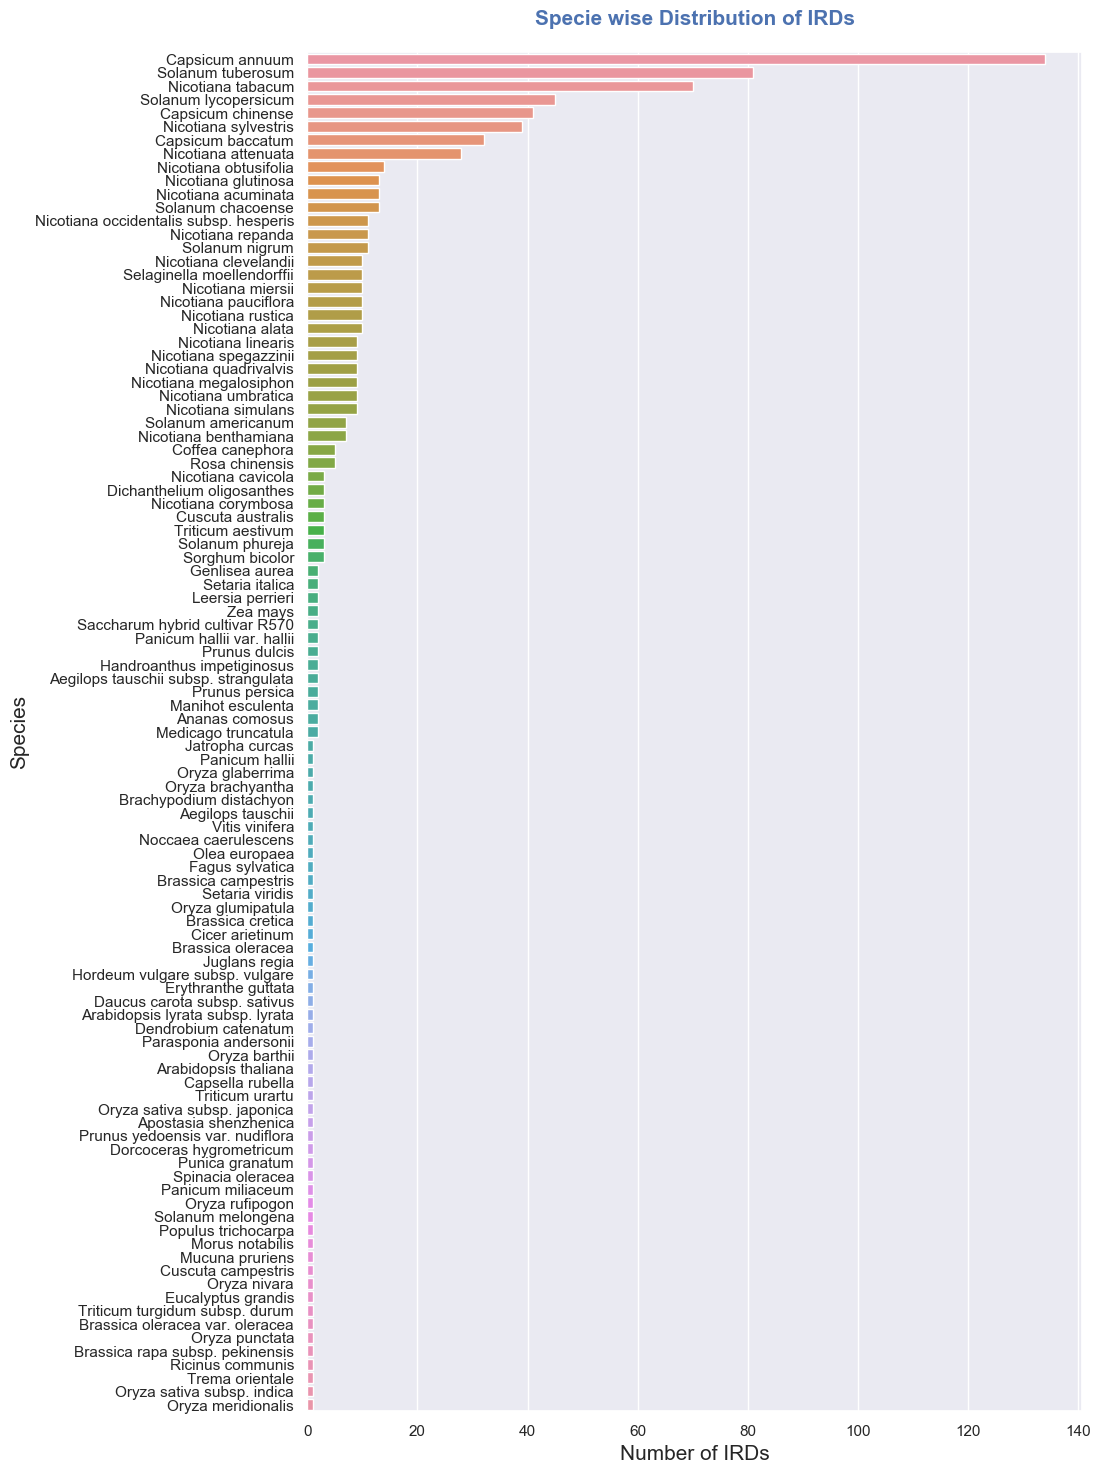

In [147]:
plt.figure(figsize=(10,18),dpi=100)
plt.title('Specie wise Distribution of IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of IRDs',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})
g=sns.barplot(x='Number of IRDs',y='Species',data=specie_domain_freq)
#g.legend_.remove()

### (2.3) Genus wise distribution of Domains

In [149]:
seq_domain.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species', 'Solanaceae',
       'DomainID', 'DomainType'],
      dtype='object')

In [150]:
genus_domain=seq_domain[['Genus','DomainID']]

In [151]:
genus_domain.duplicated().sum()

605

In [152]:
genus_UniqueDomain=genus_domain.loc[~genus_domain.duplicated(),:]

In [153]:
genus_UniqueDomain.count()

Genus       693
DomainID    693
dtype: int64

In [129]:
#genus_UniqueDomain.Genus.value_counts()## Number of distinct IRDs(Domains) found in Genus

In [156]:
#genus_UniqueDomain.Genus.value_counts().to_csv('Website/G2(3)_GenusWiseDistributionOfDomains.csv')## Number of distinct IRDs(Domains) found in Genus

In [157]:
genus_domain_freq=pd.read_csv('Website/G2(3)_GenusWiseDistributionOfDomains.csv')

In [158]:
genus_domain_freq.head()

Genus  Number of IRDs
0    Nicotiana             267
1     Capsicum             184
2      Solanum             152
3  Selaginella              10
4       Coffea               5

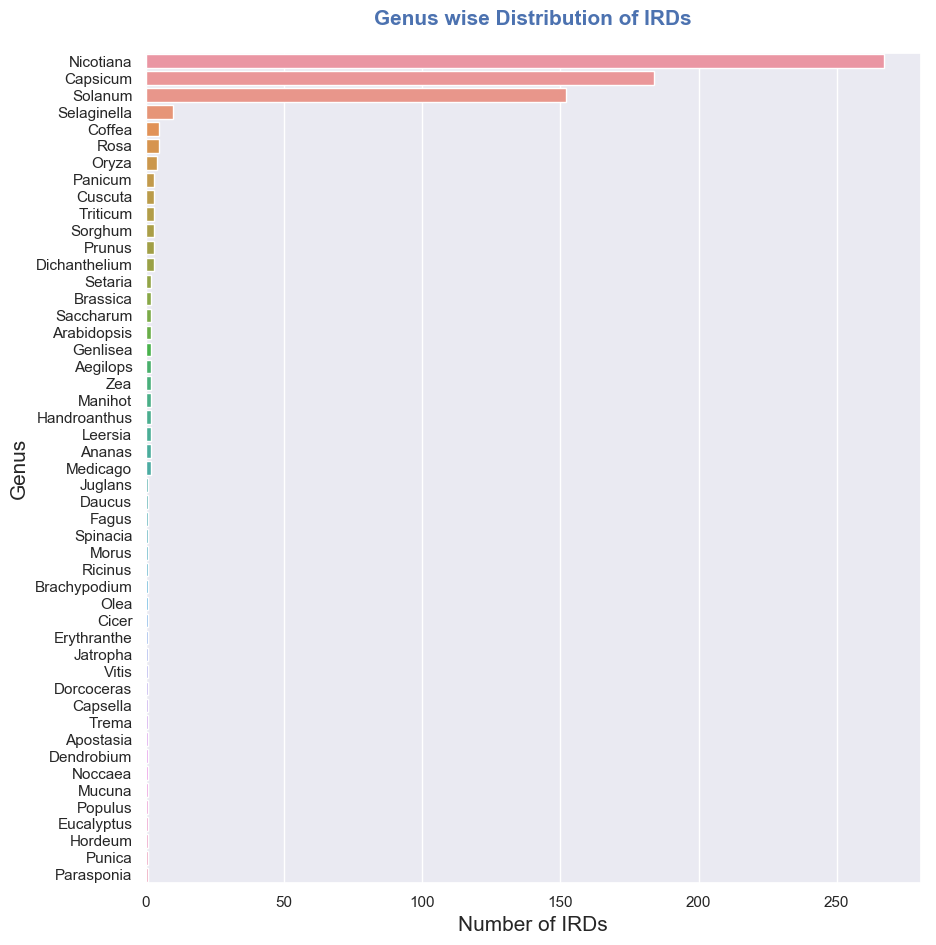

In [159]:
plt.figure(figsize=(10,11),dpi=100)
plt.title('Genus wise Distribution of IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of IRDs',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})
g=sns.barplot(x='Number of IRDs',y='Genus',data=genus_domain_freq)
#g.legend_.remove()

### (2.4) Domain Architectures

In [160]:
# Here we find what combinations of Domains are found in the PIs sequences and how many sequences have these combinations. 
# This information can be found from the sequence_domain table

In [162]:
seq_domain.UniprotID.count()

1298

In [163]:
seq_domain.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'Species', 'Solanaceae',
       'DomainID', 'DomainType'],
      dtype='object')

In [165]:
seq_domain.UniprotID.nunique()

380

In [130]:
#seq_domain.UniprotID.value_counts()## This gives the number of domains found in a particular Sequence

In [170]:
#seq_domain.UniprotID.value_counts().to_csv('Website/G2(4)(a)_SequencyFrequency.csv')

In [171]:
seq_freq=pd.read_csv('Website/G2(4)(a)_SequencyFrequency.csv')

In [131]:
#seq_freq

In [174]:
domArch=seq_freq['Number of Domains'].value_counts()

In [176]:
#domArch.to_csv('Website/G2(4)(b)_DomainArchitecture.csv')

In [181]:
domArch=pd.read_csv('Website/G2(4)(b)_DomainArchitecture.csv')

In [182]:
domArch

Domains Count  Number of Sequences
0               1                  170
1               5                   77
2               3                   50
3               2                   22
4              11                   17
5               7                   16
6               4                   10
7               9                    6
8              13                    4
9              15                    3
10             10                    2
11             21                    1
12             12                    1
13              6                    1

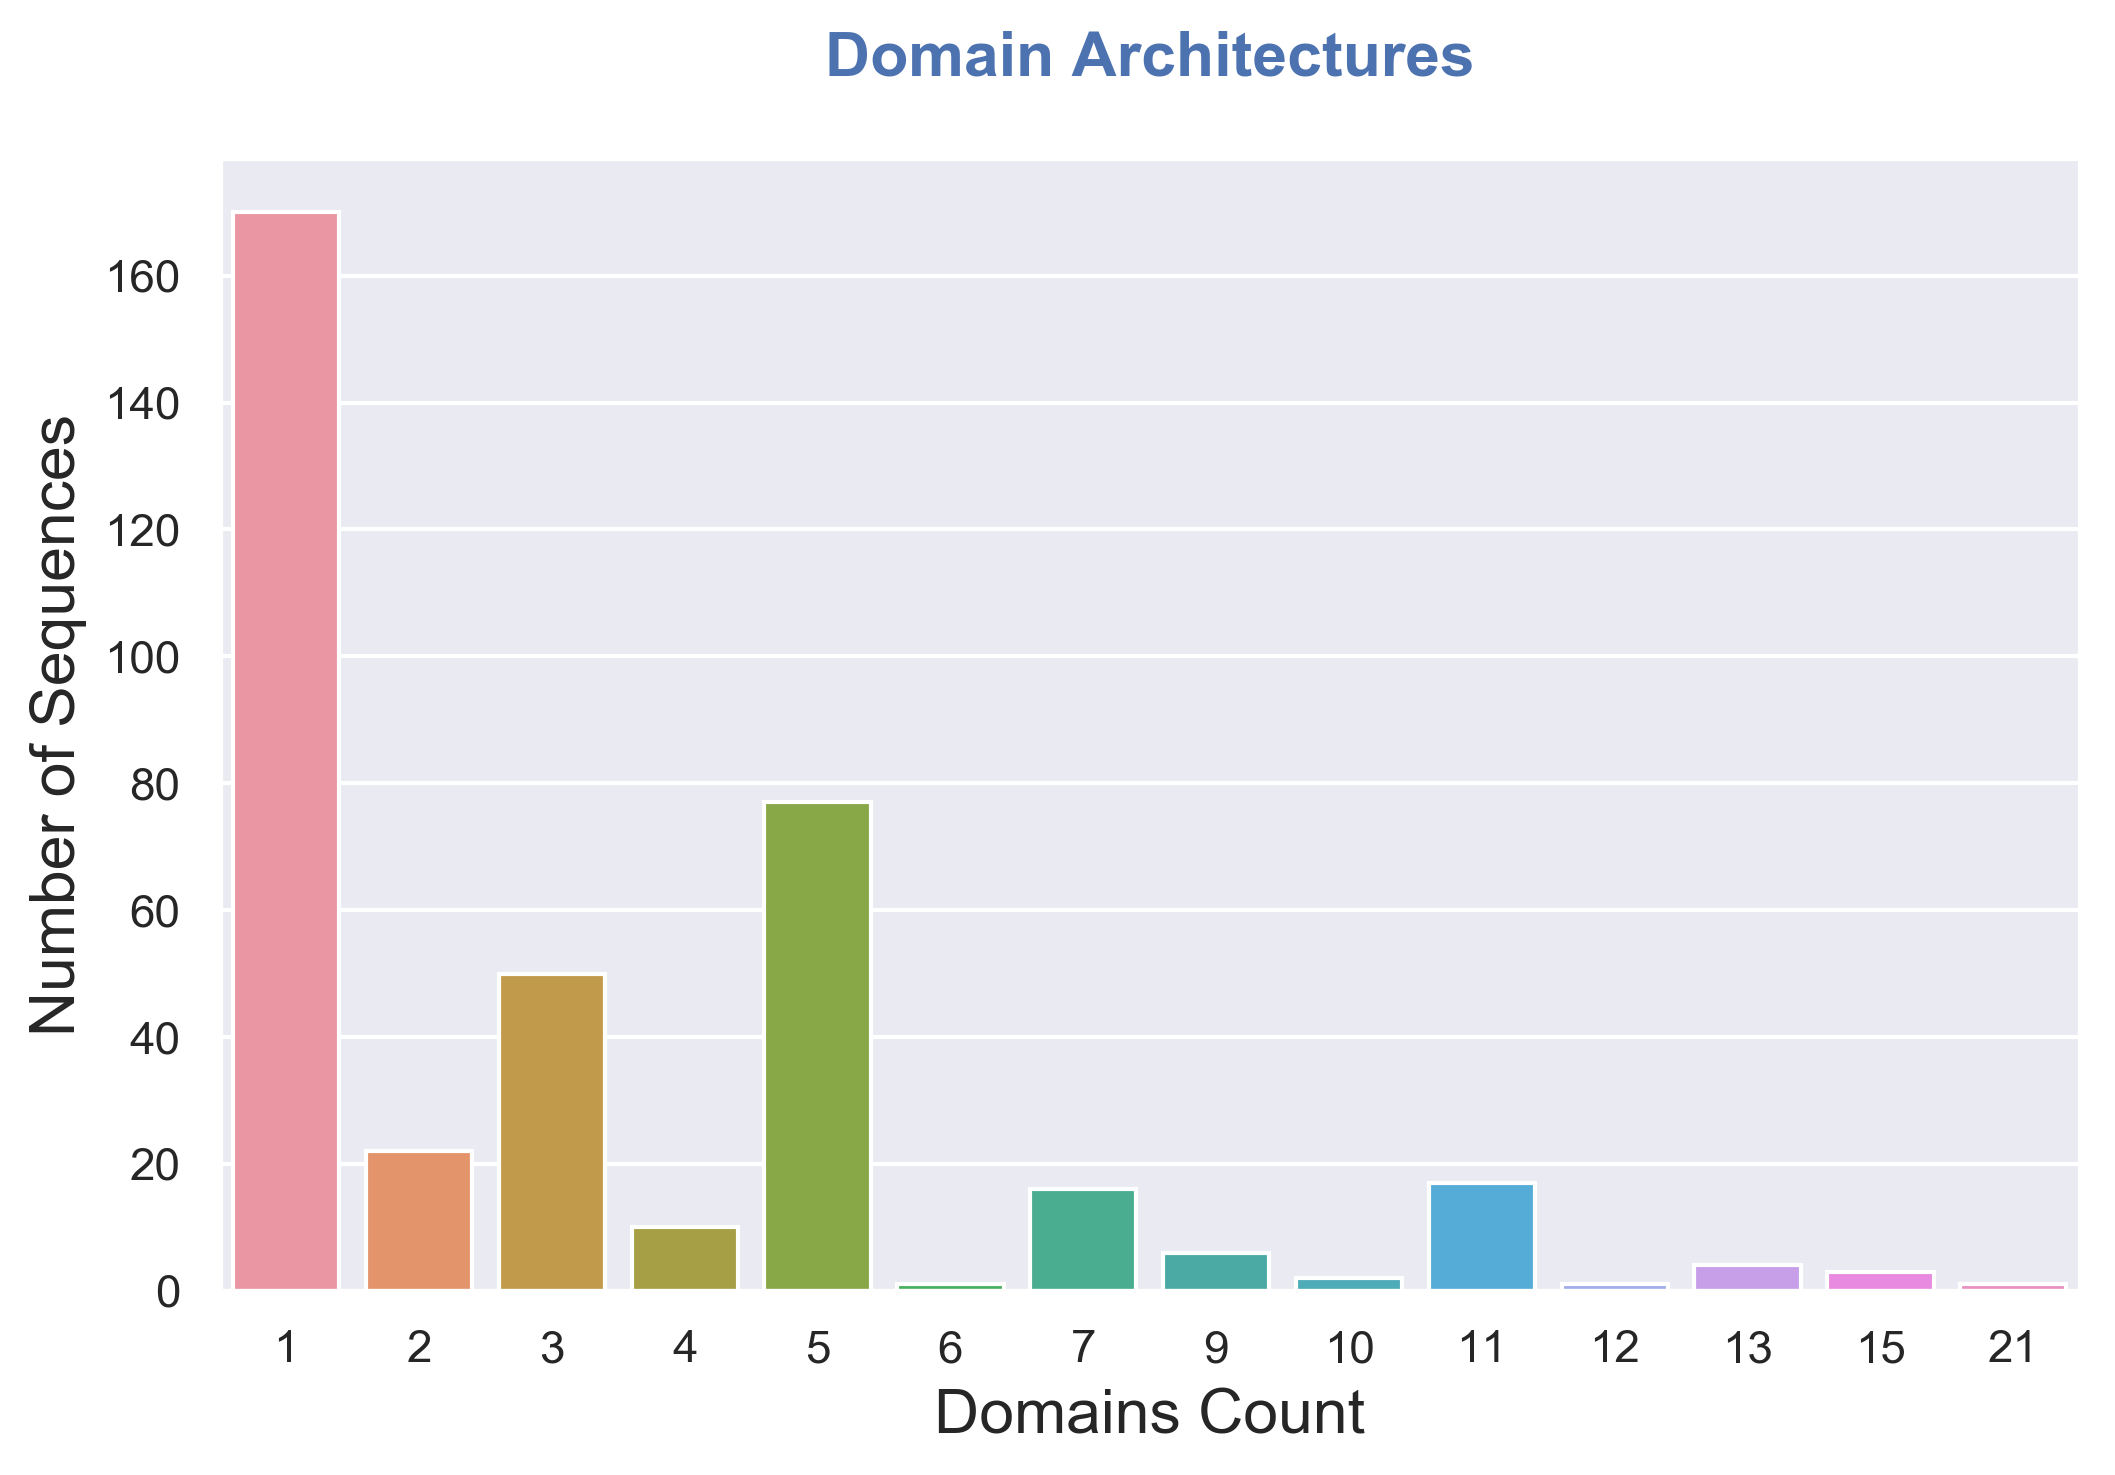

In [197]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Domain Architectures',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('n-Domains',fontdict={'fontsize':15})
plt.ylabel('Number of Sequences',fontdict={'fontsize':15})
sns.barplot(x='Domains Count',y='Number of Sequences',data=domArch)

### (2.5) Disulphide Bonds Ditsribution

In [184]:
# It shows number of Domians having a particular count of Disulphide Bonds. This information can be retreived from table
# Disulphide Bonds

In [185]:
dsBonds=pd.read_csv('15_Domains_Disulphide_Bonds.csv')

In [187]:
dsBonds.count()

domainID        698
sequence        698
dsBonds_list    698
bondCount       698
confidence      698
dtype: int64

In [188]:
dsBonds.columns

Index(['domainID', 'sequence', 'dsBonds_list', 'bondCount', 'confidence'], dtype='object')

In [190]:
dsBondsDistribution=dsBonds.bondCount.value_counts()

In [193]:
#dsBondsDistribution.to_csv('Website/G2(5)(b)_DSBondsDistribution.csv')

In [194]:
dsBondsDistribution=pd.read_csv('Website/G2(5)(b)_DSBondsDistribution.csv')

In [195]:
dsBondsDistribution

n-Disulphide Bonds  Number of Domains
0                   4                647
1                   3                 28
2                   2                 15
3                   0                  7
4                   1                  1

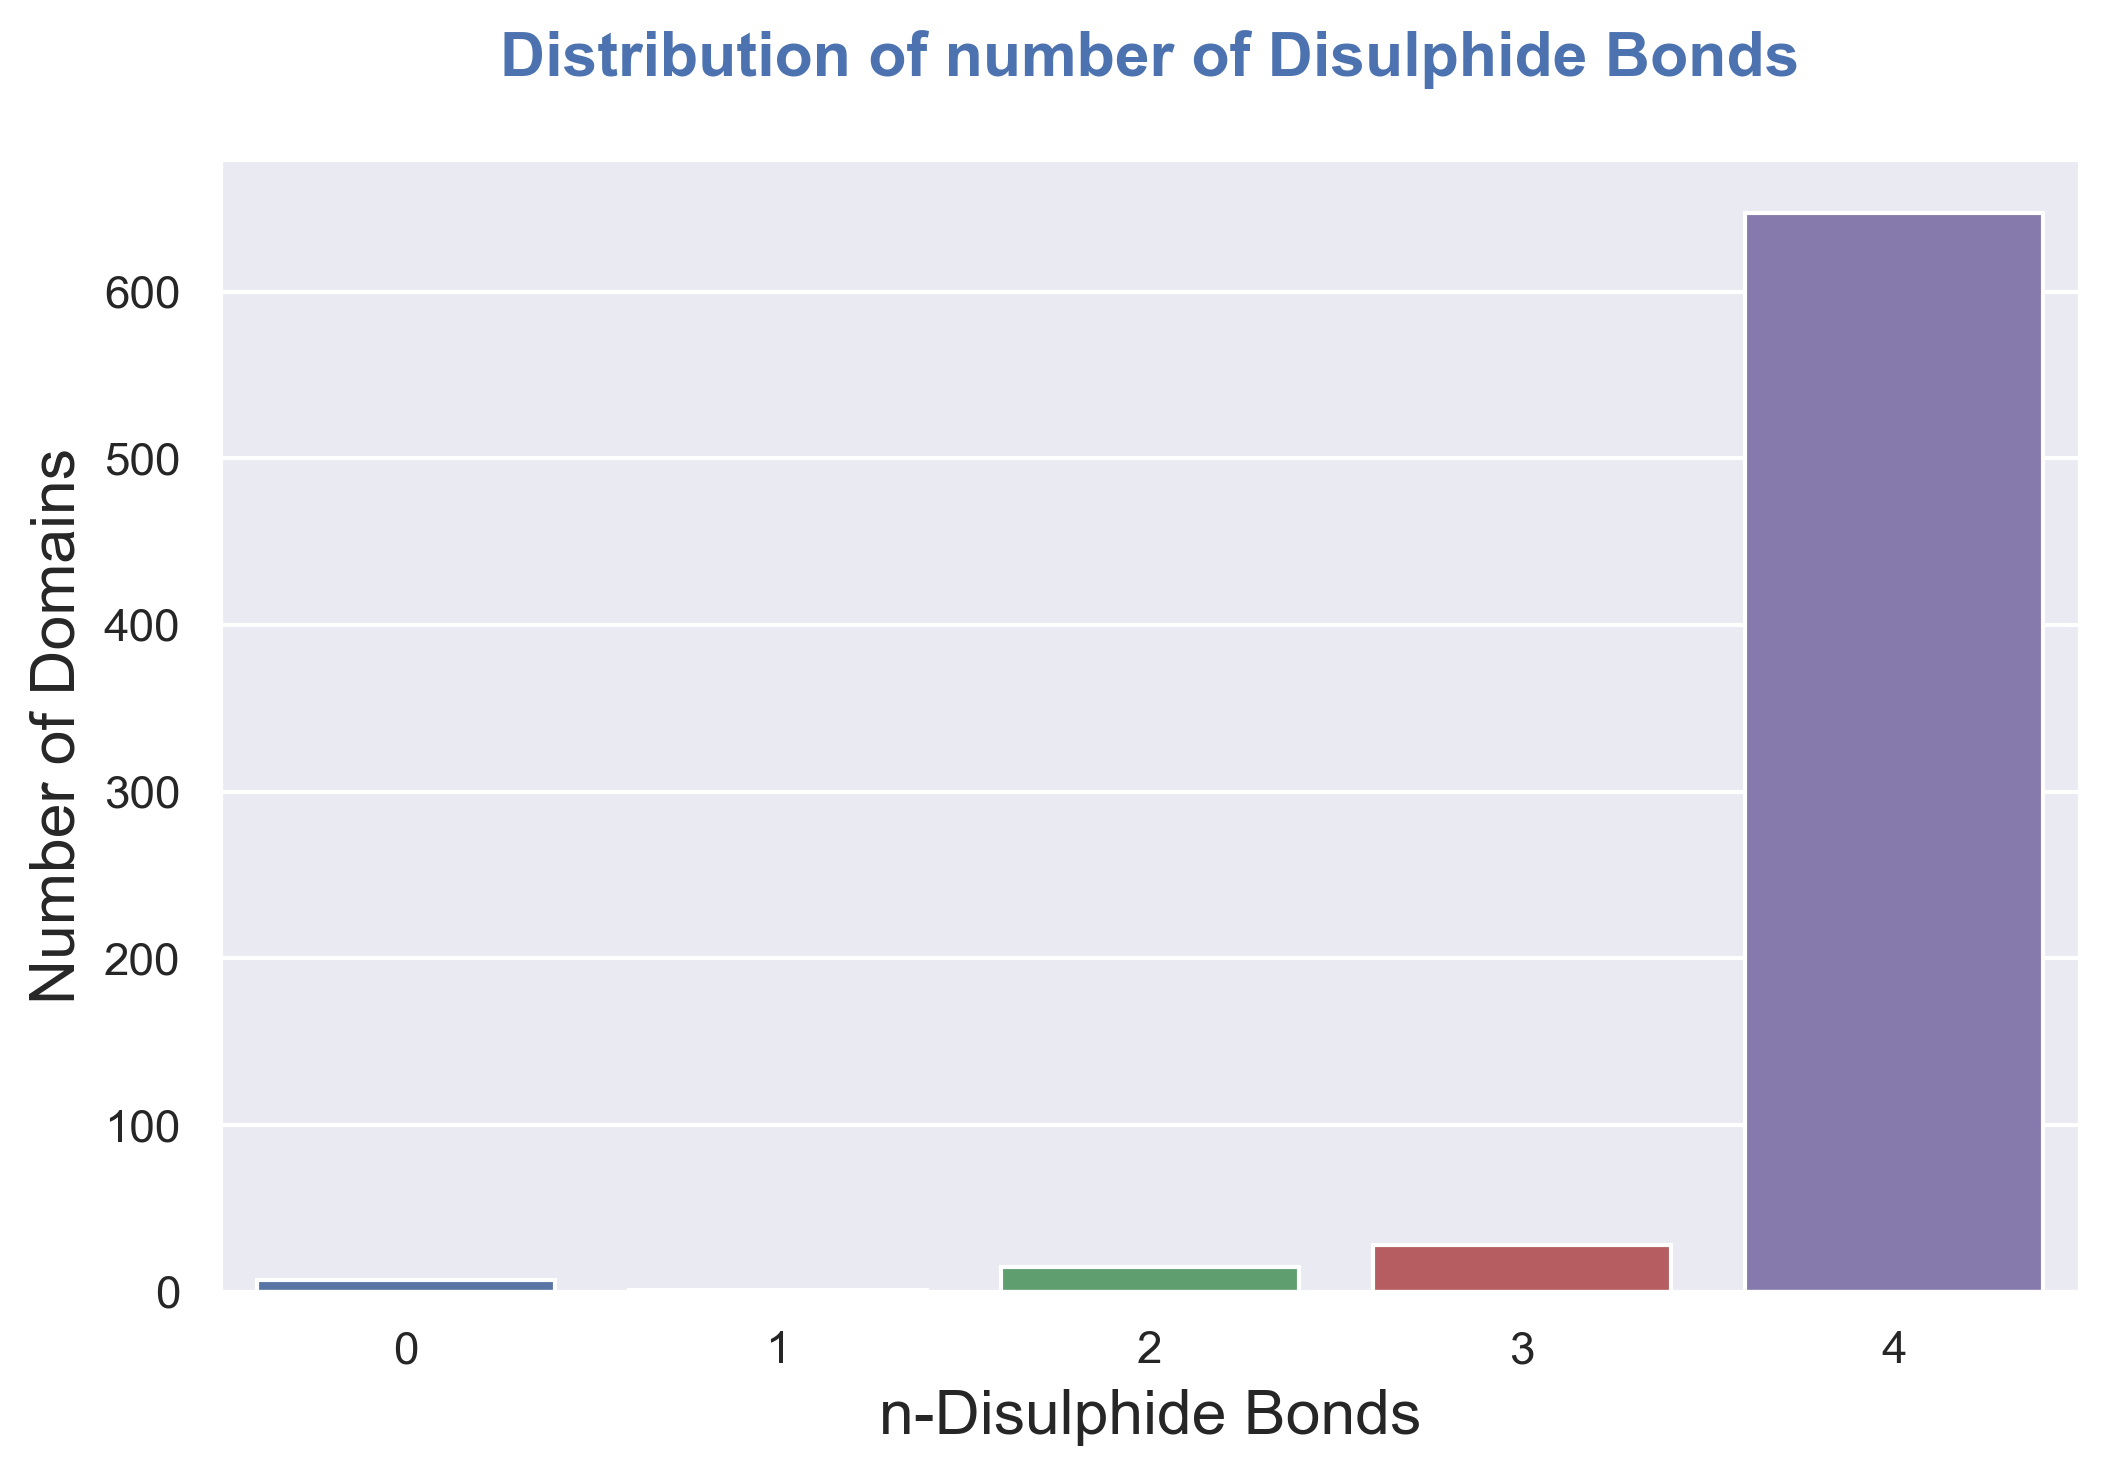

In [196]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Distribution of number of Disulphide Bonds',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('n-Disulphide Bonds',fontdict={'fontsize':15})
plt.ylabel('Number of Domains',fontdict={'fontsize':15})
sns.barplot(x='n-Disulphide Bonds',y='Number of Domains',data=dsBondsDistribution)

### (2.6) Cysteine content Distribution

In [198]:
# It shows how many Domains have a particular number of Cysteine in their sequences. The informtion can be retrieved from the
# domains amino composition table

In [199]:
dom_amino_comp=pd.read_csv('18_Domain_Amino_Composition.csv')

In [200]:
dom_cys_comp=dom_amino_comp[['DomainID', 'C','C_per']]

In [201]:
cysCountFreq=dom_cys_comp.C.value_counts()

In [204]:
#cysCountFreq.to_csv('Website/G2(6)_CysteineCountFrequency.csv')

In [205]:
cysCountFreq=pd.read_csv('Website/G2(6)_CysteineCountFrequency.csv')

In [206]:
cysCountFreq

Cysteine Count  Number of Domains
0               8                642
1               7                 38
2               9                  7
3               4                  6
4               6                  2
5               3                  2
6               5                  1

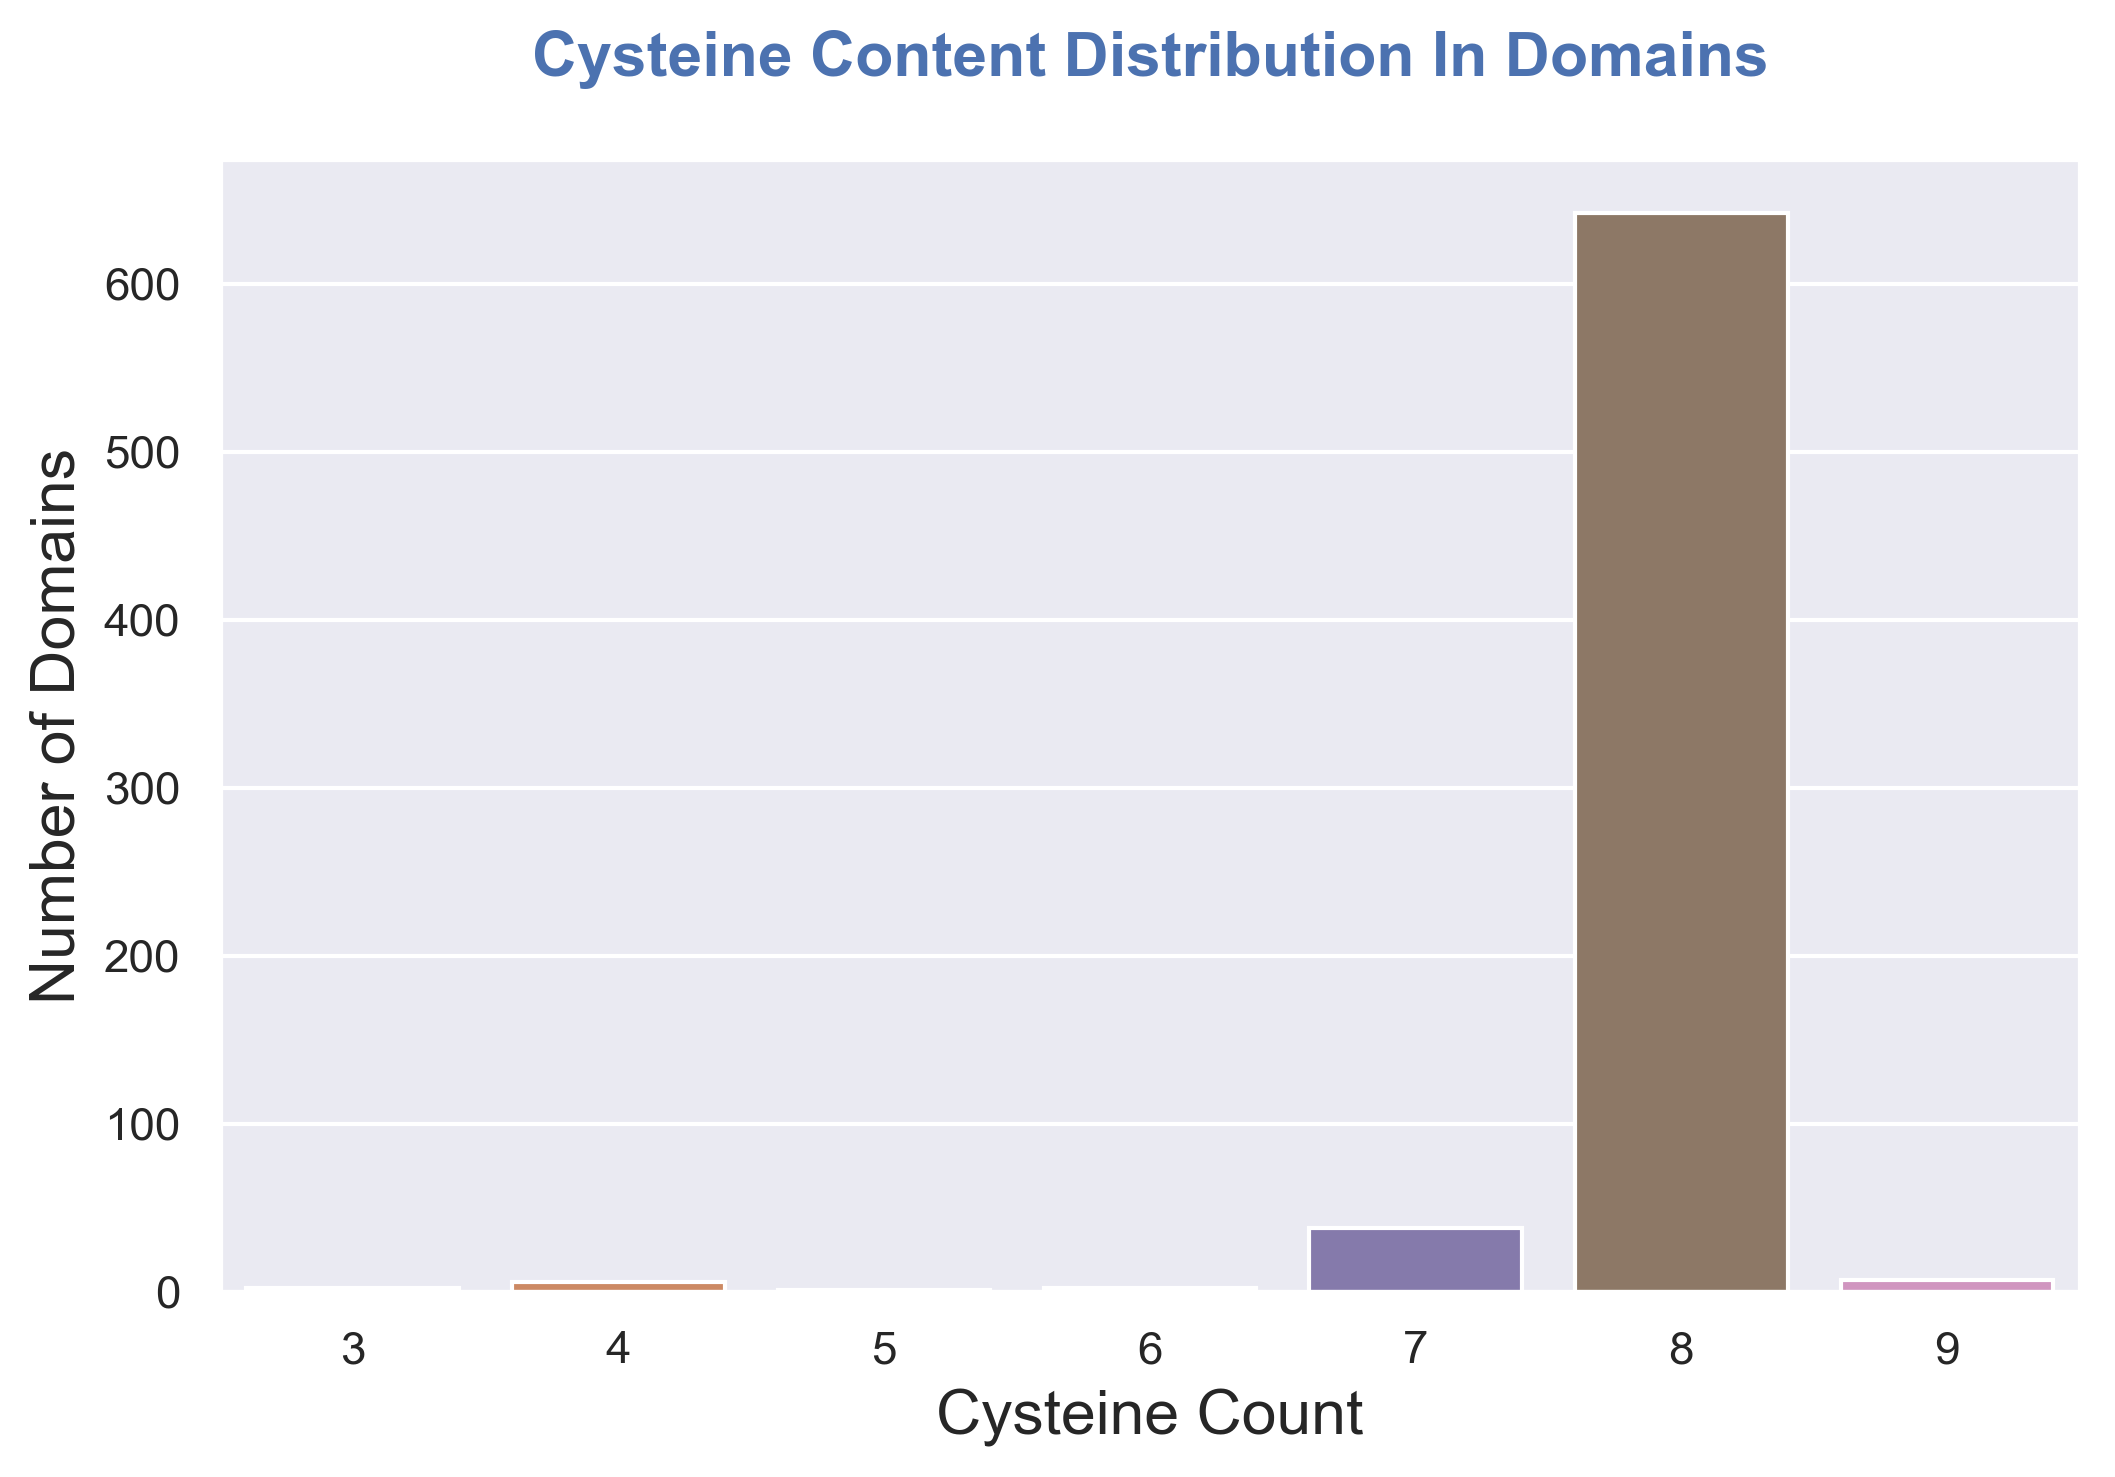

In [207]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Cysteine Content Distribution In Domains',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Cysteine Count',fontdict={'fontsize':15})
plt.ylabel('Number of Domains',fontdict={'fontsize':15})
sns.barplot(x='Cysteine Count',y='Number of Domains',data=cysCountFreq)

### (2.7) Amino Acid (AA) Composition

In [208]:
# To show the distribution of Amino Acids in the composition of Domains sequences. We find the avearge of percentage of Amino Acid
# in each Domain.

In [209]:
dom_amino_comp=pd.read_csv('18_Domain_Amino_Composition.csv')

In [132]:
#dom_amino_comp

In [211]:
dom_amino_percentage=dom_amino_comp[['A_per','C_per','D_per','E_per','F_per','G_per','H_per','I_per','K_per','L_per','M_per',
       'N_per','O_per','P_per','Q_per','R_per','S_per','T_per','U_per','V_per','W_per','X_per','Y_per','Z_per']]

In [133]:
#dom_amino_percentage

In [134]:
#dom_amino_percentage.agg([np.mean],axis=0).transpose()

In [214]:
#dom_amino_percentage.agg([np.mean],axis=0).transpose().to_csv('Website/G2(7)_Average_aa_percentageDistribution.csv')

In [216]:
dom_amino_avgPercentage=pd.read_csv('Website/G2(7)_Average_aa_percentageDistribution.csv')

In [217]:
dom_amino_avgPercentage

Amino Acid  Average Percentage
0           A            5.696042
1           C           15.429562
2           D            4.967127
3           E            4.525737
4           F            3.207083
5           G            9.611348
6           H            0.596469
7           I            4.962365
8           K            6.973659
9           L            2.842371
10          M            0.624147
11          N            6.804800
12          O            0.000000
13          P            6.759428
14          Q            1.282522
15          R            5.344435
16          S            6.120220
17          T            6.324469
18          U            0.000000
19          V            2.413248
20          W            0.043639
21          X            0.005510
22          Y            5.465819
23          Z            0.000000

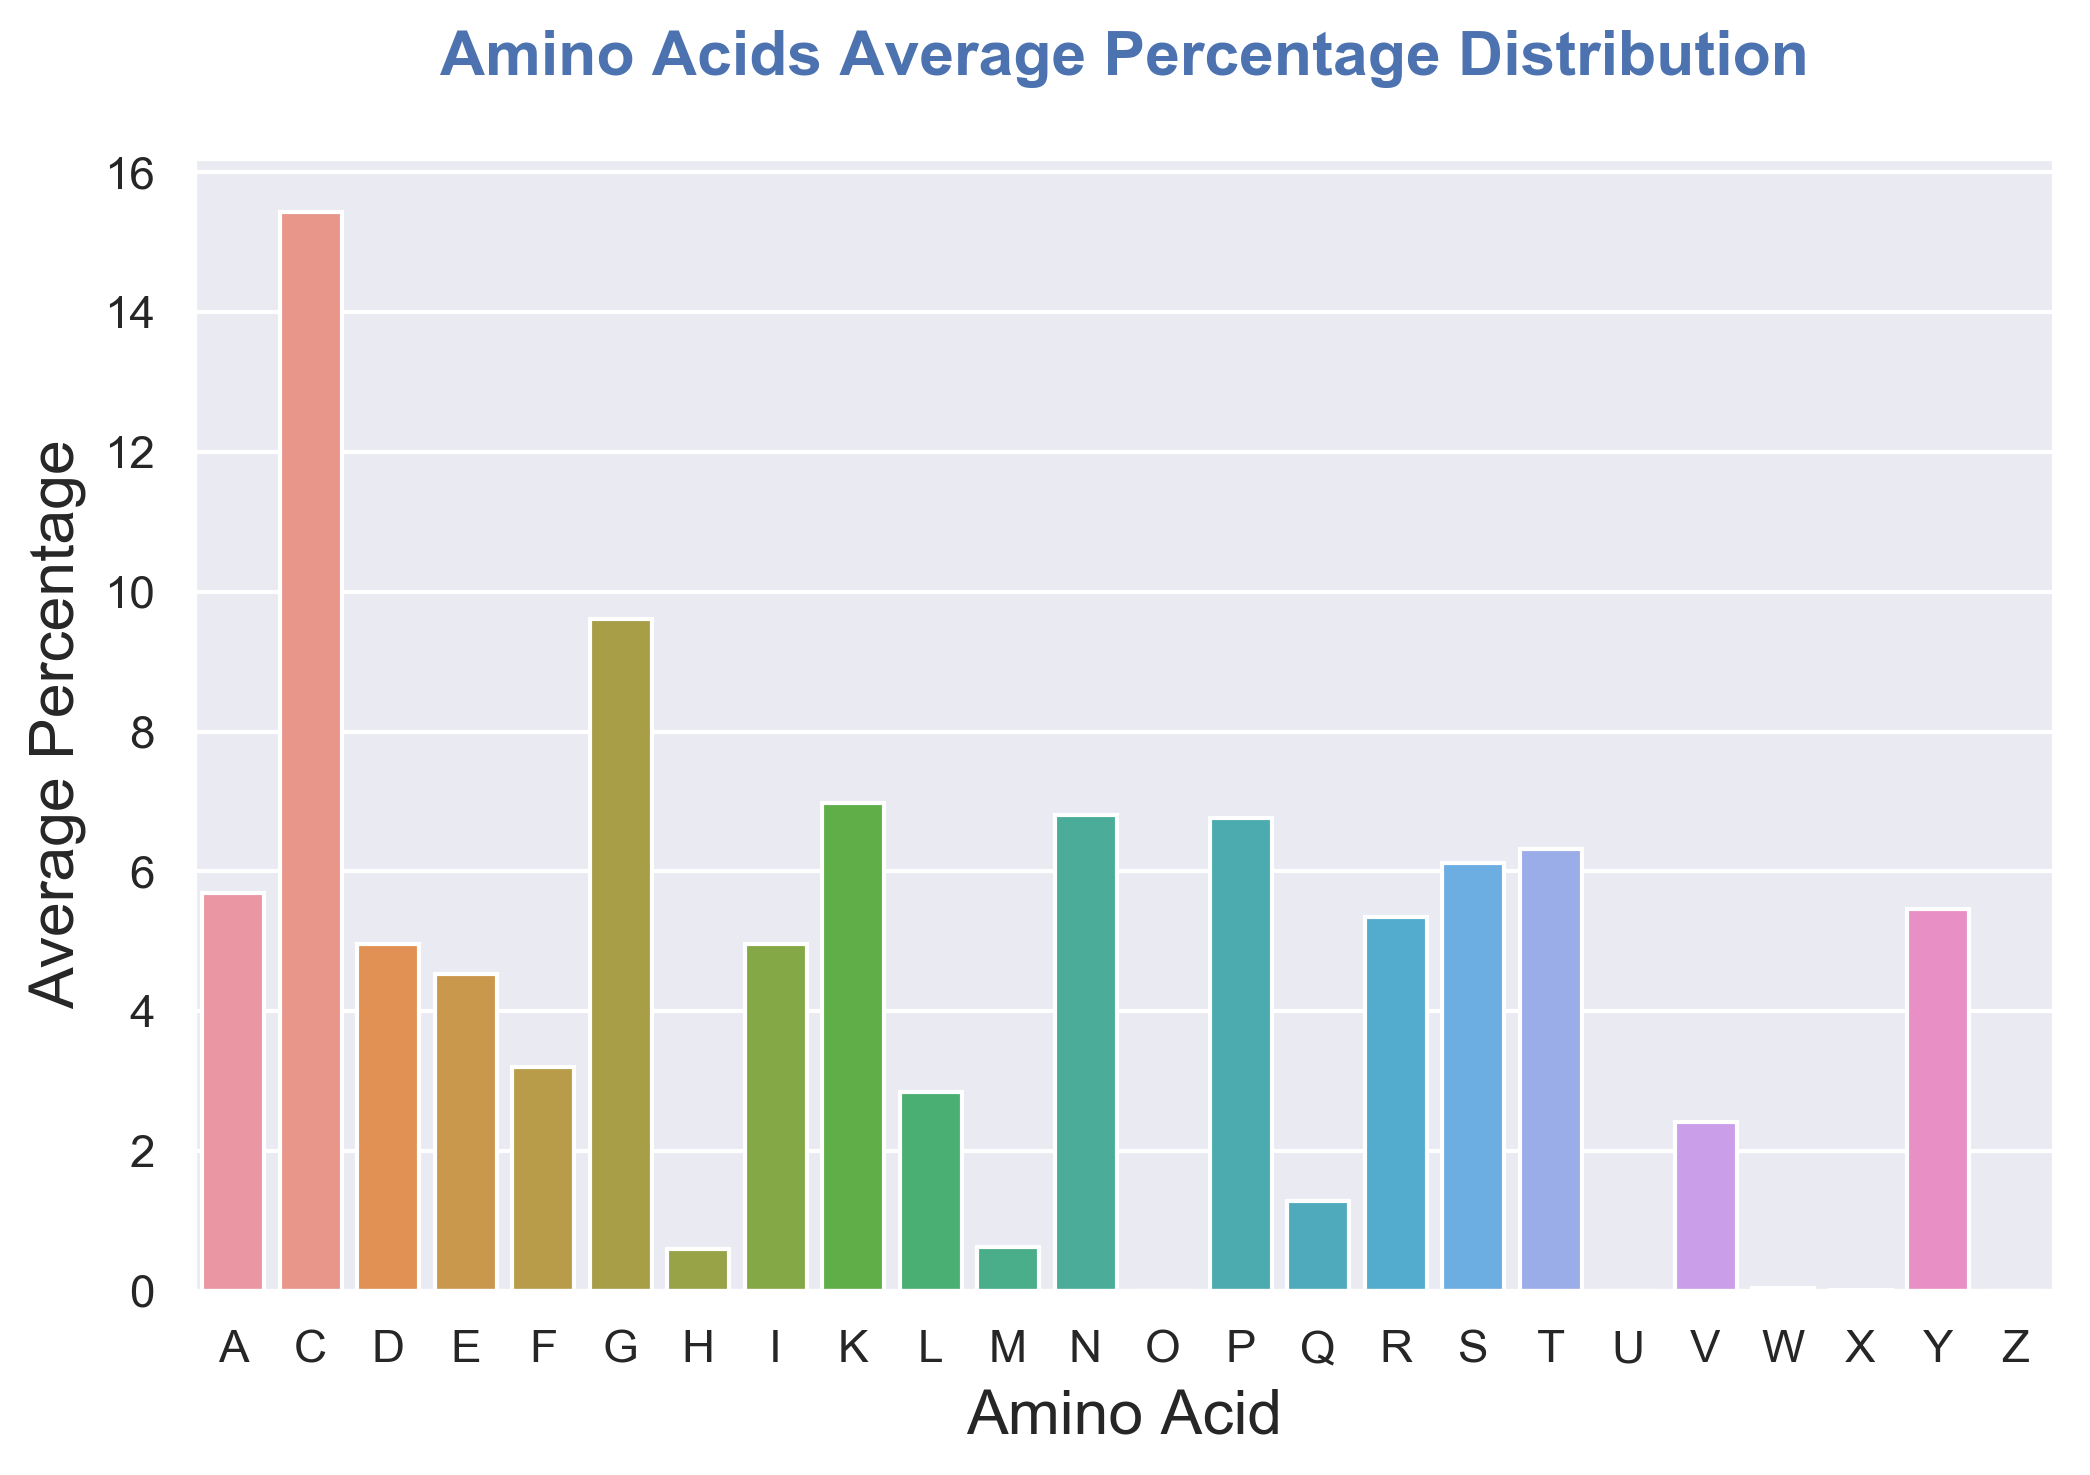

In [218]:
plt.figure(figsize=(8,5),dpi=300)
plt.title('Amino Acids Average Percentage Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Amino Acids',fontdict={'fontsize':15})
plt.ylabel('Average Percentage',fontdict={'fontsize':15})
sns.barplot(x='Amino Acid',y='Average Percentage',data=dom_amino_avgPercentage)

## (3) Reactive Loops (RCL) Data Analysis

In [221]:
# Here we perform different data analysis related to the RCLs

### (3.1) RCL Distribution

In [222]:
# This anlaysis shows the number of times a RCL has been found in the PIN-II PI database. This information can be retreived 
# finding RCL Frequency using Tables Sequence_Domains and Domains.

In [50]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [51]:
seq_rcl=seq_domain_rcl_linker[['UniprotID','OrganismID', 'Organism', 'Genus','RclID', 'RCL']]

In [52]:
seq_rcl.count()

UniprotID     1298
OrganismID    1298
Organism      1298
Genus         1298
RclID         1295
RCL           1295
dtype: int64

In [227]:
rclFreq=seq_rcl.RCL.value_counts()

In [230]:
#rclFreq.to_csv('Website/G3(1)_RCL_Distribution.csv')

In [234]:
rclFreq=pd.read_csv('Website/G3(1)_RCL_Distribution.csv')

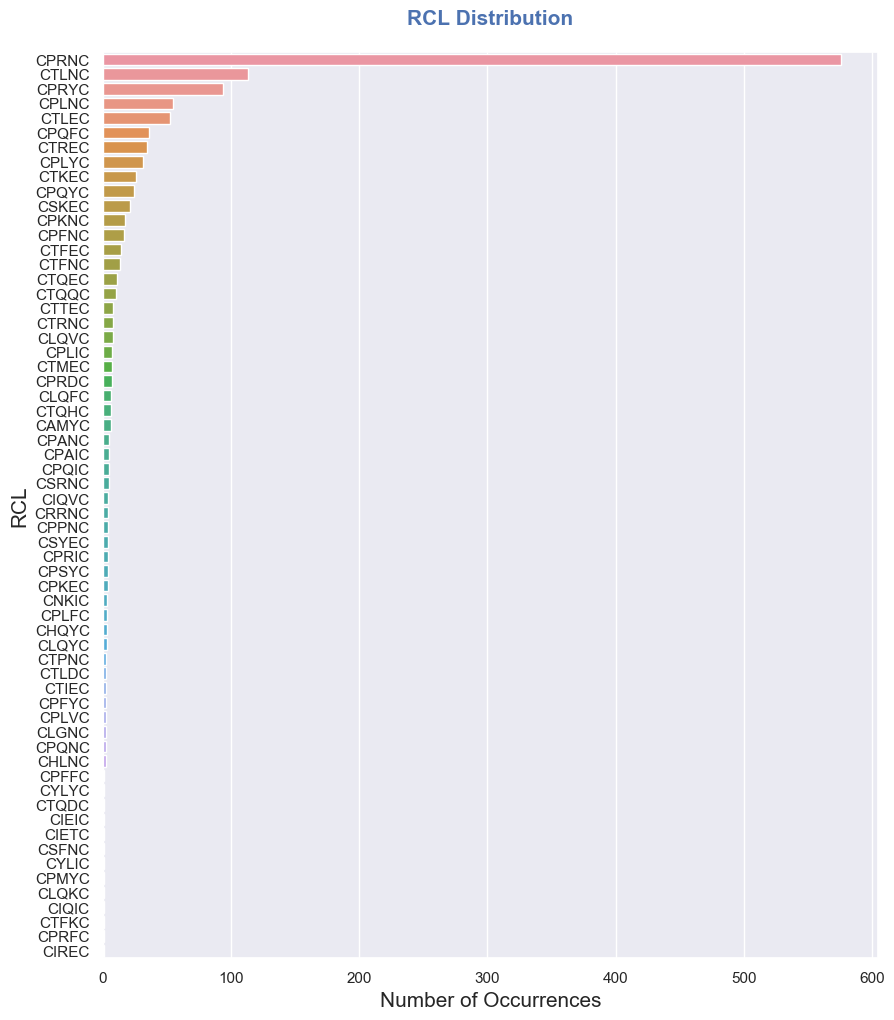

In [235]:
plt.figure(figsize=(10,12),dpi=100)
plt.title('RCL Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Occirrences',fontdict={'fontsize':15})
plt.ylabel('RCL',fontdict={'fontsize':15})
g=sns.barplot(x='Number of Occurrences',y='RCL',data=rclFreq)
#g.legend_.remove()

### (3.2) Specie wise distribution of RCL

In [2]:
# To find which RCLs are found in a particular specie and its number of Occurrences. This information can be retreived 
# finding RCL Frequency in species using Tables Sequence_Domains,Taxonomy and Domains.

In [135]:
#seq_rcl

In [54]:
org_rcl=seq_rcl[['OrganismID','RclID','RCL']]

In [136]:
#taxon_species

In [56]:
species_rcl=pd.merge(org_rcl,taxon_species,left_on='OrganismID',right_on='Taxon',how='left')

In [57]:
species_rcl=species_rcl[['OrganismID','Scientific name','RclID','RCL']]

In [137]:
#species_rcl

In [138]:
#species_rcl.groupby('Scientific name').RCL.value_counts()

In [253]:
#species_rcl.groupby('Scientific name').RCL.value_counts().to_csv('Website/G3(2)_RCL_OccurrencesIn_Specie.csv')

In [59]:
specie_rcl=pd.read_csv('Website/G3(2)_RCL_OccurrencesIn_Specie.csv')

In [139]:
#specie_rcl

In [257]:
specie_rcl_pivot=pd.pivot_table(data=specie_rcl,index='Specie',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

In [140]:
#specie_rcl_pivot

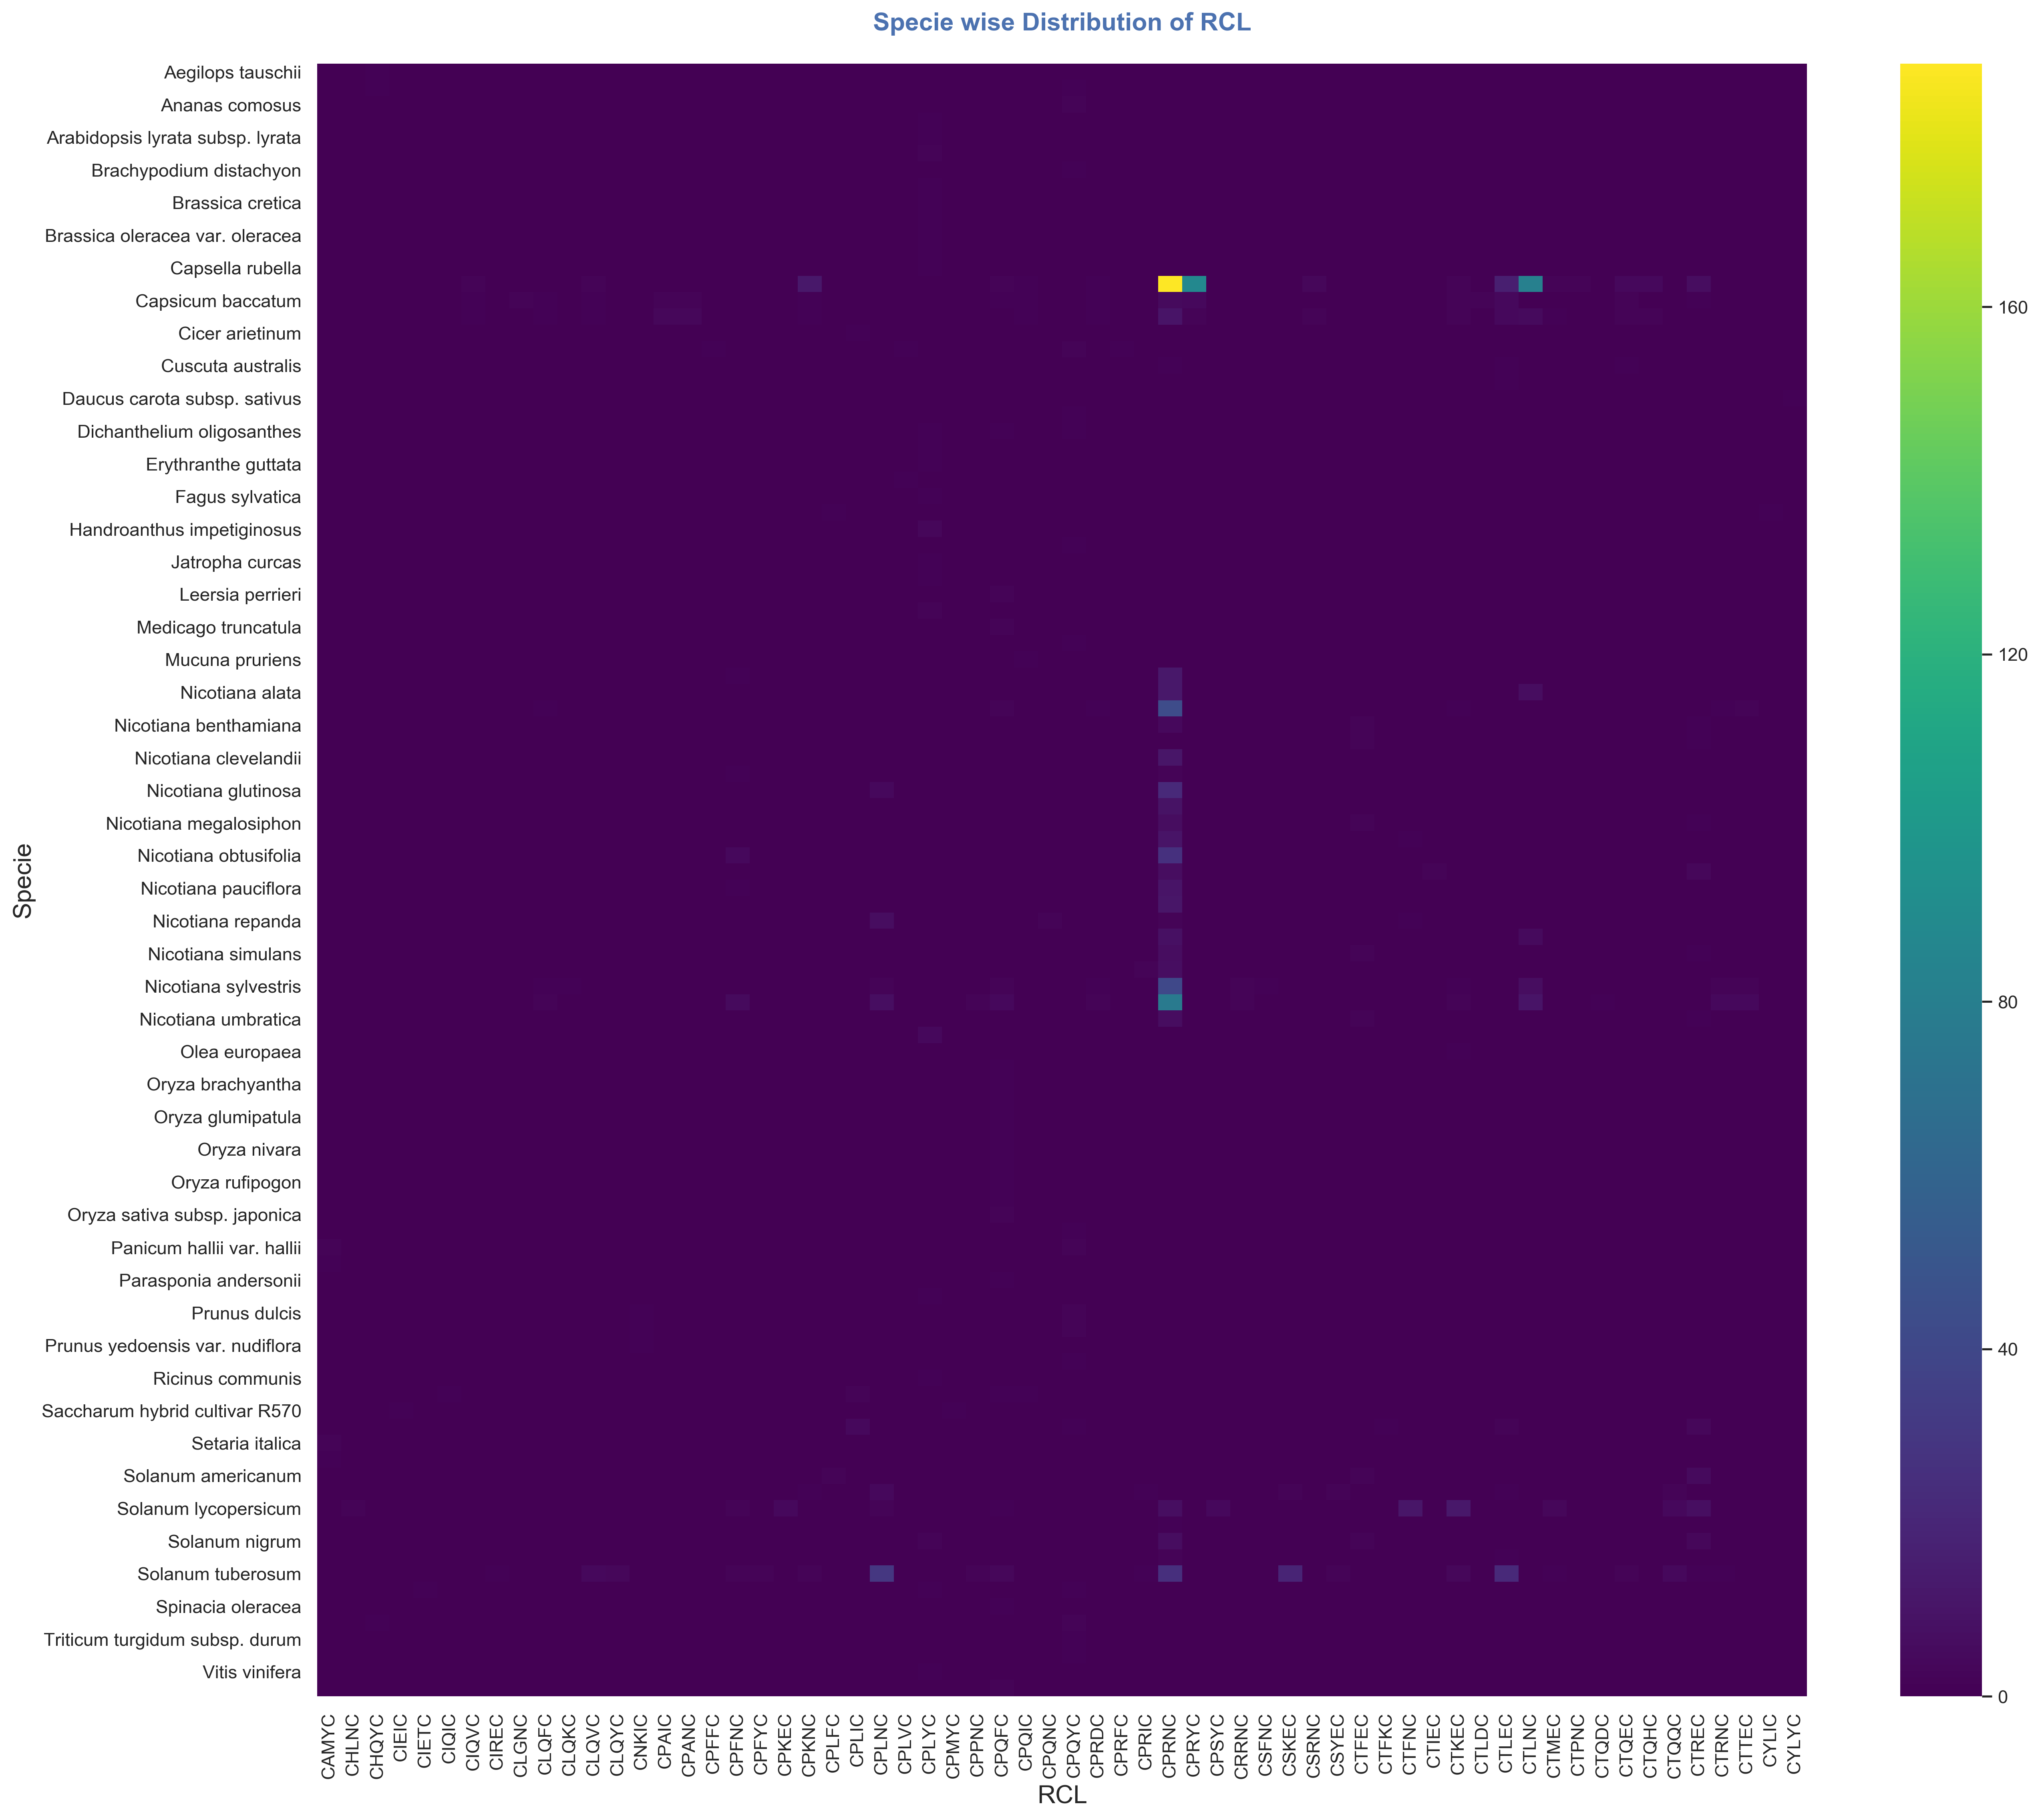

In [259]:
plt.figure(figsize=(20,18),dpi=300)
plt.title('Specie wise Distribution of RCL',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})

sns.heatmap(specie_rcl_pivot,cmap='viridis')

### (3.3) Specie wise distribution of RCL in Top 10 Species.

In [ ]:
# To find which RCLs are found in Top 10 species and its number of Occurrences. This information can be retreived 
# finding RCL Frequency in species using Tables Sequence_Domains,Taxonomy and Domains. Top 10 species are determined by
# Species Distribution i.e. to which species maximum number of PIs belong to. 

In [60]:
species_distribution=pd.read_csv('Website/G1(1)_SpeciesDistribution.csv')

In [61]:
species_distribution.sort_values('Number of PIs',ascending=False,inplace=True)

In [62]:
top10Species=species_distribution['Specie'].head(10)

In [63]:
top10Species

16                Capsicum annuum
100             Solanum tuberosum
63              Nicotiana tabacum
96           Solanum lycopersicum
18              Capsicum chinense
17              Capsicum baccatum
45            Nicotiana attenuata
62           Nicotiana sylvestris
91     Selaginella moellendorffii
20               Coffea canephora
Name: Specie, dtype: object

In [141]:
#specie_rcl

In [62]:
specie_rcl_top10=specie_rcl.loc[specie_rcl.Specie.isin(top10Species),:]

In [64]:
specie_rcl_top10.Specie.unique()

array(['Capsicum annuum', 'Capsicum baccatum', 'Capsicum chinense',
       'Coffea canephora', 'Nicotiana attenuata', 'Nicotiana sylvestris',
       'Nicotiana tabacum', 'Selaginella moellendorffii',
       'Solanum lycopersicum', 'Solanum tuberosum'], dtype=object)

In [65]:
specieTop10_rcl_pivot=pd.pivot_table(data=specie_rcl_top10,index='Specie',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

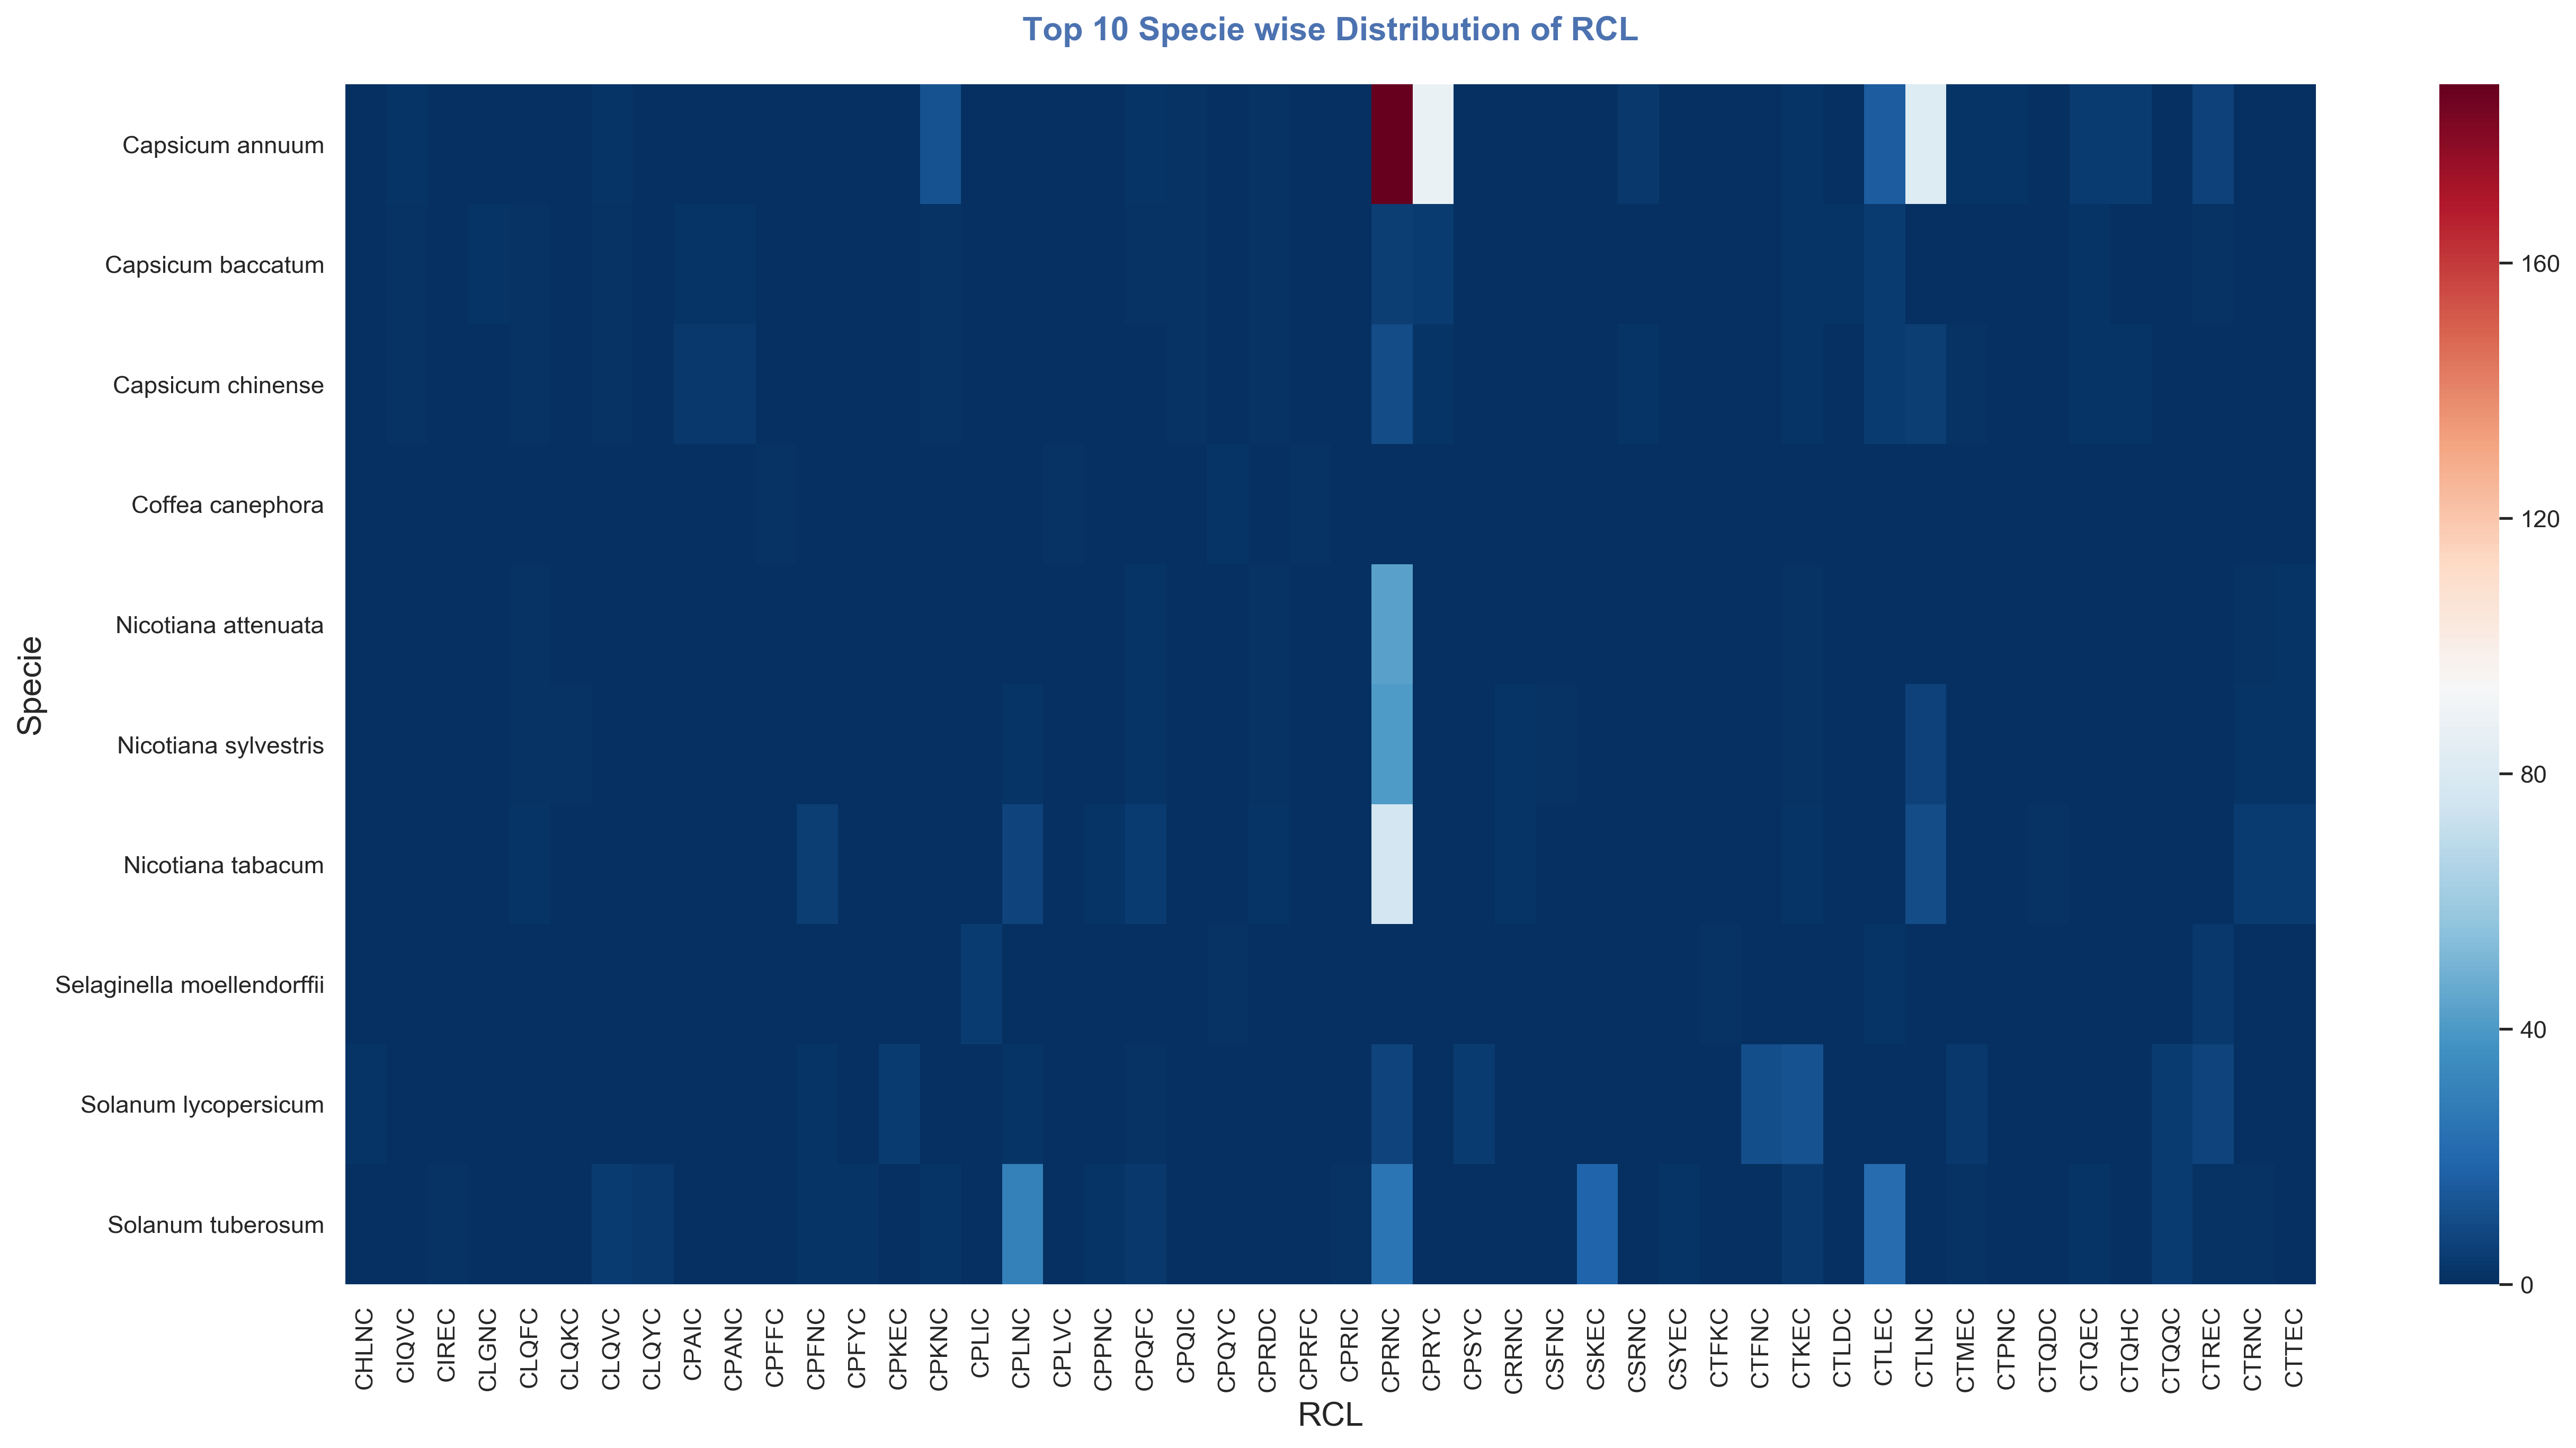

In [68]:
plt.figure(figsize=(20,10),dpi=300)
plt.title('Top 10 Specie wise Distribution of RCL',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})

sns.heatmap(specieTop10_rcl_pivot,cmap='RdBu_r')

### (3.4) Genus wise distribution of RCL

In [3]:
# To find which RCLs are found in a particular Genus and its number of Occurrences. This information can be retreived 
# finding RCL Frequency in Genus using Tables Sequence_Domains,Taxonomy and Domains.

In [19]:
seq_rcl.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'RclID', 'RCL'], dtype='object')

In [20]:
genus_rcl=seq_rcl[['Genus', 'RclID', 'RCL']]

In [22]:
genus_rcl.count()

Genus    1298
RclID    1295
RCL      1295
dtype: int64

In [142]:
#genus_rcl.groupby('Genus').RCL.value_counts()

In [26]:
#genus_rcl.groupby('Genus').RCL.value_counts().to_csv('Website/G3(3)_RCL_OccurrencesIn_Genus.csv')

In [29]:
genus_rcl=pd.read_csv('Website/G3(3)_RCL_OccurrencesIn_Genus.csv')

In [143]:
#genus_rcl

In [31]:
genus_rcl_pivot=pd.pivot_table(data=genus_rcl,index='Genus',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

In [144]:
#genus_rcl_pivot

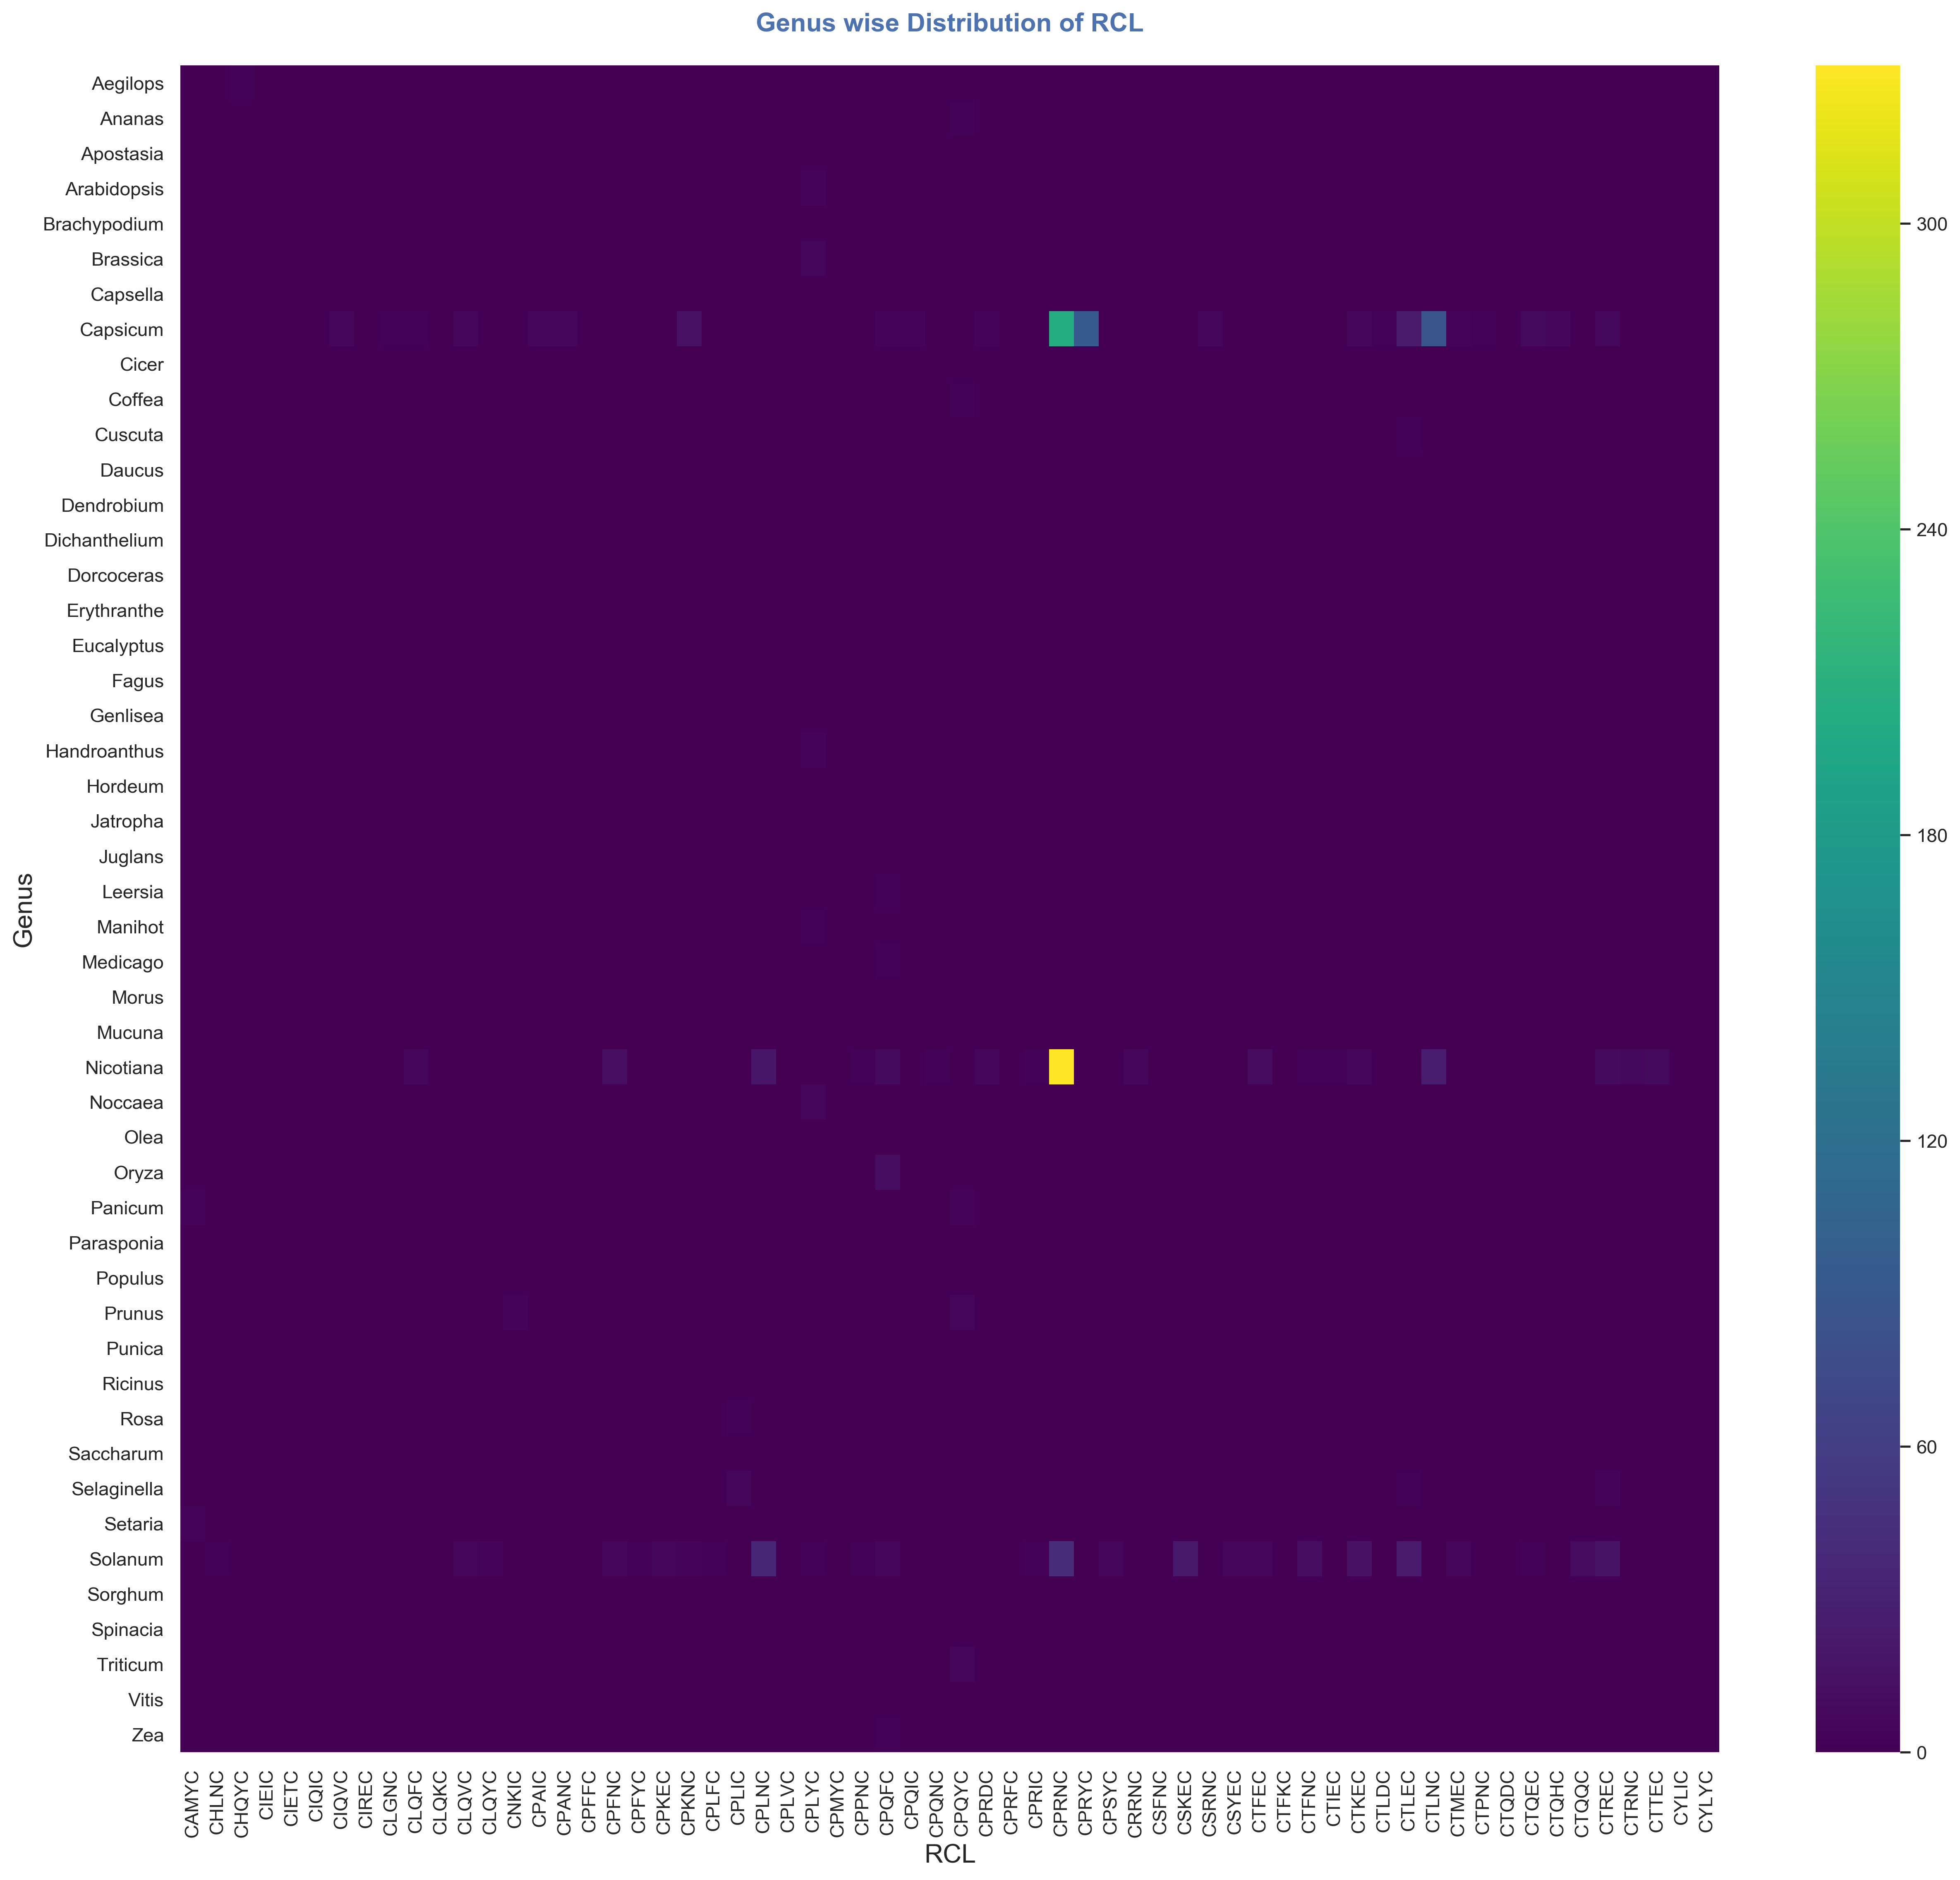

In [33]:
plt.figure(figsize=(20,18),dpi=300)
plt.title('Genus wise Distribution of RCL',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})

sns.heatmap(genus_rcl_pivot,cmap='viridis')

### (3.5) RCL distribution across Capsicum, Nicotiana, and Solanum

In [34]:
# Here we display the distribution of RCL across Capsicum, Nicotiana and Solanum Genus.This information can be retrieved 
# finding RCL Frequency in Genus using Tables Sequence_Domains,Taxonomy and Domains.

In [35]:
genus_rcl.Genus.unique()

array(['Aegilops', 'Ananas', 'Apostasia', 'Arabidopsis', 'Brachypodium',
       'Brassica', 'Capsella', 'Capsicum', 'Cicer', 'Coffea', 'Cuscuta',
       'Daucus', 'Dendrobium', 'Dichanthelium', 'Dorcoceras',
       'Erythranthe', 'Eucalyptus', 'Fagus', 'Genlisea', 'Handroanthus',
       'Hordeum', 'Jatropha', 'Juglans', 'Leersia', 'Manihot', 'Medicago',
       'Morus', 'Mucuna', 'Nicotiana', 'Noccaea', 'Olea', 'Oryza',
       'Panicum', 'Parasponia', 'Populus', 'Prunus', 'Punica', 'Ricinus',
       'Rosa', 'Saccharum', 'Selaginella', 'Setaria', 'Solanum',
       'Sorghum', 'Spinacia', 'Triticum', 'Vitis', 'Zea'], dtype=object)

In [36]:
genus_rcl_selected=genus_rcl.loc[genus_rcl.Genus.isin(['Capsicum','Nicotiana','Solanum']),:]

In [145]:
#genus_rcl_selected

In [38]:
genus_rcl_selected_pivot=pd.pivot_table(data=genus_rcl_selected,index='Genus',columns='RCL',values='Occurrences',aggfunc=sum,fill_value=0)

In [39]:
genus_rcl_selected_pivot

RCL        CHLNC  CIQVC  CIREC  CLGNC  CLQFC  CLQKC  CLQVC  CLQYC  CPAIC  \
Genus                                                                      
Capsicum       0      4      0      2      2      0      4      0      5   
Nicotiana      0      0      0      0      4      1      0      0      0   
Solanum        2      0      1      0      0      0      4      3      0   

RCL        CPANC  CPFNC  CPFYC  CPKEC  CPKNC  CPLFC  CPLNC  CPLYC  CPPNC  \
Genus                                                                      
Capsicum       5      0      0      0     14      0      0      0      0   
Nicotiana      0     12      0      0      0      0     19      0      2   
Solanum        0      4      2      4      3      2     36      2      2   

RCL        CPQFC  CPQIC  CPQNC  CPRDC  CPRIC  CPRNC  CPRYC  CPSYC  CRRNC  \
Genus                                                                      
Capsicum       3      3      0      3      0    203     94      0      0   
Nicotiana      8      0      2      4      2    331      0      0      4   
Solanum        4      0      0      0      2     41      0      4      0   

RCL        CSFNC  CSKEC  CSRNC  CSYEC  CTFEC  CTFNC  CTIEC  CTKEC  CTLDC  \
Genus                                                                      
Capsicum       0      0      5      0      0      0      0      6      2   
Nicotiana      1      0      0      0     10      2      2      4      0   
Solanum        0     21      0      4      4     11      0     15      0   

RCL        CTLEC  CTLNC  CTMEC  CTPNC  CTQDC  CTQEC  CTQHC  CTQQC  CTREC  \
Genus                                                                      
Capsicum      24     86      3      2      0      8      6      0      7   
Nicotiana      0     27      0      0      1      0      0      0      8   
Solanum       24      0      4      0      0      2      0     10     16   

RCL        CTRNC  CTTEC  
Genus                    
Capsicum       0      0  
Nicotiana      7      8  
Solanum        1      0

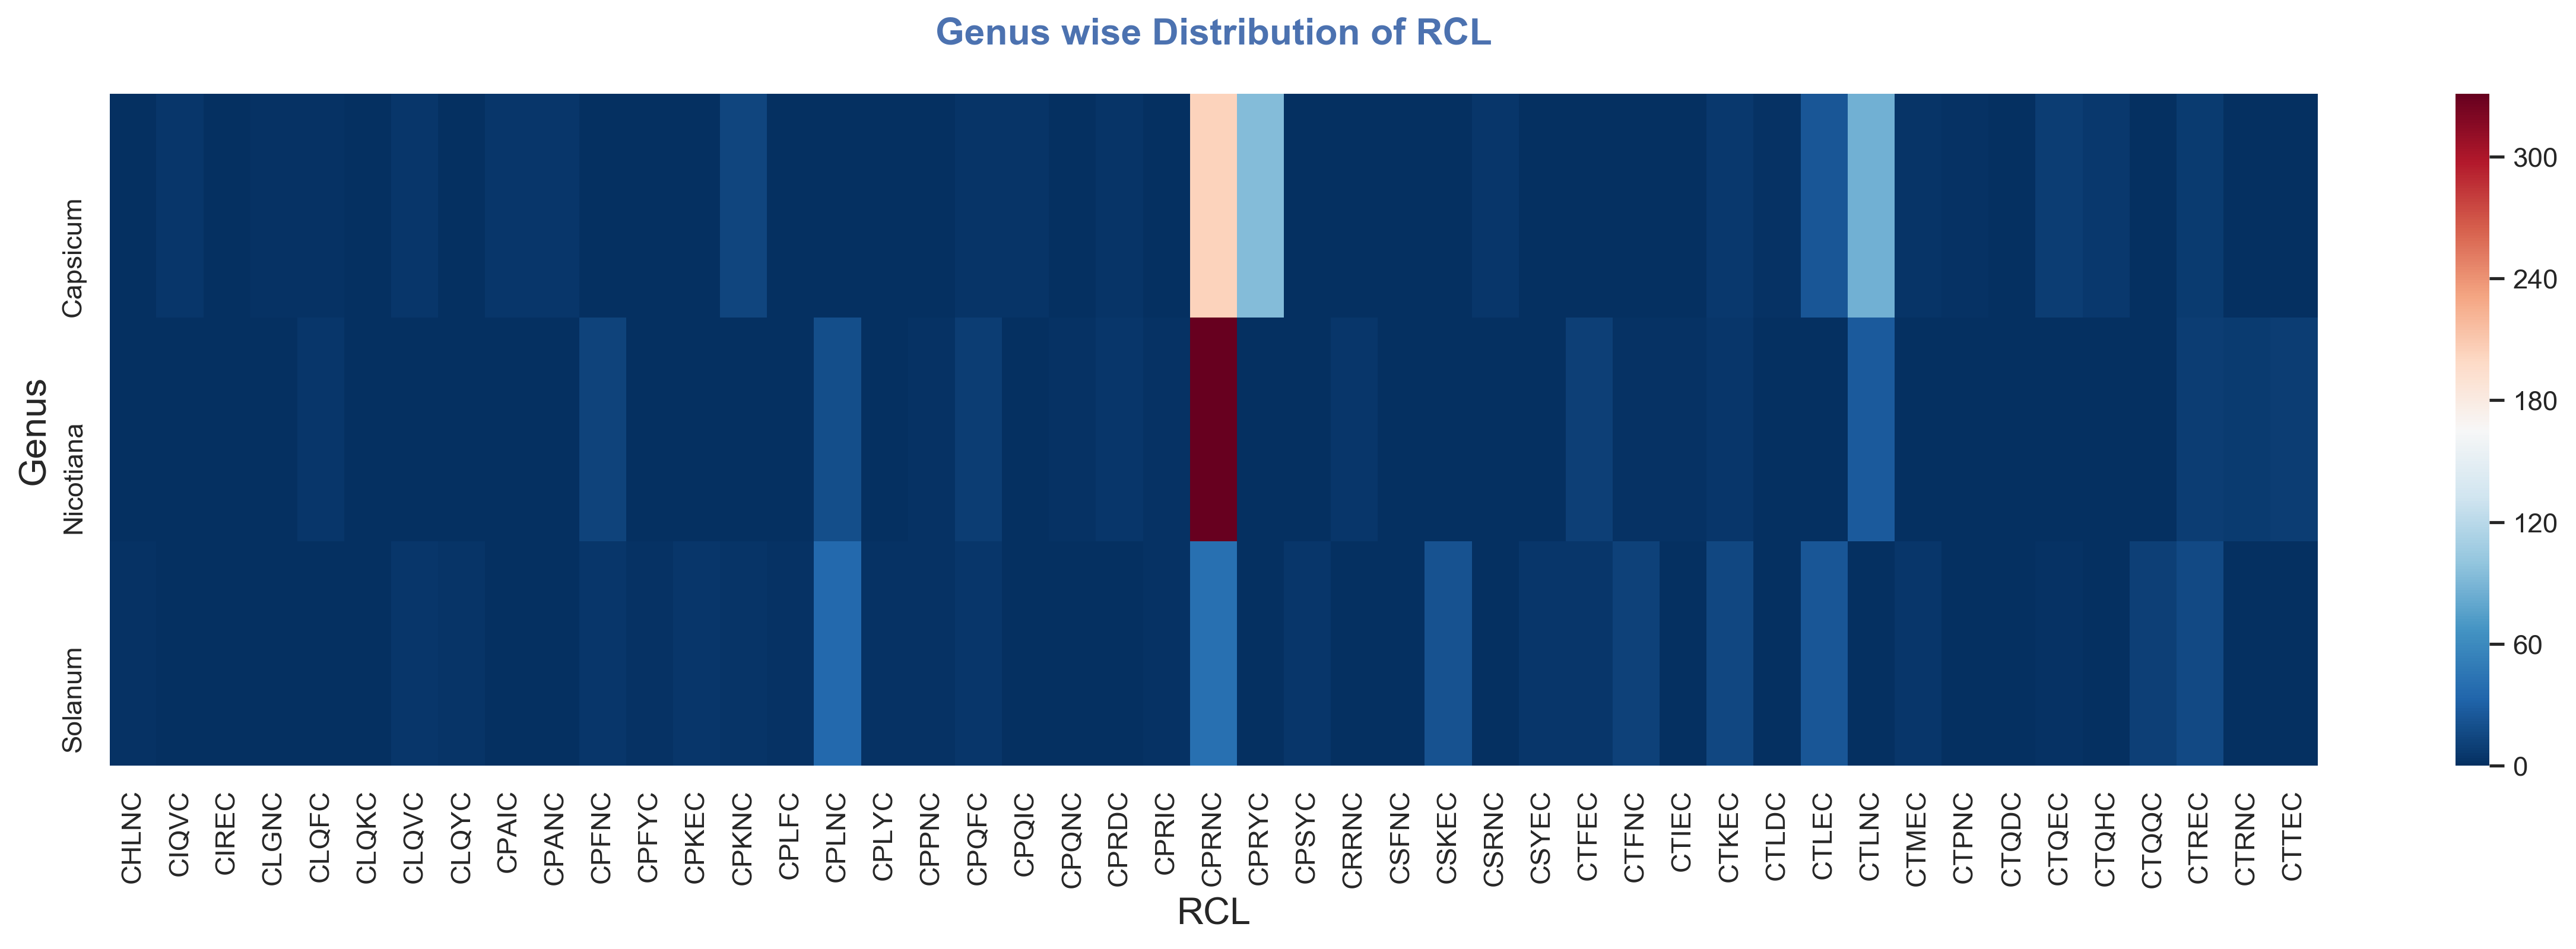

In [40]:
plt.figure(figsize=(20,5),dpi=300)
plt.title('Genus wise Distribution of RCL',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})

sns.heatmap(genus_rcl_selected_pivot,cmap='RdBu_r')

### (3.6) Domains distribution across Top10 RCL

In [70]:
# This anlaysis shows the number of Domains in which a RCL is found. This information can be retrieved 
# finding RCL Frequency in Domains table.

In [71]:
domains=pd.read_csv('6_Domain_RCL.csv')

In [73]:
domains.id.count()

698

In [74]:
domains.columns

Index(['id', 'domainID', 'domain', 'variant', 'RclID', 'RCL', 'targetProtease',
       'tpID', 'S_position', 'E_position'],
      dtype='object')

In [76]:
domains.RCL.value_counts().head(10)

CPRNC    291
CTLNC     36
CPLNC     35
CTLEC     25
CPQFC     23
CPLYC     23
CTKEC     20
CPQYC     19
CTREC     19
CPRYC     18
Name: RCL, dtype: int64

In [78]:
#domains.RCL.value_counts().to_csv('Website/G3(6)_RCL_FrequencyIn_Domains.csv')## RCL Frequency in Domains

In [79]:
rcl_dom_freq=pd.read_csv('Website/G3(6)_RCL_FrequencyIn_Domains.csv')

In [80]:
rcl_dom_freq.head(10)

RCL  Domain Count
0  CPRNC           291
1  CTLNC            36
2  CPLNC            35
3  CTLEC            25
4  CPQFC            23
5  CPLYC            23
6  CTKEC            20
7  CPQYC            19
8  CTREC            19
9  CPRYC            18

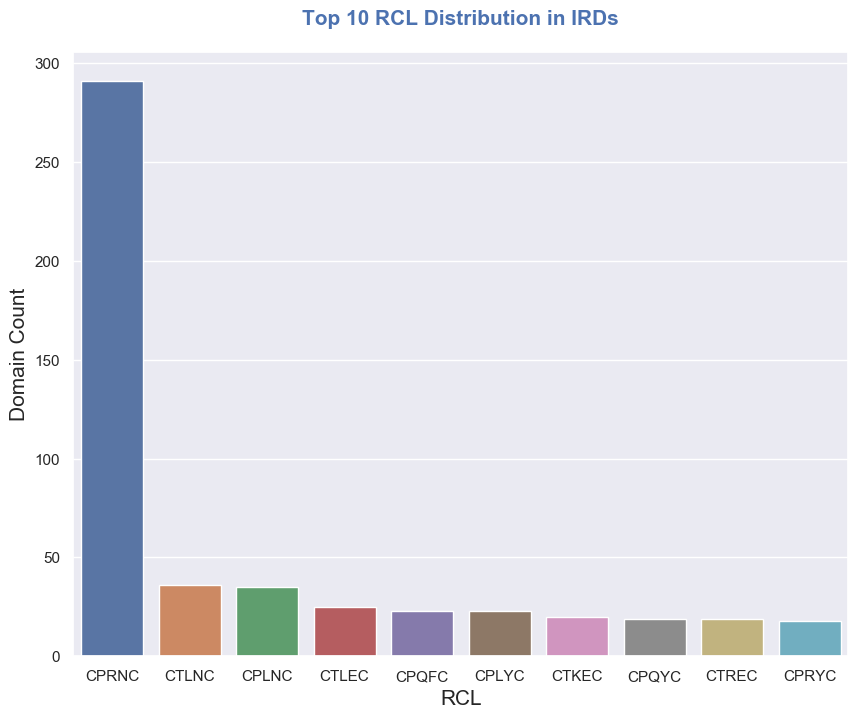

In [82]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Top 10 RCL Distribution in IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('RCL',fontdict={'fontsize':15})
plt.ylabel('Domain Count',fontdict={'fontsize':15})
sns.barplot(x='RCL',y='Domain Count',data=rcl_dom_freq.head(10))
#g.legend_.remove()

### (3.7) Distribution of AA at P1, P2, and P1` position in PIN-II PI database.

In [83]:
# Here we find the number of times an Amino Acid has appeared at P1, P2 and P1` position in PIN-II PI database. P1, P2 and P1`
# are determined from the RCL sequence. As such this information can be retreived by combining the tables sequence_domains,
# Domains and RCL. We need to find the value counts of Amino Acids at each position and combine them.

In [84]:
seq_domain_rcl_linker.UniprotID.count()

1298

In [85]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [86]:
seq_domain_rcl_linker.P1Residue.value_counts()

R    734
L    269
Q    121
K     71
F     48
M     14
A     10
T      8
P      6
Y      4
S      4
I      2
E      2
G      2
Name: P1Residue, dtype: int64

In [87]:
seq_domain_rcl_linker.P2Residue.value_counts()

P    906
T    310
S     31
L     20
I      8
A      6
H      5
R      4
N      3
Y      2
Name: P2Residue, dtype: int64

In [88]:
seq_domain_rcl_linker.P1primeResidue.value_counts()

N    825
E    184
Y    169
F     47
I     27
V     14
D     10
Q     10
H      6
K      2
T      1
Name: P1primeResidue, dtype: int64

In [89]:
## Combine these three results to form a Residues Distribution table: G3(7)_Residues_distribution.csv

In [90]:
residue_distribution=pd.read_csv('Website/G3(7)_Residues_distribution.csv')

In [91]:
residue_distribution.head()

Amino Acids  P2 Residue  P1 Residue  P1` Residue
0           A           6          10            0
1           D           0           0           10
2           E           0           2          184
3           F           0          48           47
4           G           0           2            0

In [92]:
residue_distribution.set_index('Amino Acids',inplace=True)

In [93]:
residue_distribution.head()

P2 Residue  P1 Residue  P1` Residue
Amino Acids                                     
A                     6          10            0
D                     0           0           10
E                     0           2          184
F                     0          48           47
G                     0           2            0

In [94]:
residue_distribution.transpose()

Amino Acids   A   D    E   F  G  H   I   K    L   M    N    P    Q    R   S  \
P2 Residue    6   0    0   0  0  5   8   0   20   0    3  906    0    4  31   
P1 Residue   10   0    2  48  2  0   2  71  269  14    0    6  121  734   4   
P1` Residue   0  10  184  47  0  6  27   2    0   0  825    0   10    0   0   

Amino Acids    T   V    Y  
P2 Residue   310   0    2  
P1 Residue     8   0    4  
P1` Residue    1  14  169

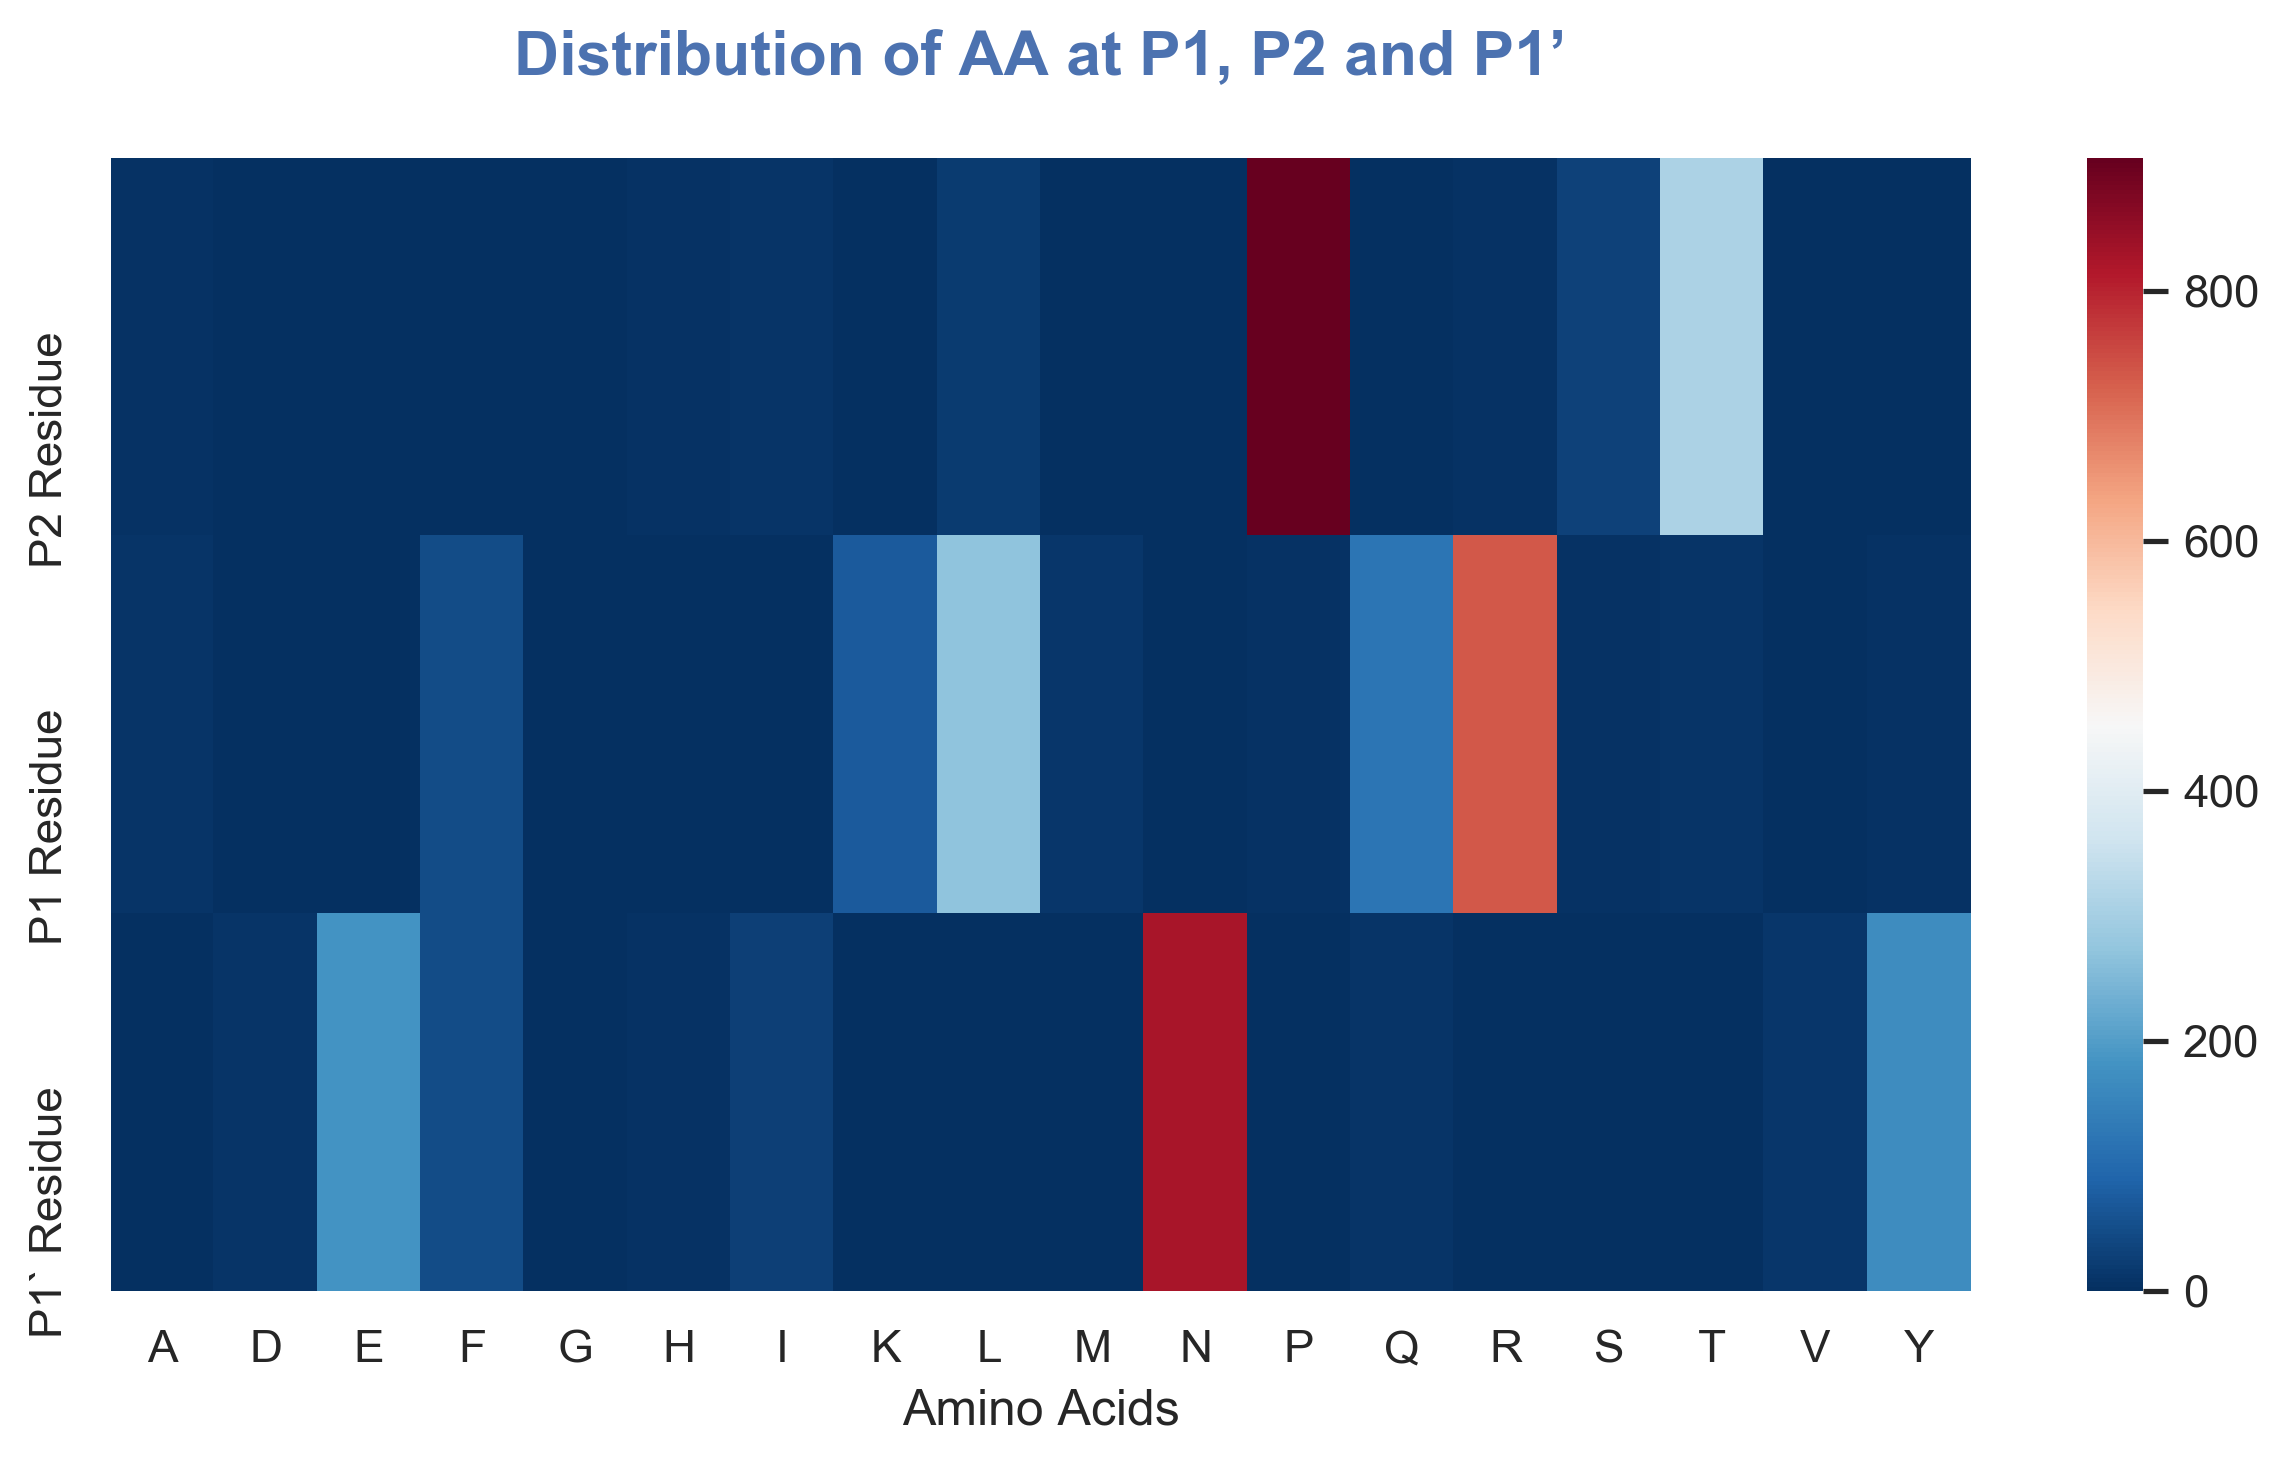

In [95]:
plt.figure(figsize=(10,5),dpi=300)
plt.title('Distribution of AA at P1, P2 and P1’',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Amino Acids',fontdict={'fontsize':12})
plt.ylabel('Residues',fontdict={'fontsize':12})

sns.heatmap(residue_distribution.transpose(),cmap='RdBu_r')

Text(0.5, 0, 'Residues')

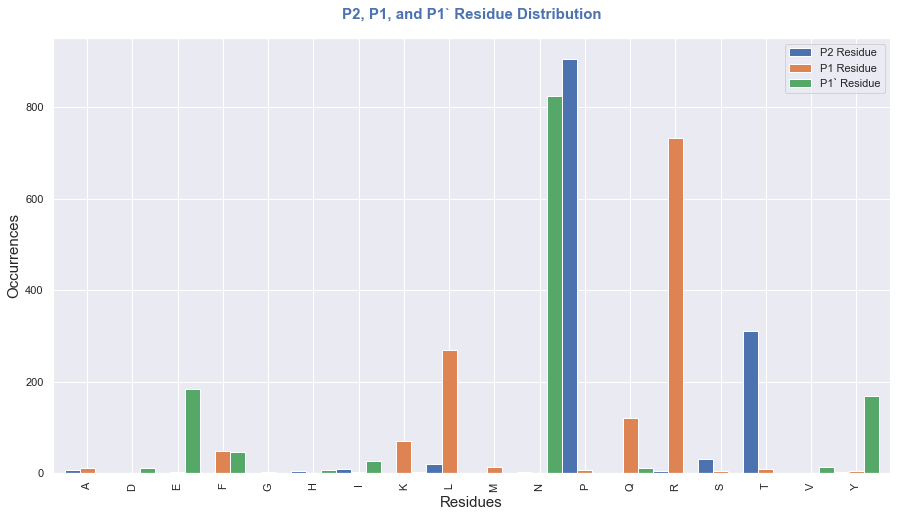

In [96]:
sns.set()
axes=residue_distribution.plot.bar(stacked=False,figsize=(15,8),width=1)
axes.set_title('P2, P1, and P1` Residue Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
axes.set_ylabel('Occurrences',fontdict={'fontsize':15})
axes.set_xlabel('Residues',fontdict={'fontsize':15})

## (4) Linker Data Analysis

In [97]:
# Here we perform different data analysis related to Linkers

### (4.1) Linker Distribution

In [98]:
# This anlaysis shows the number of times a Linker has been found in the PIN-II PI database. This information can be retreived 
# finding Linker Frequency using Tables Sequence_Domains and Domains_Linkers.

In [99]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [150]:
seq_linker=seq_domain_rcl_linker[['UniprotID','OrganismID','Organism', 'Genus','DomainID','linkerID', 'Linker','LinkerType' ]]

In [146]:
#seq_linker.groupby('LinkerType').Linker.value_counts()## Linker Frequency in sequences

In [103]:
#seq_linker.groupby('LinkerType').Linker.value_counts().to_csv('Website/G4(1)_linker_seq_freq.csv')

In [105]:
linker_seq_freq=pd.read_csv('Website/G4(1)_linker_seq_freq.csv')

In [147]:
#linker_seq_freq

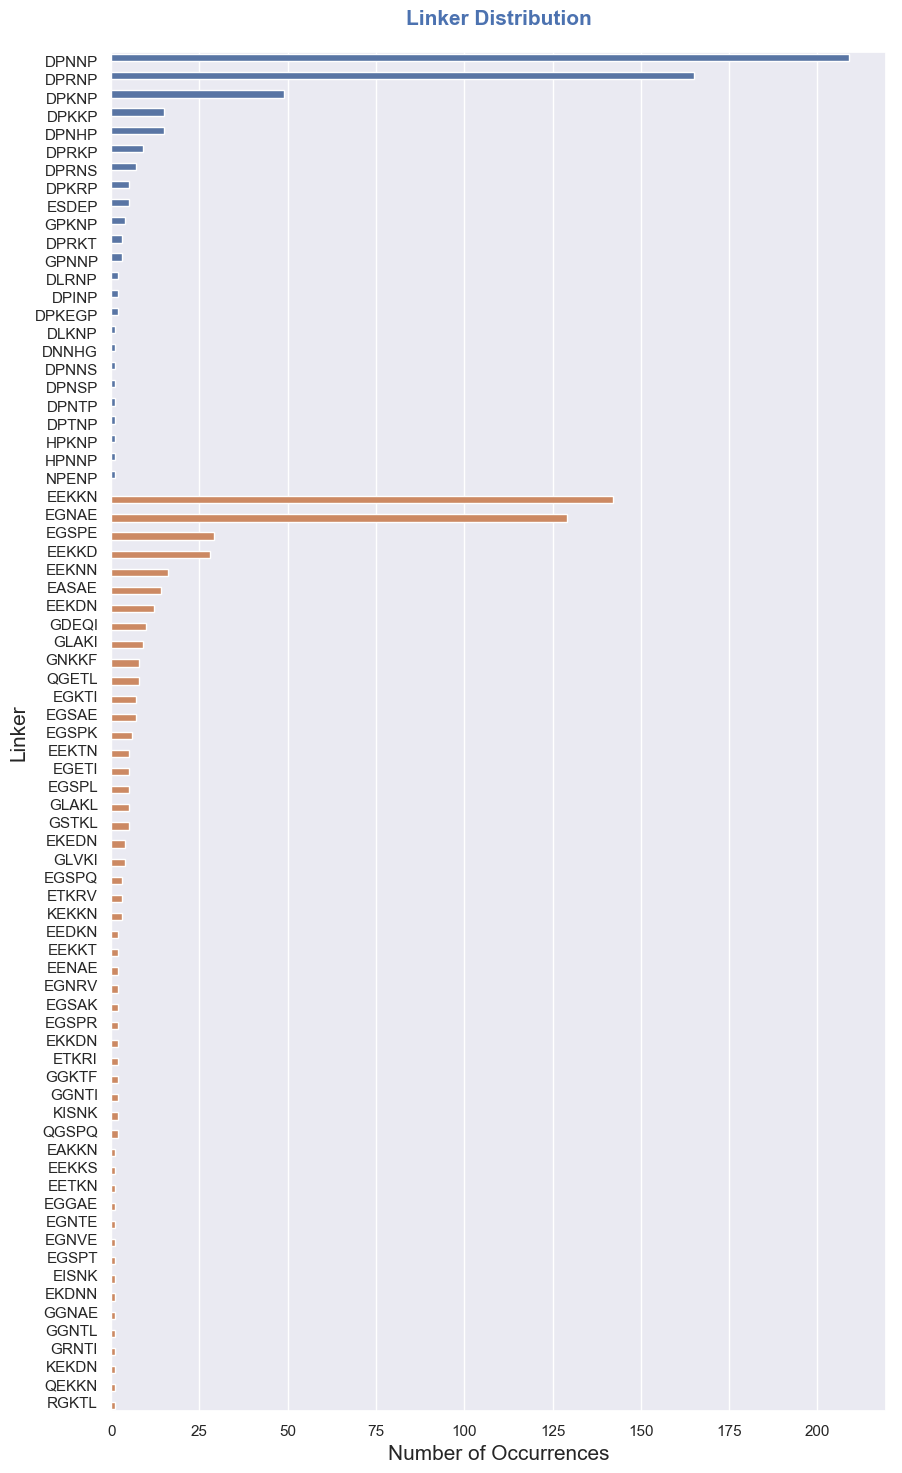

In [107]:
plt.figure(figsize=(10,18),dpi=100)
plt.title('Linker Distribution',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Number of Occurrences',fontdict={'fontsize':15})
plt.ylabel('Linker',fontdict={'fontsize':15})
g=sns.barplot(x='Number of Occurrences',y='Linker',hue='Linker Type',data=linker_seq_freq)
g.legend_.remove()

### (4.2) Type-I Linker Distribution

In [108]:
linker_freq_Type1=linker_seq_freq.loc[linker_seq_freq['Linker Type']==1,:]

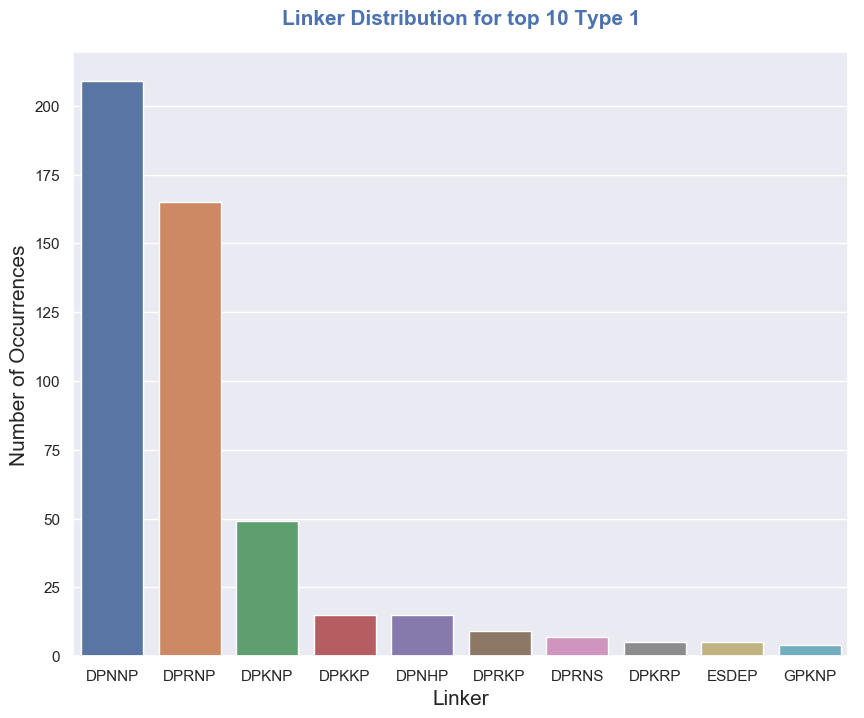

In [109]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Linker Distribution for top 10 Type 1',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Linker',fontdict={'fontsize':15})
plt.ylabel('Number of Occurrences',fontdict={'fontsize':15})
g=sns.barplot(x='Linker',y='Number of Occurrences',data=linker_freq_Type1.head(10))
#g.legend_.remove()

### (4.3) Type- II Linker Distribution

In [110]:
linker_freq_Type2=linker_seq_freq.loc[linker_seq_freq['Linker Type']==2,:]

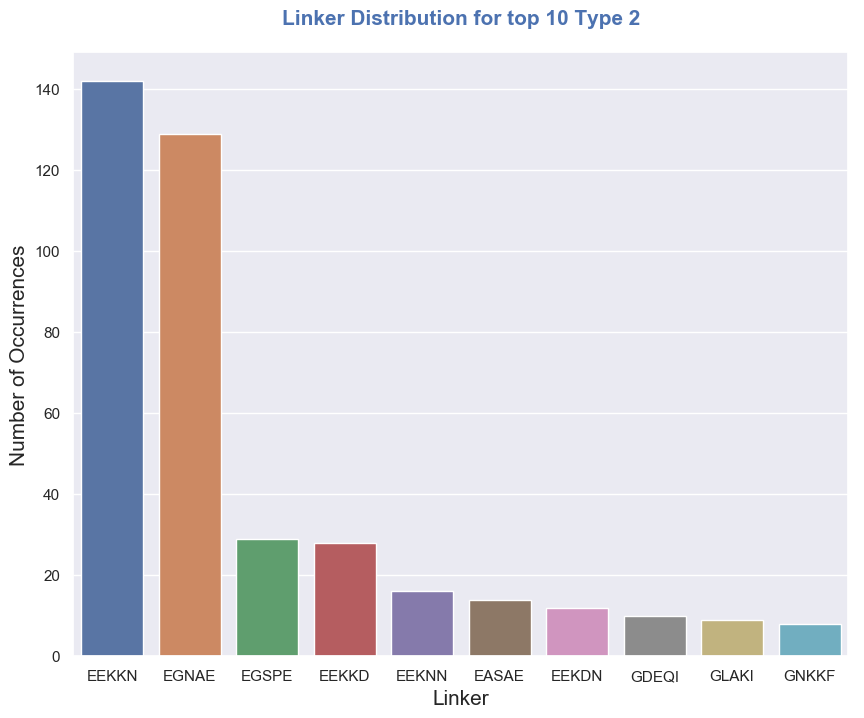

In [111]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Linker Distribution for top 10 Type 2',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Linker',fontdict={'fontsize':15})
plt.ylabel('Number of Occurrences',fontdict={'fontsize':15})
g=sns.barplot(x='Linker',y='Number of Occurrences',data=linker_freq_Type2.head(10))
#g.legend_.remove()

### (4.4) Specie wise distribution of Linkers

In [112]:
# To find which RCLs are found in a particular specie and its number of Occurrences. This information can be retreived 
# finding RCL Frequency in species using Tables Sequence_Domains,Taxonomy and Domains.

In [118]:
seq_linker.head()

UniprotID  OrganismID DomainID linkerID Linker  LinkerType
0    P05119        4081   IRD-62     L-21  DPKRP         1.0
1    P05119        4081  IRD-405      NaN    NaN         NaN
2    P05119        4081  IRD-456     L-48  EGSPL         2.0
3    P84813        4113   IRD-54     L-13  DPKKP         1.0
4    P01080        4113   IRD-56     L-13  DPKKP         1.0

In [119]:
seq_linker.UniprotID.count()

1298

In [120]:
org_linker=seq_linker[['OrganismID','linkerID','Linker']]

In [148]:
#taxon_species

In [123]:
species_linker=pd.merge(org_linker,taxon_species,left_on='OrganismID',right_on='Taxon',how='left')

In [149]:
#species_linker

In [125]:
species_linker=species_linker[['OrganismID','Scientific name','linkerID','Linker']]

In [150]:
#species_linker

In [151]:
#species_linker.groupby('Scientific name').Linker.value_counts()

In [129]:
#species_linker.groupby('Scientific name').Linker.value_counts().to_csv('Website/G4(4)_Linker_OccurrencesIn_Specie.csv')

In [132]:
specie_linker=pd.read_csv('Website/G4(4)_Linker_OccurrencesIn_Specie.csv')

In [152]:
#specie_linker

In [134]:
specie_linker_pivot=pd.pivot_table(data=specie_linker,index='Specie',columns='Linker',values='Occurrences',aggfunc=sum,fill_value=0)

In [153]:
#specie_linker_pivot

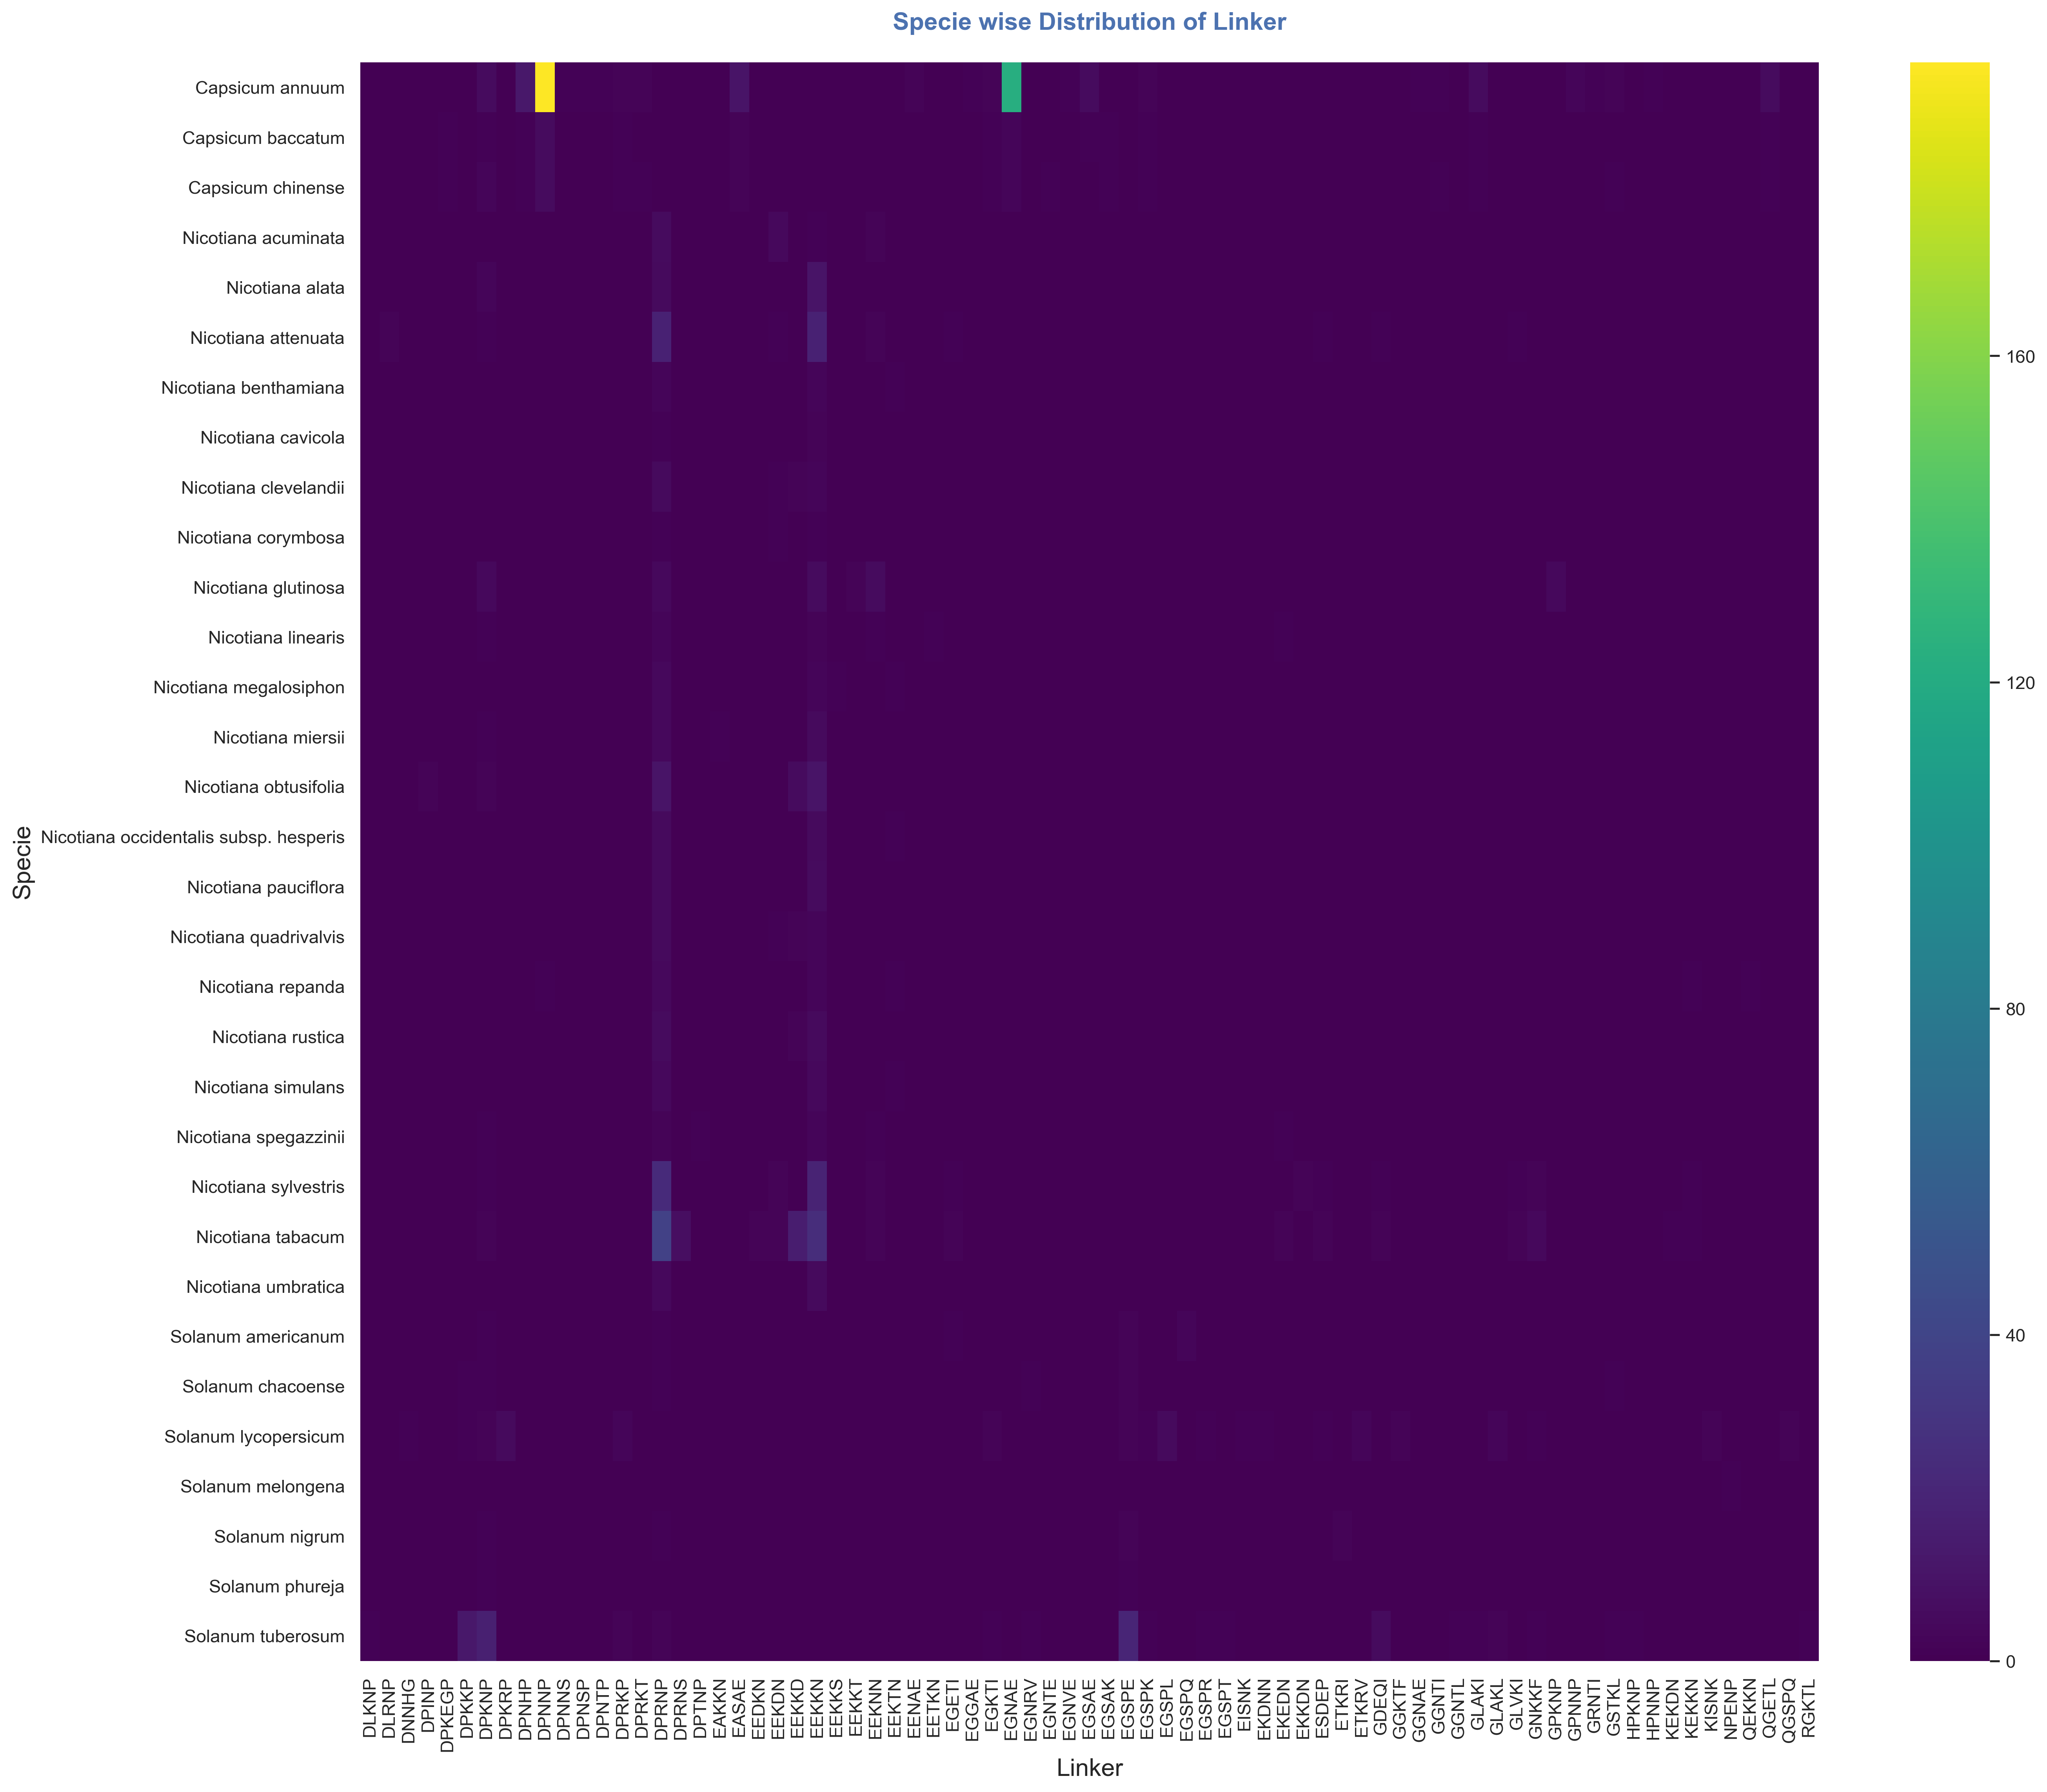

In [136]:
plt.figure(figsize=(20,18),dpi=300)
plt.title('Specie wise Distribution of Linker',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Linker',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})
sns.heatmap(specie_linker_pivot,cmap='viridis')

### (4.5) Specie wise distribution of Linker in Top 10 Species.

In [137]:
# To find which Linkers are found in Top 10 species and its number of Occurrences. This information can be retreived 
# finding Linker Frequency in species using Tables Sequence_Domains,Taxonomy and Domains. Top 10 species are determined by
# Species Distribution i.e. to which species maximum number of PIs belong to. 

In [138]:
top10Species

16                Capsicum annuum
100             Solanum tuberosum
63              Nicotiana tabacum
96           Solanum lycopersicum
18              Capsicum chinense
17              Capsicum baccatum
45            Nicotiana attenuata
62           Nicotiana sylvestris
91     Selaginella moellendorffii
20               Coffea canephora
Name: Specie, dtype: object

In [154]:
#specie_linker

In [141]:
specie_linker_top10=specie_linker.loc[specie_linker.Specie.isin(top10Species),:]

In [142]:
specie_linker_top10.Specie.unique()

array(['Capsicum annuum', 'Capsicum baccatum', 'Capsicum chinense',
       'Nicotiana attenuata', 'Nicotiana sylvestris', 'Nicotiana tabacum',
       'Solanum lycopersicum', 'Solanum tuberosum'], dtype=object)

In [143]:
specieTop10_linker_pivot=pd.pivot_table(data=specie_linker_top10,index='Specie',columns='Linker',values='Occurrences',aggfunc=sum,fill_value=0)

In [144]:
specieTop10_linker_pivot

Linker                DLKNP  DLRNP  DNNHG  DPKEGP  DPKKP  DPKNP  DPKRP  DPNHP  \
Specie                                                                          
Capsicum annuum           0      0      0       0      0      6      0     13   
Capsicum baccatum         0      0      0       1      0      1      0      1   
Capsicum chinense         0      0      0       1      0      3      0      1   
Nicotiana attenuata       0      2      0       0      0      1      0      0   
Nicotiana sylvestris      0      0      0       0      0      1      0      0   
Nicotiana tabacum         0      0      0       0      0      2      0      0   
Solanum lycopersicum      0      0      1       0      1      2      5      0   
Solanum tuberosum         1      0      0       0     13     17      0      0   

Linker                DPNNP  DPNNS  DPNSP  DPNTP  DPRKP  DPRKT  DPRNP  DPRNS  \
Specie                                                                         
Capsicum annuum         196      1      1      1      2      2      0      0   
Capsicum baccatum         6      0      0      0      1      0      0      0   
Capsicum chinense         6      0      0      0      1      1      0      0   
Nicotiana attenuata       0      0      0      0      0      0     18      0   
Nicotiana sylvestris      0      0      0      0      0      0     23      0   
Nicotiana tabacum         0      0      0      0      0      0     38      7   
Solanum lycopersicum      0      0      0      0      3      0      0      0   
Solanum tuberosum         0      0      0      0      2      0      2      0   

Linker                EASAE  EEDKN  EEKDN  EEKKD  EEKKN  EEKNN  EENAE  EGETI  \
Specie                                                                         
Capsicum annuum          10      0      0      0      0      0      2      0   
Capsicum baccatum         2      0      0      0      0      0      0      0   
Capsicum chinense         2      0      0      0      0      0      0      0   
Nicotiana attenuata       0      0      1      0     18      2      0      1   
Nicotiana sylvestris      0      0      2      0     19      2      0      1   
Nicotiana tabacum         0      2      2     16     25      2      0      2   
Solanum lycopersicum      0      0      0      0      0      0      0      0   
Solanum tuberosum         0      0      0      0      0      0      0      0   

Linker                EGGAE  EGKTI  EGNAE  EGNRV  EGNTE  EGNVE  EGSAE  EGSAK  \
Specie                                                                         
Capsicum annuum           1      2    123      0      0      1      6      0   
Capsicum baccatum         0      1      3      0      0      0      1      1   
Capsicum chinense         0      1      3      0      1      0      0      1   
Nicotiana attenuata       0      0      0      0      0      0      0      0   
Nicotiana sylvestris      0      0      0      0      0      0      0      0   
Nicotiana tabacum         0      0      0      0      0      0      0      0   
Solanum lycopersicum      0      2      0      0      0      0      0      0   
Solanum tuberosum         0      1      0      1      0      0      0      0   

Linker                EGSPE  EGSPK  EGSPL  EGSPR  EGSPT  EISNK  EKDNN  EKEDN  \
Specie                                                                         
Capsicum annuum           0      2      0      0      0      0      0      0   
Capsicum baccatum         0      1      0      0      0      0      0      0   
Capsicum chinense         0      1      0      0      0      0      0      0   
Nicotiana attenuata       0      0      0      0      0      0      0      0   
Nicotiana sylvestris      0      0      0      0      0      0      0      0   
Nicotiana tabacum         0      0      0      0      0      0      0      2   
Solanum lycopersicum      2      1      5      1      0      1      1      0   
Solanum tuberosum        20      1      0      1      1      0    

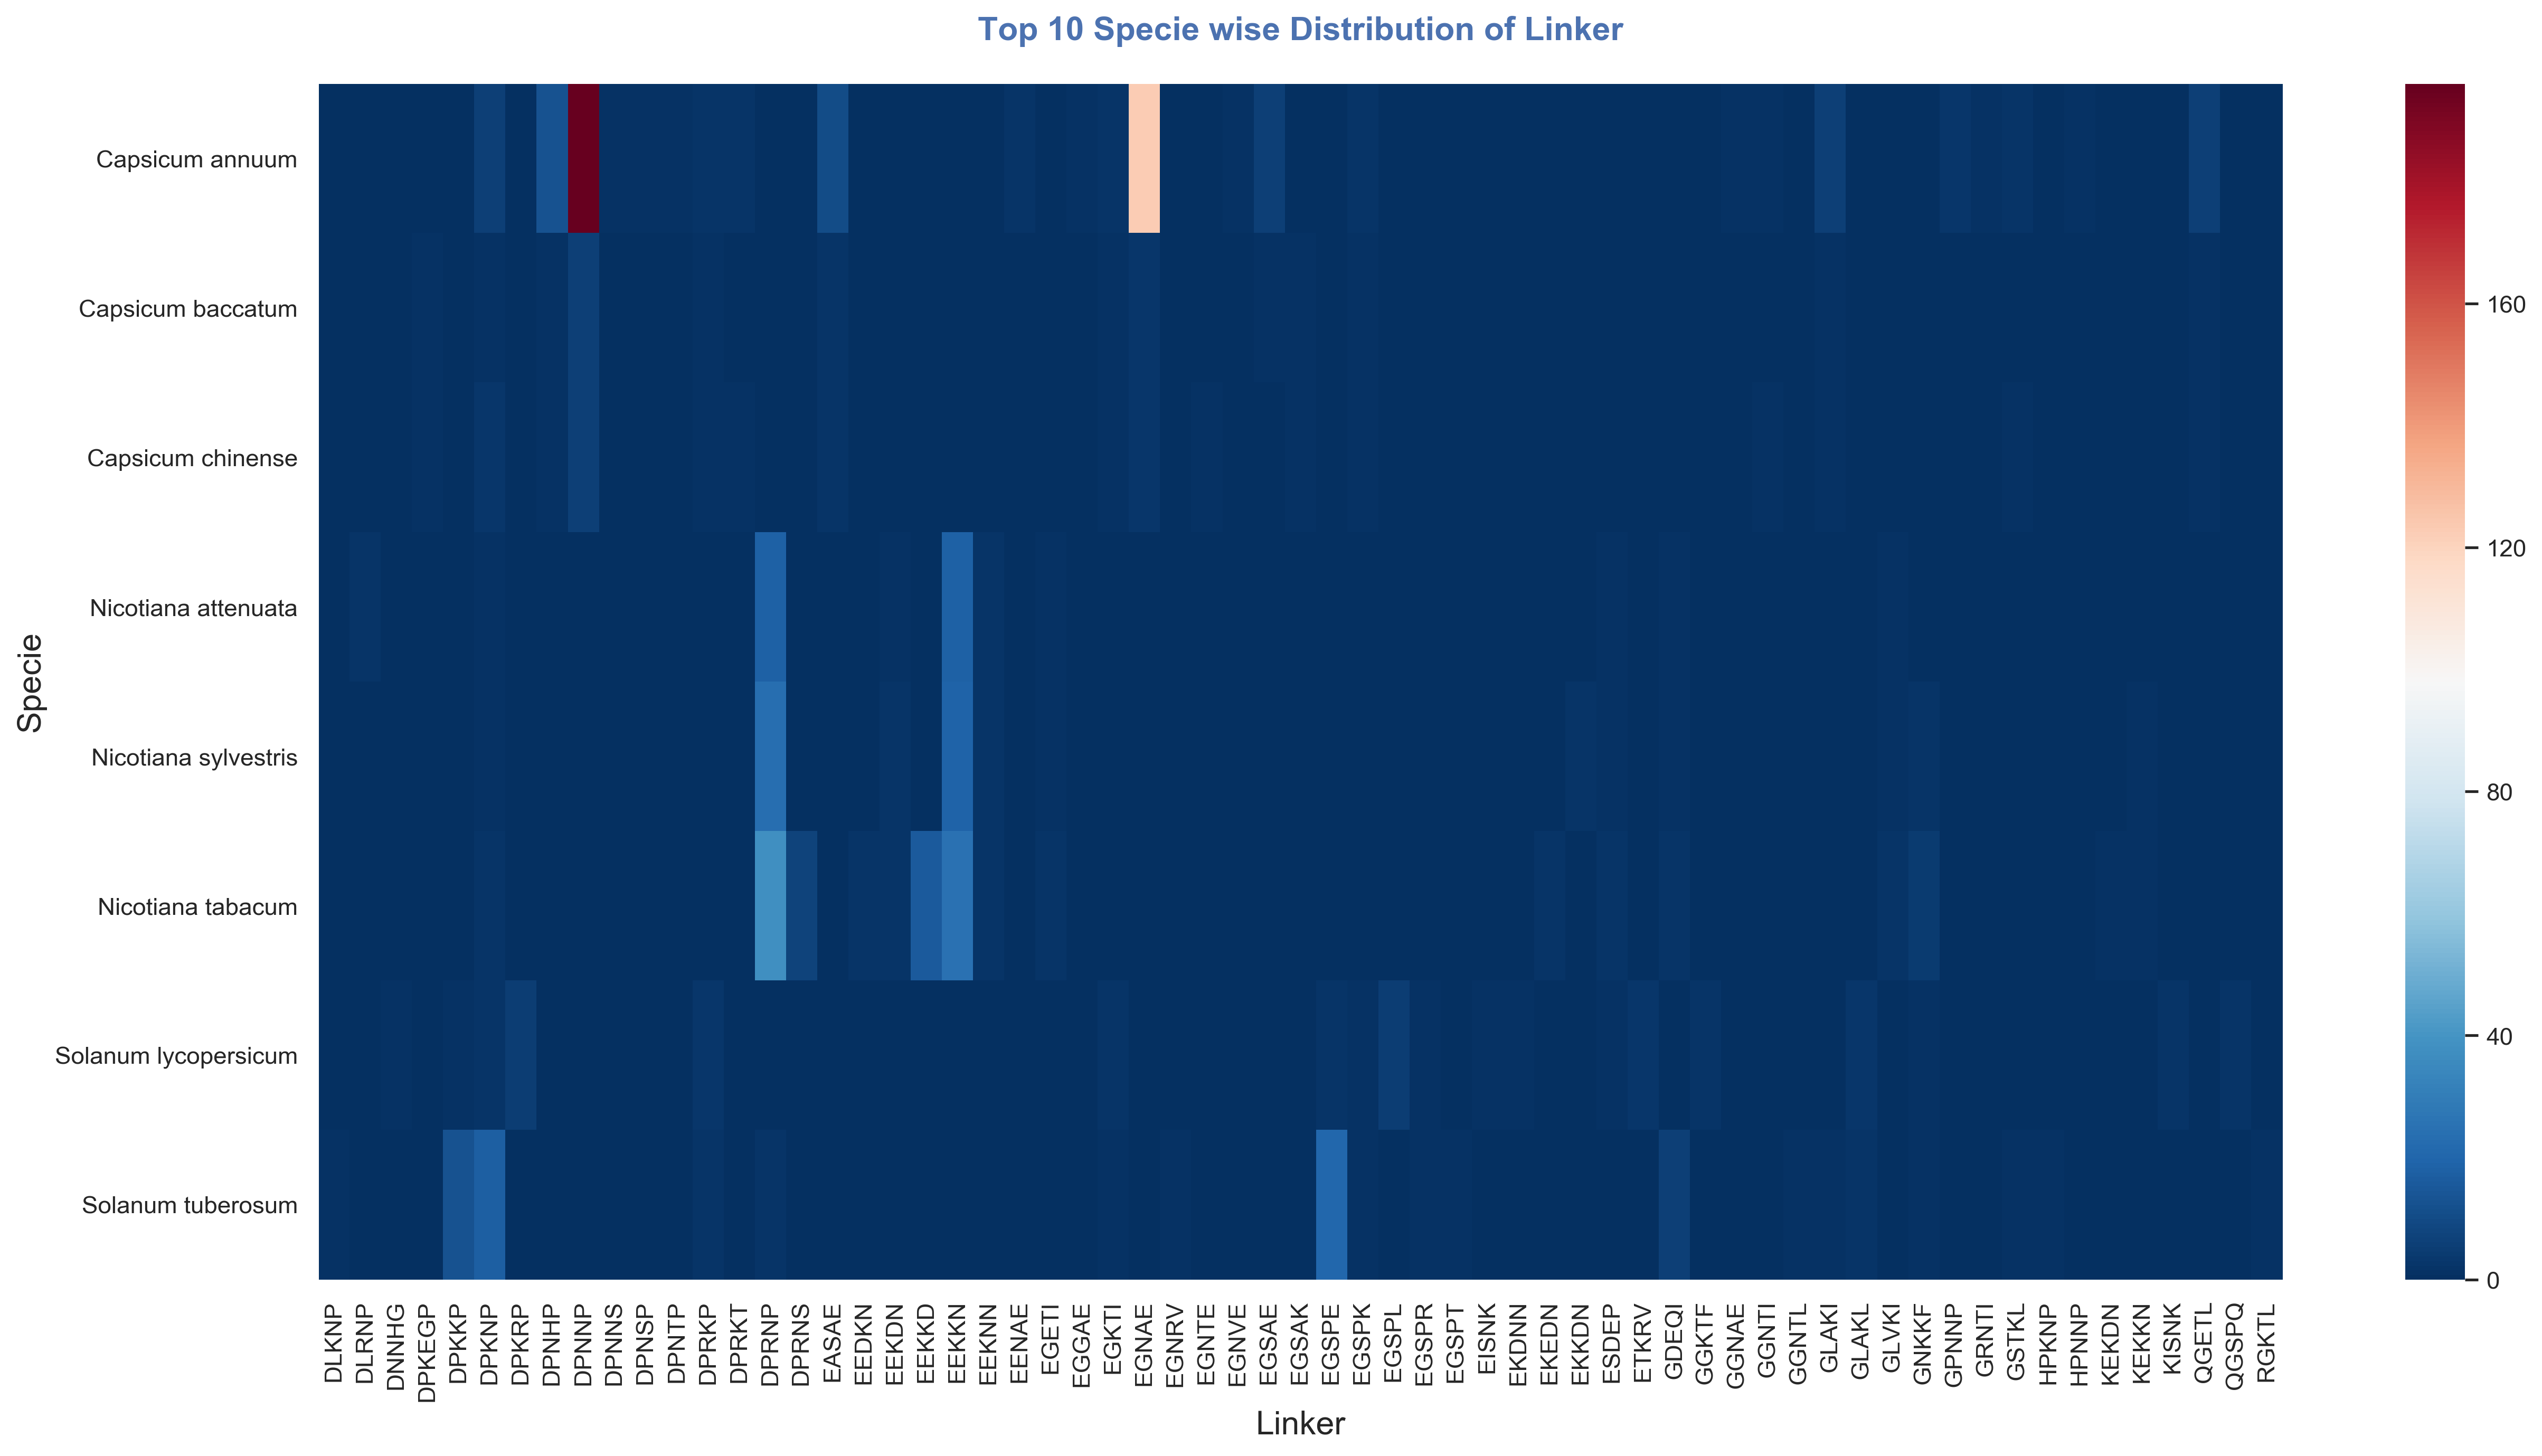

In [145]:
plt.figure(figsize=(20,10),dpi=300)
plt.title('Top 10 Specie wise Distribution of Linker',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Linker',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})
sns.heatmap(specieTop10_linker_pivot,cmap='RdBu_r')

### (4.6) Genus wise distribution of Linker

In [146]:
# To find which Linkers are found in a particular Genus and its number of Occurrences. This information can be retreived 
# finding Linker Frequency in Genus using Tables Sequence_Domains,Taxonomy and Domains_Linker.

In [151]:
seq_linker.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'DomainID', 'linkerID',
       'Linker', 'LinkerType'],
      dtype='object')

In [152]:
genus_linker=seq_linker[['Genus', 'linkerID', 'Linker']]

In [153]:
genus_linker.count()

Genus       1298
linkerID    1010
Linker      1010
dtype: int64

In [155]:
#genus_linker.groupby('Genus').Linker.value_counts()

In [156]:
#genus_linker.groupby('Genus').Linker.value_counts().to_csv('Website/G4(6)_Linker_OccurrencesIn_Genus.csv')

In [157]:
genus_linker=pd.read_csv('Website/G4(6)_Linker_OccurrencesIn_Genus.csv')

In [156]:
#genus_linker

In [159]:
genus_linker_pivot=pd.pivot_table(data=genus_linker,index='Genus',columns='Linker',values='Occurrences',aggfunc=sum,fill_value=0)

In [160]:
genus_linker_pivot

Linker     DLKNP  DLRNP  DNNHG  DPINP  DPKEGP  DPKKP  DPKNP  DPKRP  DPNHP  \
Genus                                                                       
Capsicum       0      0      0      0       2      0     10      0     15   
Nicotiana      0      2      0      2       0      0     16      0      0   
Solanum        1      0      1      0       0     15     23      5      0   

Linker     DPNNP  DPNNS  DPNSP  DPNTP  DPRKP  DPRKT  DPRNP  DPRNS  DPTNP  \
Genus                                                                      
Capsicum     208      1      1      1      4      3      0      0      0   
Nicotiana      1      0      0      0      0      0    160      7      1   
Solanum        0      0      0      0      5      0      5      0      0   

Linker     EAKKN  EASAE  EEDKN  EEKDN  EEKKD  EEKKN  EEKKS  EEKKT  EEKNN  \
Genus                                                                      
Capsicum       0     14      0      0      0      0      0      0      0   
Nicotiana      1      0      2     12     28    142      1      2     16   
Solanum        0      0      0      0      0      0      0      0      0   

Linker     EEKTN  EENAE  EETKN  EGETI  EGGAE  EGKTI  EGNAE  EGNRV  EGNTE  \
Genus                                                                      
Capsicum       0      2      0      0      1      4    129      0      1   
Nicotiana      5      0      1      4      0      0      0      0      0   
Solanum        0      0      0      1      0      3      0      2      0   

Linker     EGNVE  EGSAE  EGSAK  EGSPE  EGSPK  EGSPL  EGSPQ  EGSPR  EGSPT  \
Genus                                                                      
Capsicum       1      7      2      0      4      0      0      0      0   
Nicotiana      0      0      0      0      0      0      0      0      0   
Solanum        0      0      0     29      2      5      3      2      1   

Linker     EISNK  EKDNN  EKEDN  EKKDN  ESDEP  ETKRI  ETKRV  GDEQI  GGKTF  \
Genus                                                                      
Capsicum       0      0      0      0      0      0      0      0      0   
Nicotiana      0      0      4      2      4      0      0      4      0   
Solanum        1      1      0      0      1      2      3      6      2   

Linker     GGNAE  GGNTI  GGNTL  GLAKI  GLAKL  GLVKI  GNKKF  GPKNP  GPNNP  \
Genus                                                                      
Capsicum       1      2      0      8      0      0      0      0      3   
Nicotiana      0      0      0      0      0      4      6      4      0   
Solanum        0      0      1      1      5      0      2      0      0   

Linker     GRNTI  GSTKL  HPKNP  HPNNP  KEKDN  KEKKN  KISNK  NPENP  QEKKN  \
Genus                                                                      
Capsicum       1      3      0      1      0      0      0      0      0   
Nicotiana      0      0      0      0      1      3      0      0      1   
Solanum        0      2      1      0      0      0      2      1      0   

Linker     QGETL  QGSPQ  RGKTL  
Genus                           
Capsicum       8      0      0  
Nicotiana      0      0      0  
Solanum        0      2      1

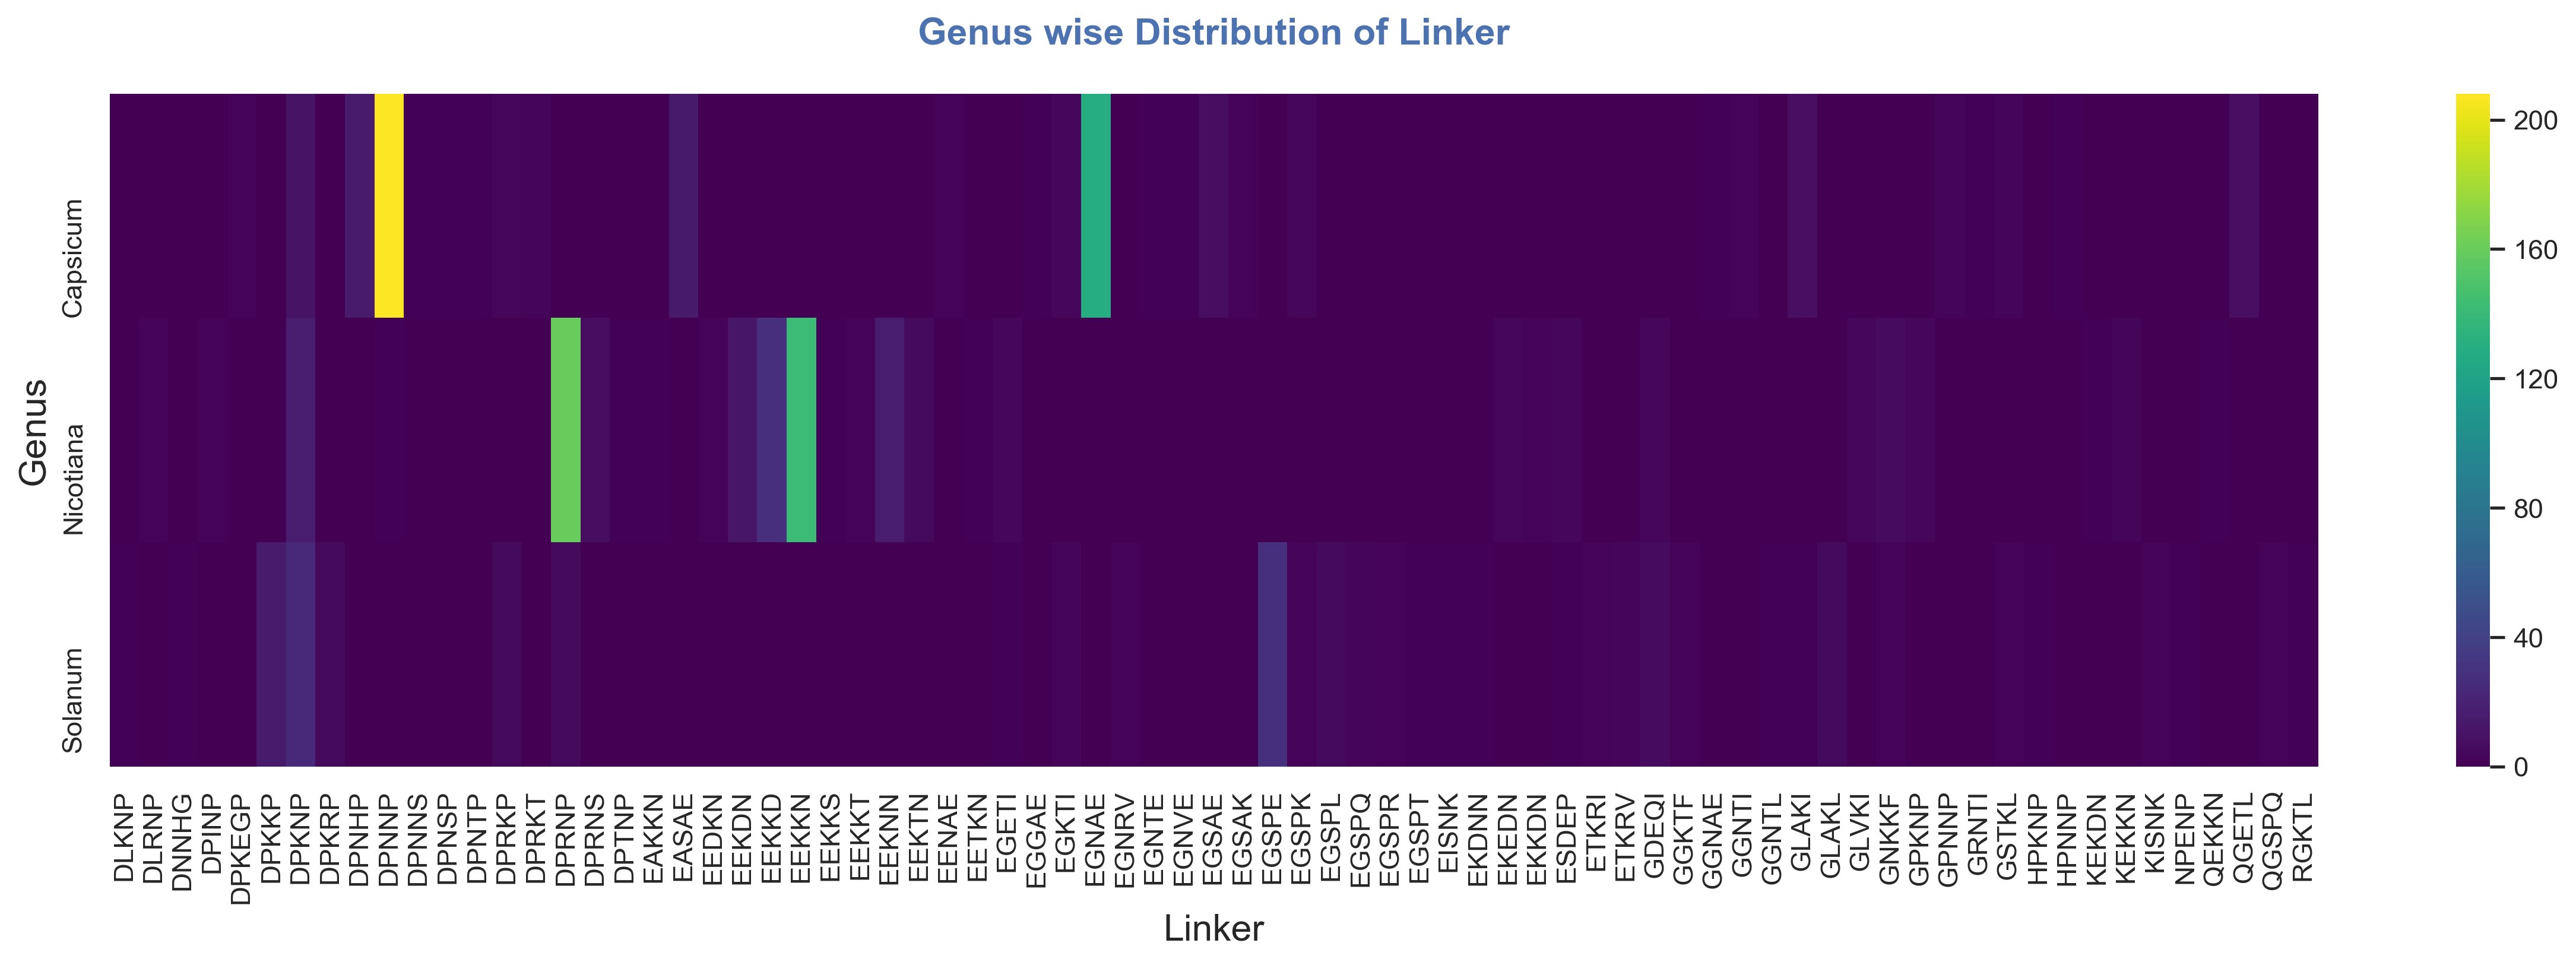

In [162]:
plt.figure(figsize=(20,5),dpi=300)
plt.title('Genus wise Distribution of Linker',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Linker',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})
sns.heatmap(genus_linker_pivot,cmap='viridis')

### (4.7) Domains distribution across Top10 Linker

In [164]:
# This anlaysis shows the number of Domains in which a Linker is found. This information can be retrieved 
# finding Linker Frequency in Domains_Linker relation.

In [166]:
domains=pd.read_csv('7_Domain_RCL_Linker.csv')

In [157]:
#domains

In [168]:
domains.DomainType.count()

695

In [172]:
domains.Linker.value_counts().head(10)

DPRNP    96
EEKKN    72
DPNNP    60
DPKNP    32
EGNAE    30
EEKKD    13
EEKDN    12
EEKNN    12
EGSPE    12
DPRKP     9
Name: Linker, dtype: int64

In [174]:
#domains.Linker.value_counts().to_csv('Website/G4(7)_Linker_FrequencyIn_Domains.csv')## Linker Frequency in Domains

In [176]:
linker_dom_freq=pd.read_csv('Website/G4(7)_Linker_FrequencyIn_Domains.csv')

In [179]:
linker_dom_freq.head(10)

Linker  Domain Count
0  DPRNP            96
1  EEKKN            72
2  DPNNP            60
3  DPKNP            32
4  EGNAE            30
5  EEKKD            13
6  EEKDN            12
7  EEKNN            12
8  EGSPE            12
9  DPRKP             9

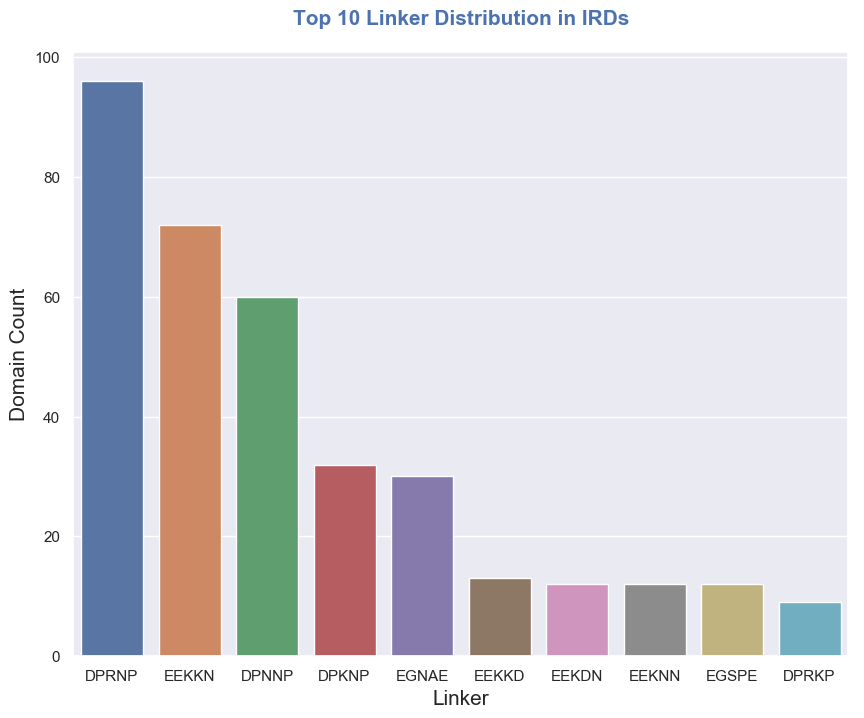

In [180]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Top 10 Linker Distribution in IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Linker',fontdict={'fontsize':15})
plt.ylabel('Domain Count',fontdict={'fontsize':15})
sns.barplot(x='Linker',y='Domain Count',data=linker_dom_freq.head(10))
#g.legend_.remove()

## (5) Target Protease Data Analysis

In [181]:
# Here we perform different data analysis related to Target Protease

### (5.1) Target Specificity (Target Protease Distribution)

In [12]:
# This analysis shows the target specificity distribution among the PIN-II PIs. It gives the percentage of PIs for various
# Traget Protease. This information can be retreived finding Target Protease Frequency using Tables Sequence_Domains and 
# Domains.

In [13]:
seq_domain_rcl_linker.UniprotID.count()

1298

In [14]:
seq_domain_rcl_linker.columns

Index(['UniprotID', 'Sequence', 'OrganismID', 'Organism', 'Genus', 'Species',
       'Solanaceae', 'DomainID', 'Domain', 'DomainStartPosition',
       'DomainEndPosition', 'DomainType', 'RclID', 'RCL', 'P2Residue',
       'P1Residue', 'P1primeResidue', 'targetProtease', 'tpID',
       'RCL_startPosition', 'RCL_endPosition', 'linkerID', 'Linker',
       'LinkerType', 'Linker_startPosition', 'Linker_endPosition'],
      dtype='object')

In [30]:
seq_targetProtease=seq_domain_rcl_linker[['UniprotID','OrganismID', 'Organism', 'Genus','targetProtease','tpID']]

In [31]:
seq_targetProtease.duplicated().sum()

789

In [32]:
seq_targetProtease_Unique=seq_targetProtease.loc[~seq_targetProtease.duplicated(),:]

In [33]:
seq_targetProtease_Unique.count()

UniprotID         509
OrganismID        509
Organism          509
Genus             509
targetProtease    506
tpID              506
dtype: int64

In [19]:
seq_targetProtease_Unique.targetProtease.value_counts(normalize=True)

Trypsin         0.434783
Chymotrypsin    0.326087
Unknown         0.231225
Elastase        0.007905
Name: targetProtease, dtype: float64

In [20]:
seq_targetProtease_Unique.targetProtease.value_counts()

Trypsin         220
Chymotrypsin    165
Unknown         117
Elastase          4
Name: targetProtease, dtype: int64

In [21]:
tp=pd.read_csv('Website/G5(1)_Target_specificity_distribution_Unique.csv')

In [22]:
tp

Target Protease  Number of Sequences  Normalized
0         Trypsin                  220       0.434
1    Chymotrypsin                  165       0.326
2         Unknown                  117       0.231
3        Elastase                    4       0.007

In [23]:
labels=tp['Target Protease']

In [24]:
labels

0         Trypsin
1    Chymotrypsin
2         Unknown
3        Elastase
Name: Target Protease, dtype: object

In [25]:
sizes=tp['Normalized']

In [26]:
sizes

0    0.434
1    0.326
2    0.231
3    0.007
Name: Normalized, dtype: float64

Text(0.5, 1.0, 'Target Protease Distribution')

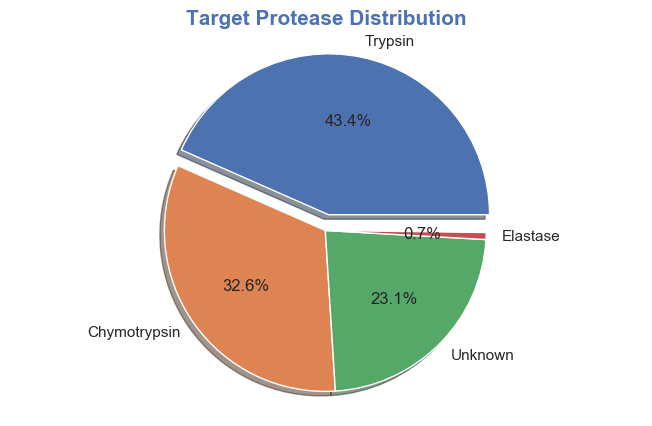

In [27]:
explode=(0.1,0,0,0)
fig1,ax1=plt.subplots(figsize=(8,5),dpi=100)
wedges,texts,autotexts=ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=0)
ax1.axis('equal')
ax1.set_title('Target Protease Distribution',fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})

### (5.2) Specie wise distribution of Target Protease

In [28]:
# How the specificity is distributed across Species. This information can be retreived using Tables Sequence_Domains,
# Taxonomy and Domains.

In [35]:
seq_targetProtease.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'targetProtease',
       'tpID'],
      dtype='object')

In [158]:
#seq_targetProtease

In [37]:
org_tp=seq_targetProtease[['OrganismID','targetProtease','tpID']]

In [159]:
#taxon_species

In [39]:
species_tp=pd.merge(org_tp,taxon_species,left_on='OrganismID',right_on='Taxon',how='left')

In [160]:
#species_tp

In [41]:
species_tp=species_tp[['OrganismID','Scientific name','tpID','targetProtease']]

In [161]:
#species_tp.groupby('Scientific name').targetProtease.value_counts()

In [44]:
#species_tp.groupby('Scientific name').targetProtease.value_counts().to_csv('Website/G5(2)_TP_OccurrencesIn_Specie.csv')

In [45]:
specie_tp=pd.read_csv('Website/G5(2)_TP_OccurrencesIn_Specie.csv')

In [162]:
#specie_tp

In [49]:
specie_tp_pivot=pd.pivot_table(data=specie_tp,index='Specie',columns='Target Protease',values='Occurrences',aggfunc=sum,fill_value=0)

In [163]:
#specie_tp_pivot

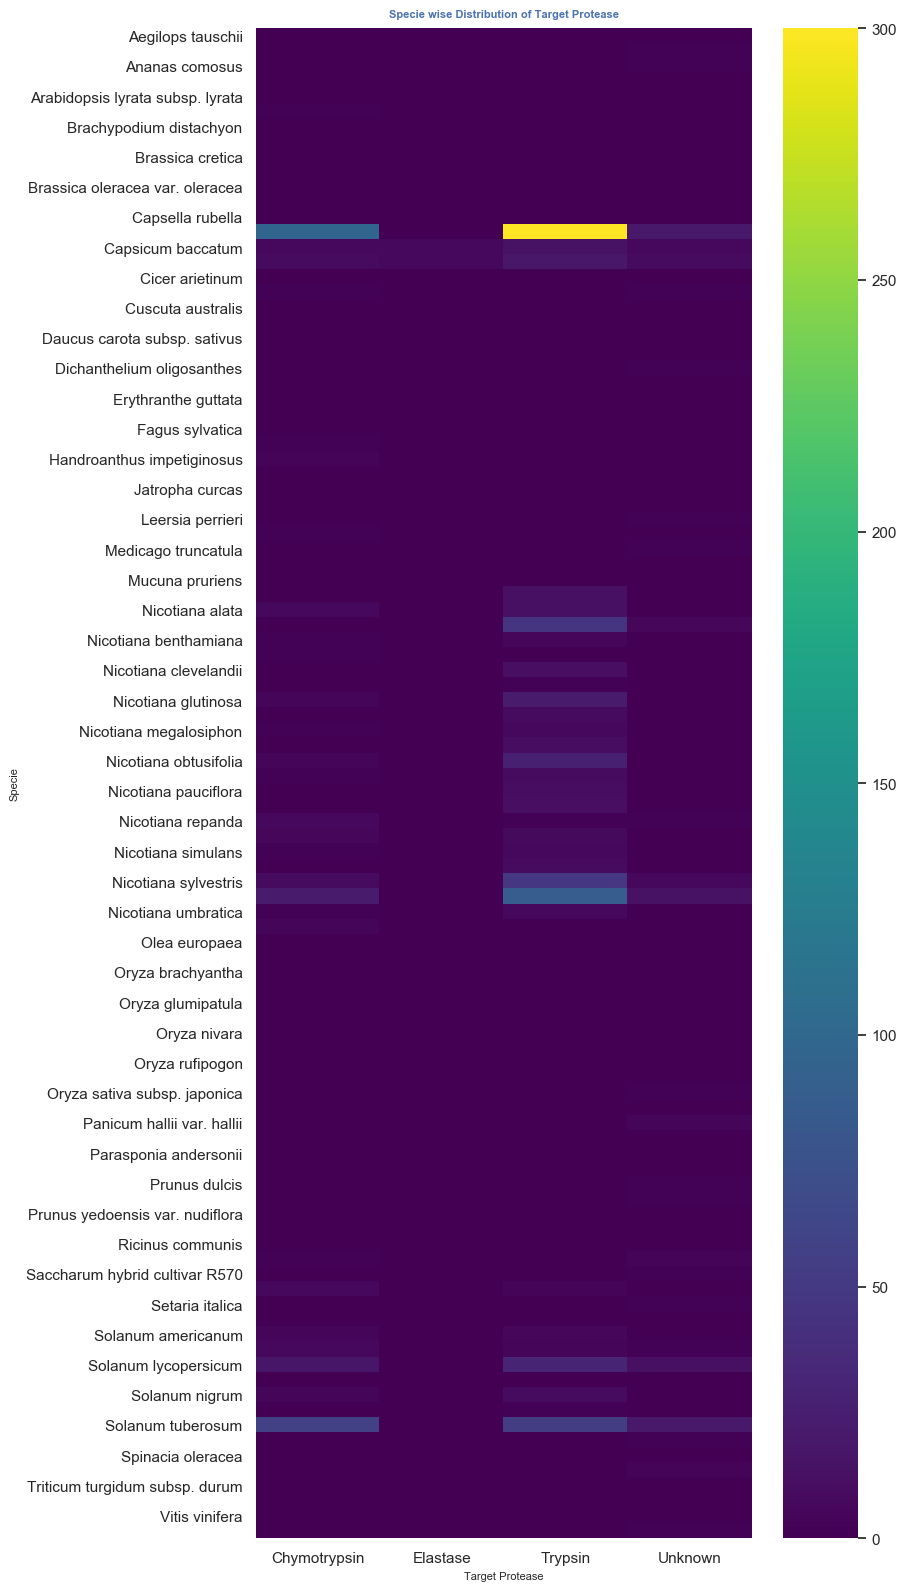

In [56]:
plt.figure(figsize=(8,20),dpi=100)
plt.title('Specie wise Distribution of Target Protease',pad=8,fontdict={'fontsize':8,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Target Protease',fontdict={'fontsize':8})
plt.ylabel('Specie',fontdict={'fontsize':8})
sns.heatmap(specie_tp_pivot,cmap='viridis')

### (5.3) Specie wise distribution of Target Protease in Top 10 Species.

In [58]:
# To find which Target prptease are found in Top 10 species and its number of Occurrences. This information can be retreived 
# finding TP Frequency in species using Tables Sequence_Domains,Taxonomy and Domains. Top 10 species are determined by
# Species Distribution i.e. to which species maximum number of PIs belong to. 

In [64]:
top10Species

16                Capsicum annuum
100             Solanum tuberosum
63              Nicotiana tabacum
96           Solanum lycopersicum
18              Capsicum chinense
17              Capsicum baccatum
45            Nicotiana attenuata
62           Nicotiana sylvestris
91     Selaginella moellendorffii
20               Coffea canephora
Name: Specie, dtype: object

In [164]:
#specie_tp

In [66]:
specie_tp_top10=specie_tp.loc[specie_tp.Specie.isin(top10Species),:]

In [69]:
specie_tp_top10.Specie.unique()

array(['Capsicum annuum', 'Capsicum baccatum', 'Capsicum chinense',
       'Coffea canephora', 'Nicotiana attenuata', 'Nicotiana sylvestris',
       'Nicotiana tabacum', 'Selaginella moellendorffii',
       'Solanum lycopersicum', 'Solanum tuberosum'], dtype=object)

In [70]:
specieTop10_tp_pivot=pd.pivot_table(data=specie_tp_top10,index='Specie',columns='Target Protease',values='Occurrences',aggfunc=sum,fill_value=0)

In [71]:
specieTop10_tp_pivot

Target Protease             Chymotrypsin  Elastase  Trypsin  Unknown
Specie                                                              
Capsicum annuum                       97         0      300       19
Capsicum baccatum                      6         6       14        7
Capsicum chinense                      9         6       18        9
Coffea canephora                       2         0        1        2
Nicotiana attenuata                    0         0       46        5
Nicotiana sylvestris                   9         0       47        6
Nicotiana tabacum                     22         0       87       13
Selaginella moellendorffii             7         0        3        1
Solanum lycopersicum                  17         0       30       12
Solanum tuberosum                     58         0       53       19

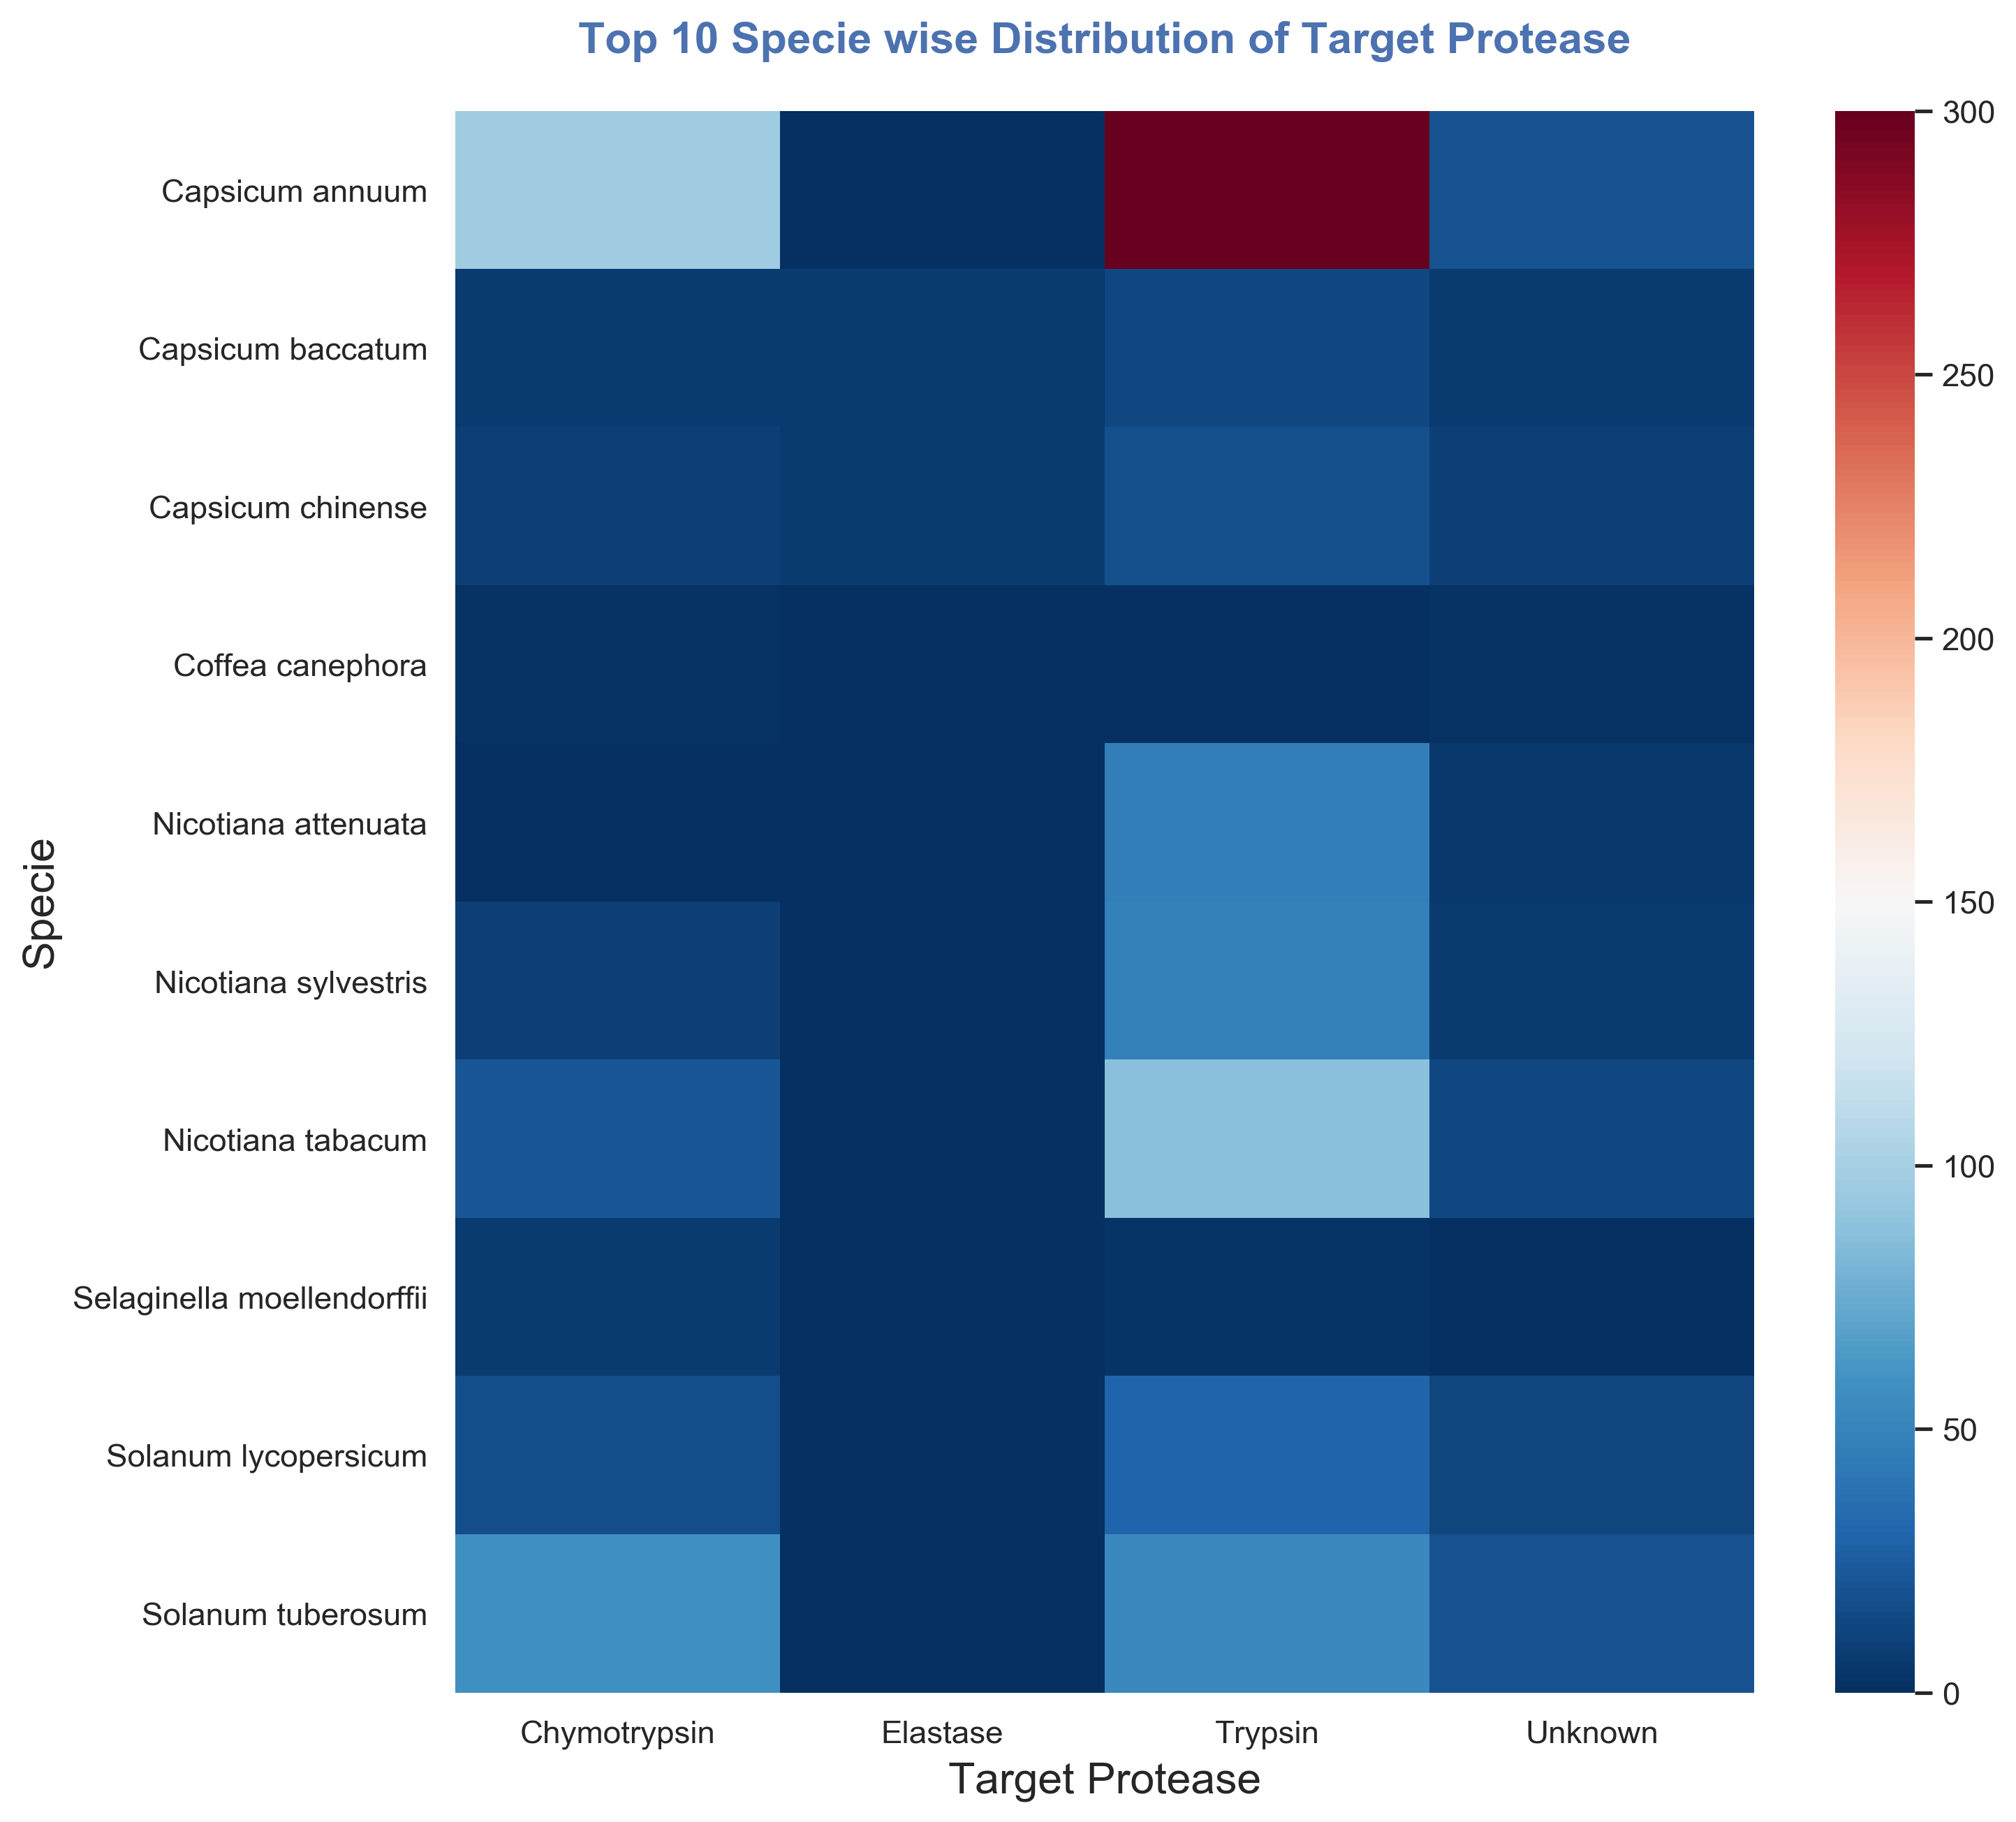

In [73]:
plt.figure(figsize=(10,10),dpi=300)
plt.title('Top 10 Specie wise Distribution of Target Protease',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Target Protease',fontdict={'fontsize':15})
plt.ylabel('Specie',fontdict={'fontsize':15})
sns.heatmap(specieTop10_tp_pivot,cmap='RdBu_r')

Text(0.5, 0, 'Specie')

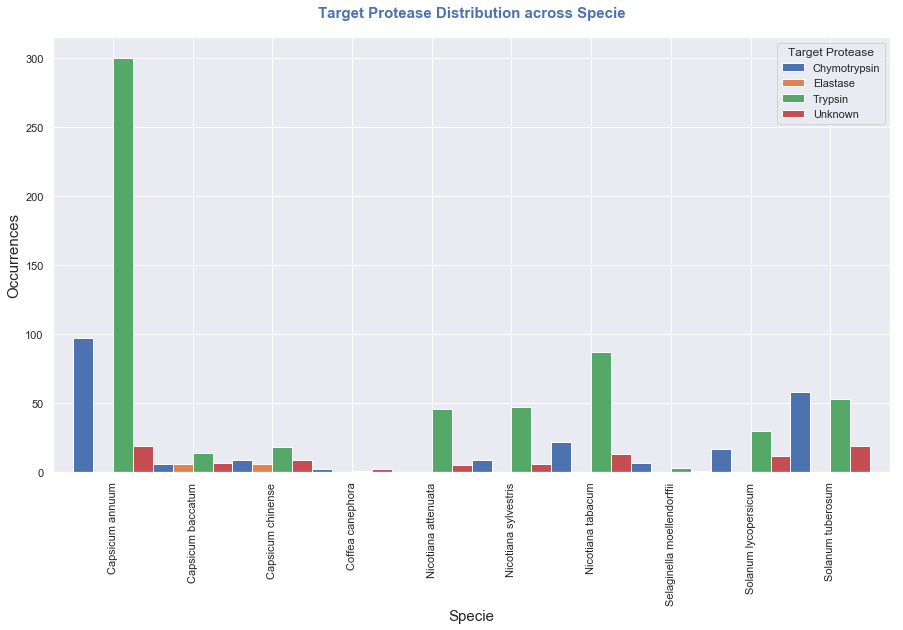

In [74]:
sns.set()
axes=specieTop10_tp_pivot.plot.bar(stacked=False,figsize=(15,8),width=1)
axes.set_title('Target Protease Distribution across Specie',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
axes.set_ylabel('Occurrences',fontdict={'fontsize':15})
axes.set_xlabel('Specie',fontdict={'fontsize':15})

### (5.4) Genus wise distribution of Target Protease

In [75]:
# To find which Target Protease are found in a particular Genus and its number of Occurrences. This information can be 
# retreived finding TP Frequency in Genus using Tables Sequence_Domains,Taxonomy and Domains.

In [77]:
seq_targetProtease.columns

Index(['UniprotID', 'OrganismID', 'Organism', 'Genus', 'targetProtease',
       'tpID'],
      dtype='object')

In [79]:
genus_tp=seq_targetProtease[['Genus', 'targetProtease','tpID']]

In [80]:
genus_tp.count()

Genus             1298
targetProtease    1295
tpID              1295
dtype: int64

In [165]:
#genus_tp.groupby('Genus').targetProtease.value_counts()

In [83]:
#genus_tp.groupby('Genus').targetProtease.value_counts().to_csv('Website/G5(4)_TargetProtease_OccurrencesIn_Genus.csv')

In [85]:
genus_tp=pd.read_csv('Website/G5(4)_TargetProtease_OccurrencesIn_Genus.csv')

In [166]:
#genus_tp

In [87]:
genus_tp_pivot=pd.pivot_table(data=genus_tp,index='Genus',columns='Target Protease',values='Occurrences',aggfunc=sum,fill_value=0)

In [167]:
#genus_tp_pivot

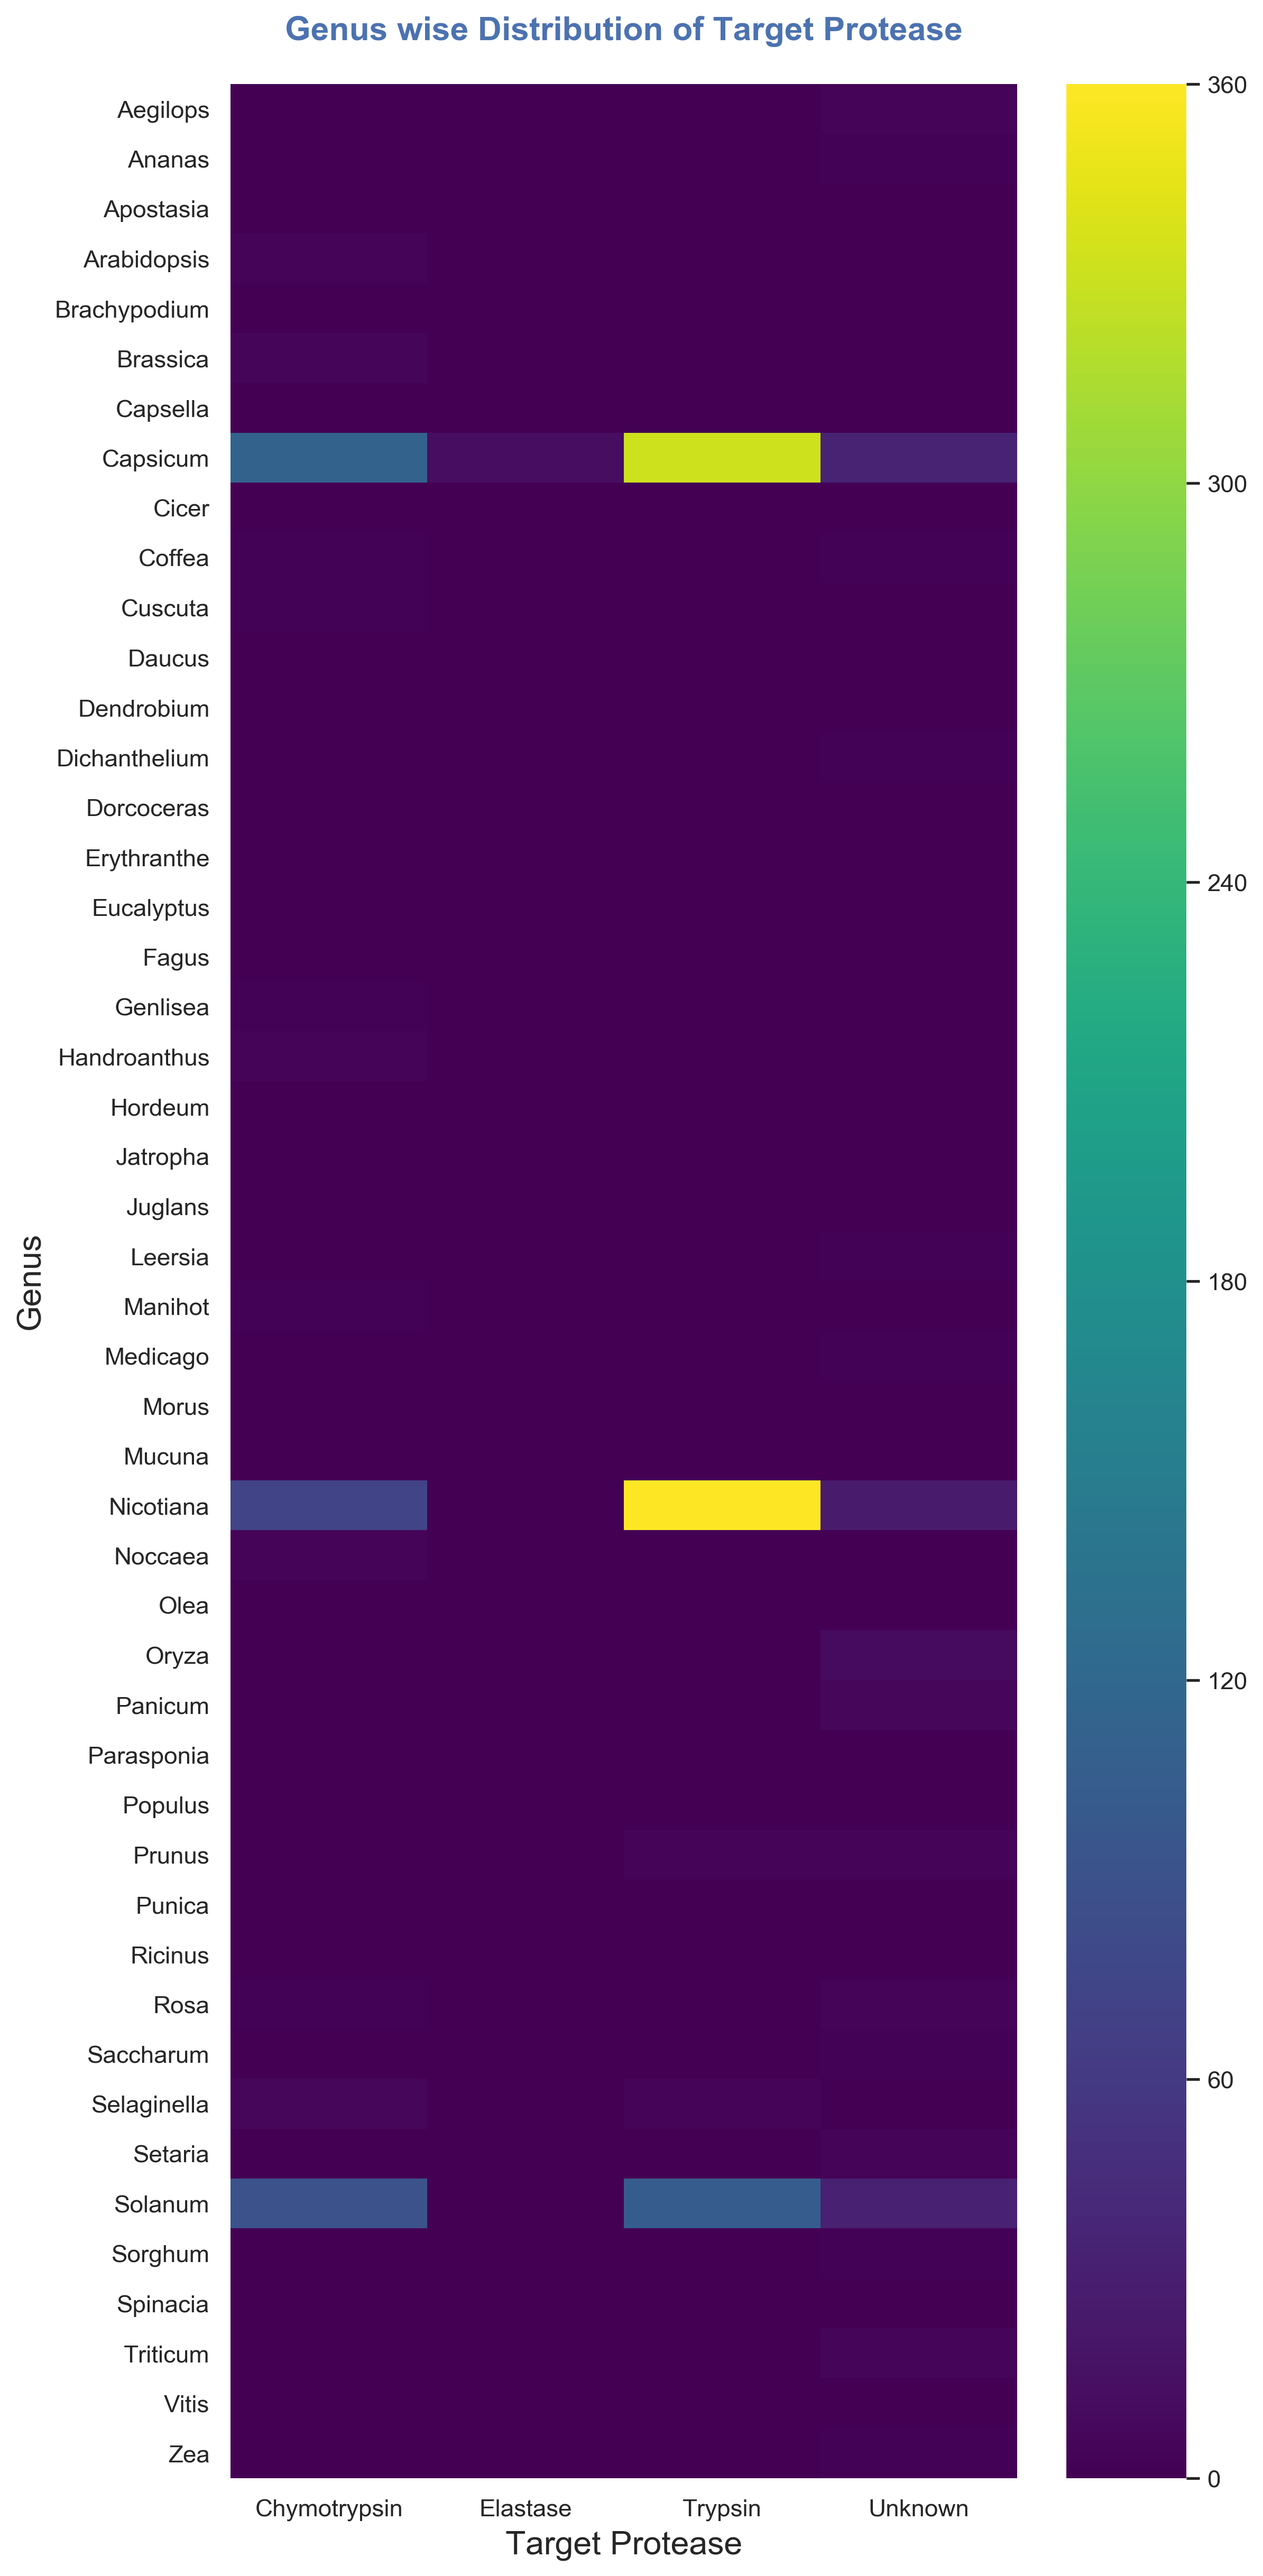

In [89]:
plt.figure(figsize=(8,20),dpi=300)
plt.title('Genus wise Distribution of Target Protease',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Target Protease',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})
sns.heatmap(genus_tp_pivot,cmap='viridis')

### (5.5) Target Protease distribution across Capsicum, Nicotiana, and Solanum

In [90]:
# Here we display the distribution of Target Protease across Capsicum, Nicotiana and Solanum Genus.This information 
# can be retrieved finding Target Protease Frequency in Genus using Tables Sequence_Domains,Taxonomy and Domains.

In [92]:
genus_tp.columns

Index(['Genus', 'Target Protease', 'Occurrences'], dtype='object')

In [93]:
genus_tp.Genus.unique()

array(['Aegilops', 'Ananas', 'Apostasia', 'Arabidopsis', 'Brachypodium',
       'Brassica', 'Capsella', 'Capsicum', 'Cicer', 'Coffea', 'Cuscuta',
       'Daucus', 'Dendrobium', 'Dichanthelium', 'Dorcoceras',
       'Erythranthe', 'Eucalyptus', 'Fagus', 'Genlisea', 'Handroanthus',
       'Hordeum', 'Jatropha', 'Juglans', 'Leersia', 'Manihot', 'Medicago',
       'Morus', 'Mucuna', 'Nicotiana', 'Noccaea', 'Olea', 'Oryza',
       'Panicum', 'Parasponia', 'Populus', 'Prunus', 'Punica', 'Ricinus',
       'Rosa', 'Saccharum', 'Selaginella', 'Setaria', 'Solanum',
       'Sorghum', 'Spinacia', 'Triticum', 'Vitis', 'Zea'], dtype=object)

In [94]:
genus_tp_selected=genus_tp.loc[genus_tp.Genus.isin(['Capsicum','Nicotiana','Solanum']),:]

In [95]:
genus_tp_selected

Genus Target Protease  Occurrences
7    Capsicum         Trypsin          332
8    Capsicum    Chymotrypsin          112
9    Capsicum         Unknown           35
10   Capsicum        Elastase           12
36  Nicotiana         Trypsin          360
37  Nicotiana    Chymotrypsin           73
38  Nicotiana         Unknown           26
56    Solanum         Trypsin          104
57    Solanum    Chymotrypsin           91
58    Solanum         Unknown           33

In [96]:
genus_tp_selected_pivot=pd.pivot_table(data=genus_tp_selected,index='Genus',columns='Target Protease',values='Occurrences',aggfunc=sum,fill_value=0)

In [97]:
genus_tp_selected_pivot

Target Protease  Chymotrypsin  Elastase  Trypsin  Unknown
Genus                                                    
Capsicum                  112        12      332       35
Nicotiana                  73         0      360       26
Solanum                    91         0      104       33

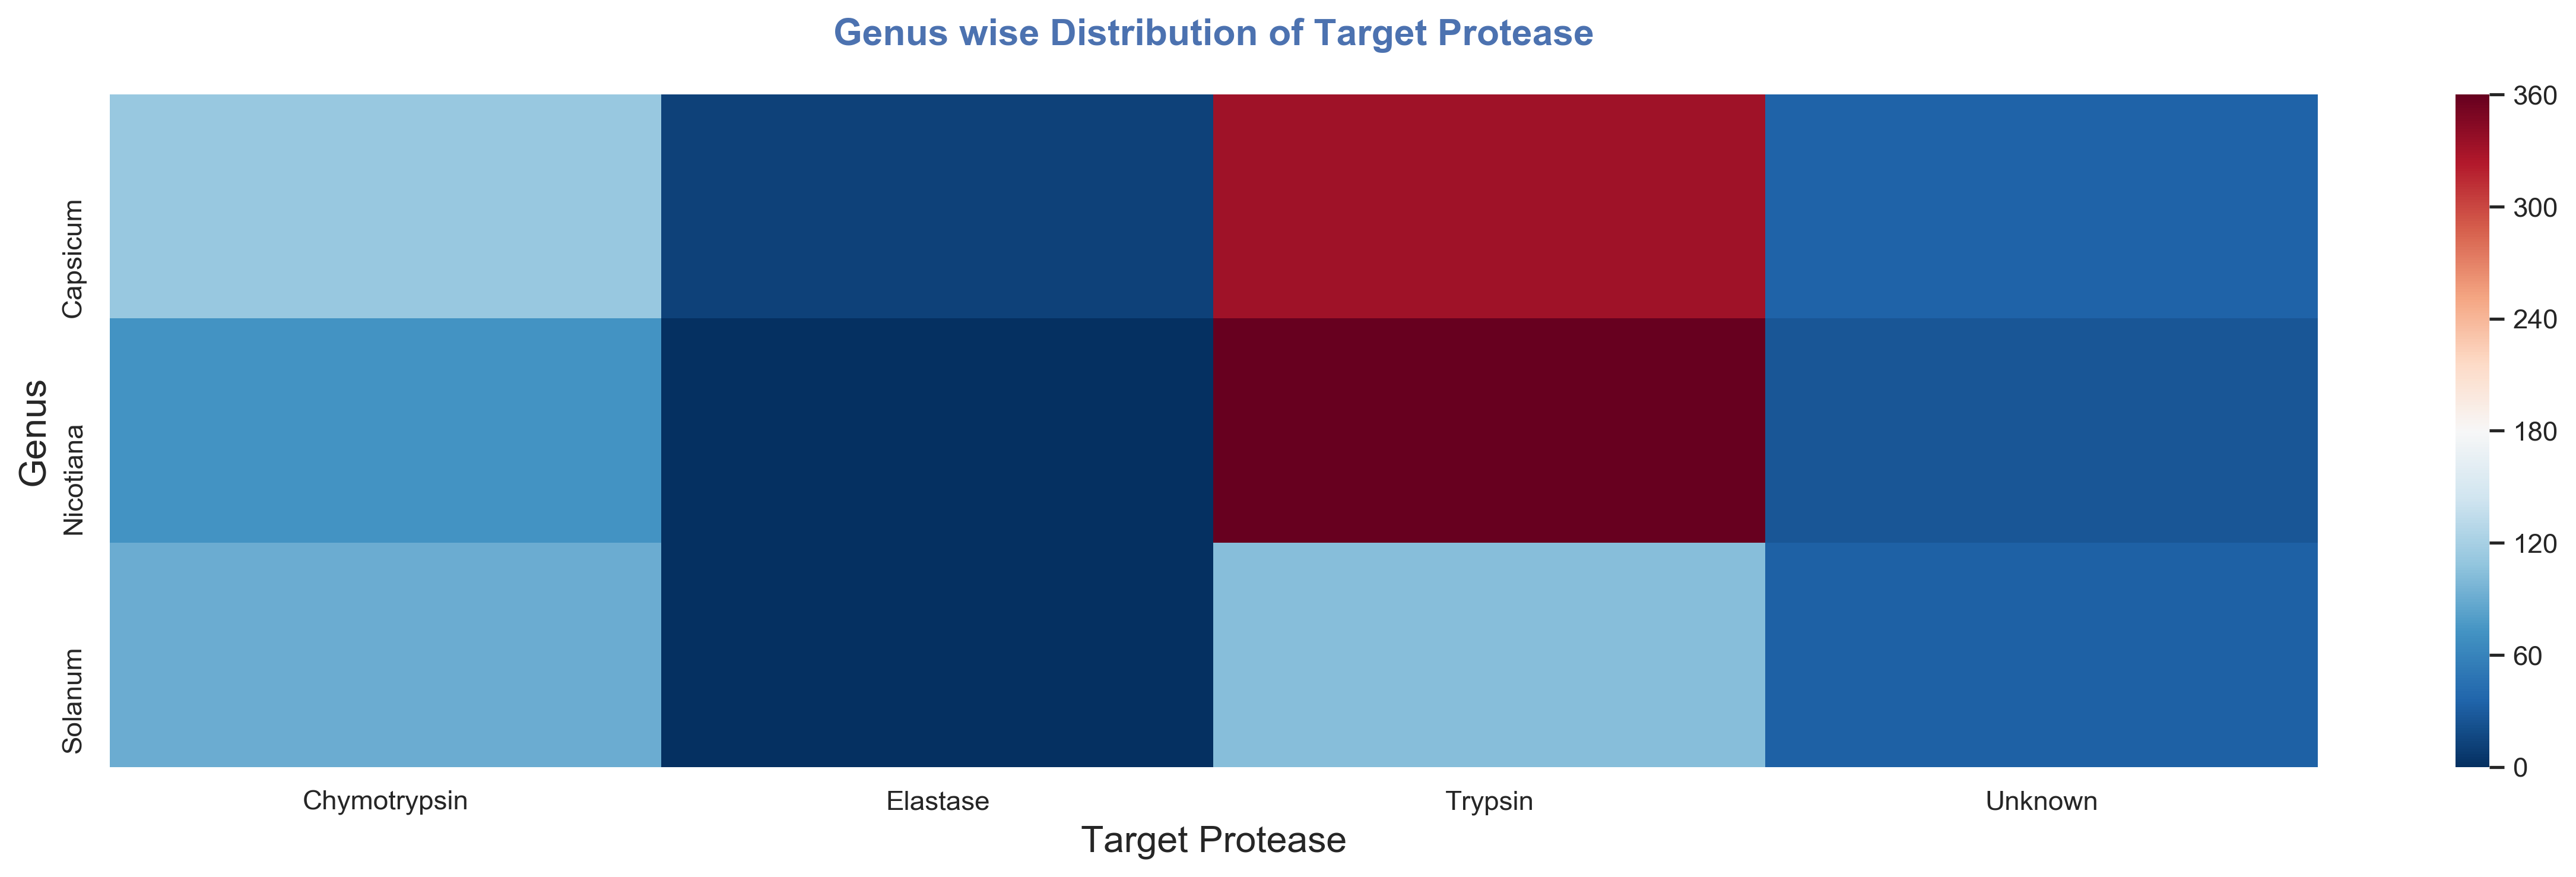

In [98]:
plt.figure(figsize=(20,5),dpi=300)
plt.title('Genus wise Distribution of Target Protease',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
plt.xlabel('Target Protease',fontdict={'fontsize':15})
plt.ylabel('Genus',fontdict={'fontsize':15})

sns.heatmap(genus_tp_selected_pivot,cmap='RdBu_r')

### (5.6) Domains distribution across Target Protease

In [99]:
# This anlaysis shows the number of Domains in which a Traget Protease is found. This information can be retrieved 
# finding TP Frequency in Domains relation.

In [100]:
domains=pd.read_csv('7_Domain_RCL_Linker.csv')

In [168]:
#domains

In [102]:
domains.domainID.count()

695

In [103]:
domains.targetProtease.value_counts()

Trypsin         396
Chymotrypsin    177
Unknown         110
Elastase         12
Name: targetProtease, dtype: int64

In [105]:
#domains.targetProtease.value_counts().to_csv('Website/G5(6)_TargetProtease_FrequencyIn_Domains.csv')## TP Frequency in Domains

In [107]:
tp_dom_freq=pd.read_csv('Website/G5(6)_TargetProtease_FrequencyIn_Domains.csv')

In [109]:
tp_dom_freq

Target Protease  Domain Count
0         Trypsin           396
1    Chymotrypsin           177
2         Unknown           110
3        Elastase            12

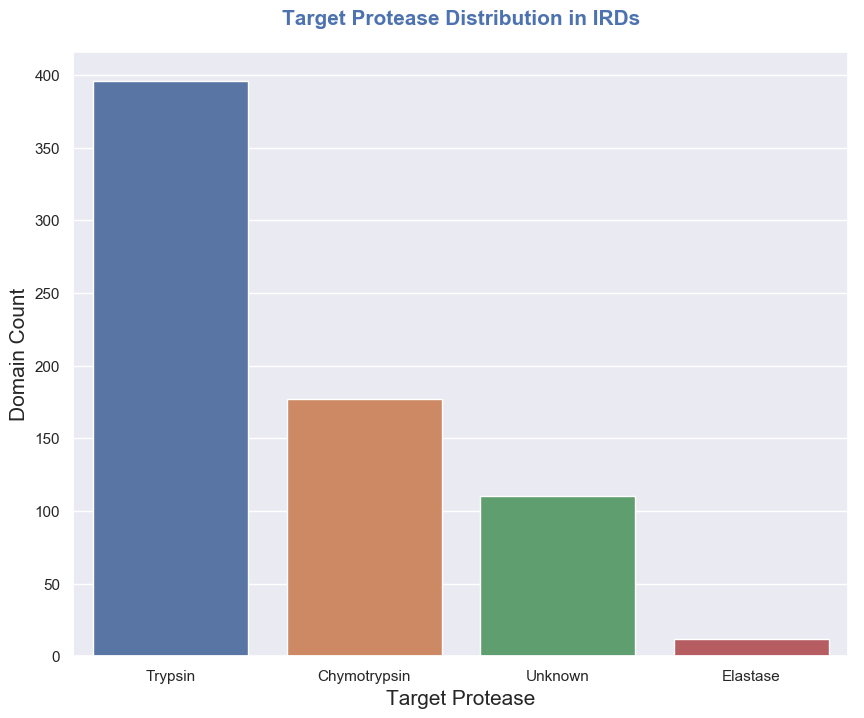

In [110]:
plt.figure(figsize=(10,8),dpi=100)
plt.title('Target Protease Distribution in IRDs',pad=20,fontdict={'fontsize':15,'fontweight':'bold','fontfamily':'Arial','color':'b'})
sns.set()
plt.xlabel('Target Protease',fontdict={'fontsize':15})
plt.ylabel('Domain Count',fontdict={'fontsize':15})
sns.barplot(x='Target Protease',y='Domain Count',data=tp_dom_freq)
#g.legend_.remove()